7/29/2019

We're going to choose a random subset of the data we're analyzing and we're going to give it human listeners and see what they do.

For this to work, we're going to need a few captions from different conditions. We have to balance:

- close, split, far
- descriptive, ambiguous, misleading

So if we can have 100 HITs:
each HIT has 10 labels, we have 1000 contexts.

333 close, 333 split, 333 far
of each of these, 111 descriptive, 111 ambiguous, 111 misleading


In [1]:
import sys
sys.path.append("..")

In [2]:
from monroe_data import MonroeData, MonroeDataEntry, Color

In [3]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mturk_data_combined_1234 = MonroeData("../data/csv/mturk_augmented_data_exp1234.csv", single_speaker=False)

In [5]:
dev_data = MonroeData("../data/csv/dev_corpus_monroe.csv", "../data/entries/dev_entries_monroe.pkl")

In [6]:
for i in mturk_data_combined_1234.read_data(): pass

In [8]:
mturk_data_combined_1234[:10]

[bright pink,
 bright purple,
 MEDIUM VIOLET RED,
 VIOLET,
 Light pink,
 Pink,
 Bright pink,
 Pink,
 bright purple,
 purple]

20) Game: 2.1-good-unflipped Round: nan
dark grey


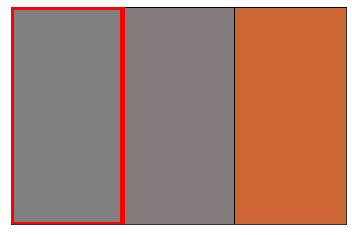

21) Game: 2.1-bad-unflipped Round: nan
dark grey


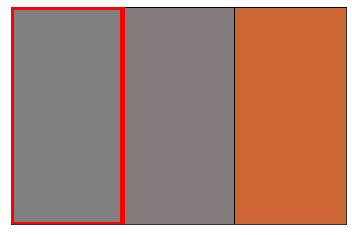

22) Game: 2.2-good-unflipped Round: nan
DIM GRAY


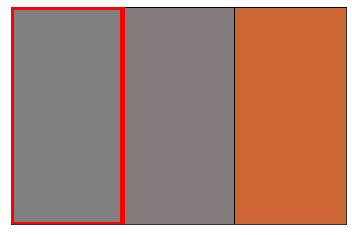

23) Game: 2.2-bad-unflipped Round: nan
GRAY


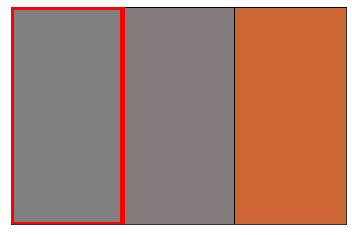

24) Game: 2.3-good-unflipped Round: nan
Dark grey


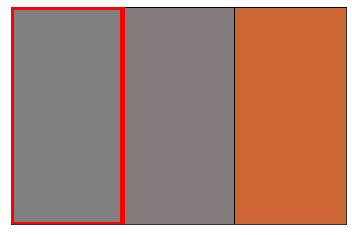

25) Game: 2.3-bad-unflipped Round: nan
Grey


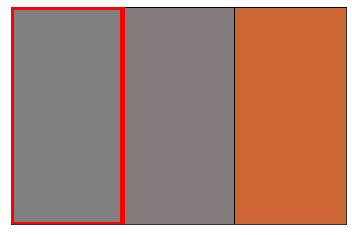

26) Game: 2.4-good-unflipped Round: nan
Neutral gray


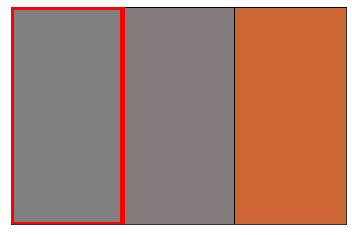

27) Game: 2.4-bad-unflipped Round: nan
Grey


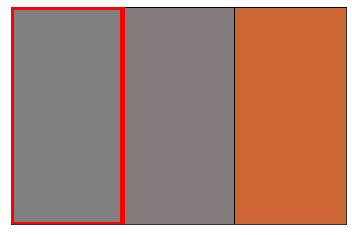

28) Game: 2.5-good-unflipped Round: nan
lighter gray


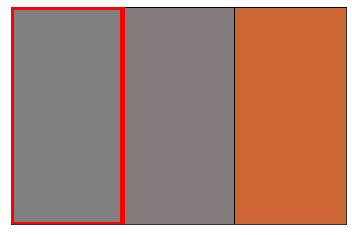

29) Game: 2.5-bad-unflipped Round: nan
grey


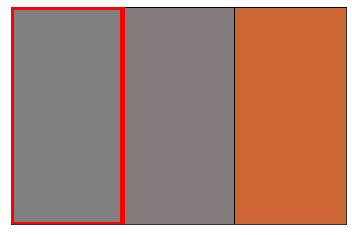

In [11]:
for i in range(20, 30):
    mturk_data_combined_1234.display_game(i)

In [25]:
listener_task_indices = np.arange(1000) * 10

In [26]:
listener_task_indices = np.sort(np.append(listener_task_indices, listener_task_indices[::2] + 2))

In [27]:
np.sort(listener_task_indices)

array([   0,    2,   10, ..., 9980, 9982, 9990])

60) Game: 4.1-good-unflipped Round: nan
purple grey


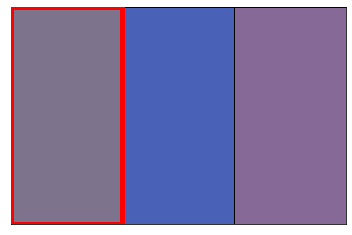

62) Game: 4.2-good-unflipped Round: nan
SLATE GRAY


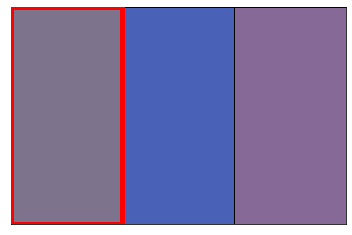

70) Game: 4.1-good-flipped Round: nan
sky blue


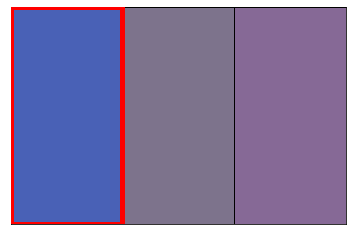

80) Game: 5.1-good-unflipped Round: nan
bright green


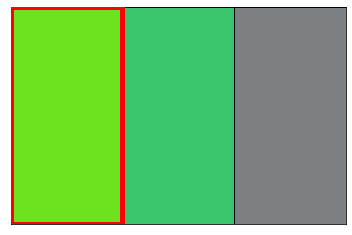

82) Game: 5.2-good-unflipped Round: nan
LAWN GREEN


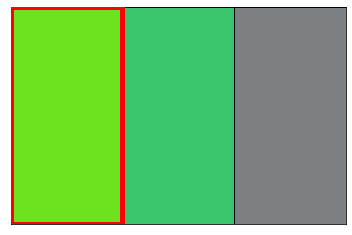

90) Game: 5.1-good-flipped Round: nan
light green


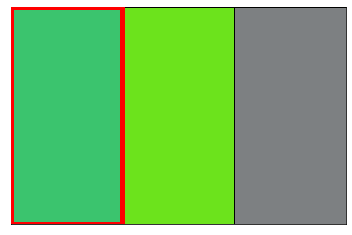

100) Game: 6.1-good-unflipped Round: nan
Brown


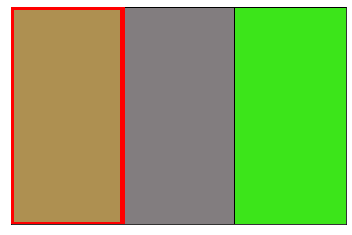

102) Game: 6.2-good-unflipped Round: nan
light brown


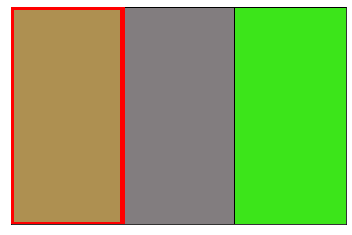

110) Game: 6.1-good-flipped Round: nan
Green


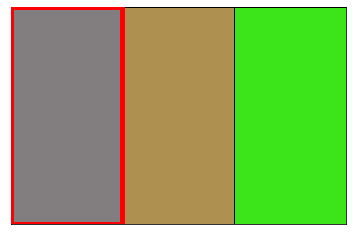

120) Game: 7.1-good-unflipped Round: nan
Indigo


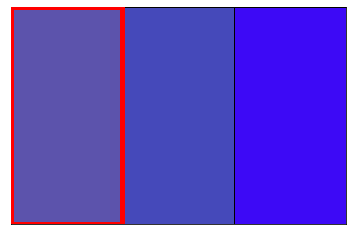

122) Game: 7.2-good-unflipped Round: nan
more purple than blue


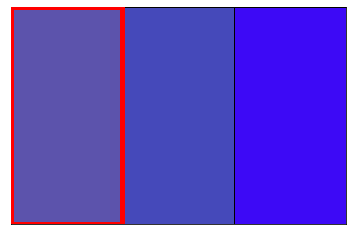

130) Game: 7.1-good-flipped Round: nan
dark blue


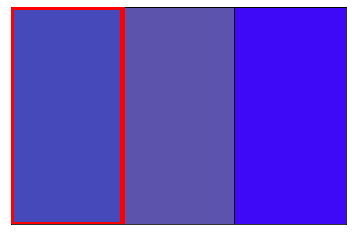

140) Game: 8.1-good-unflipped Round: nan
Purple


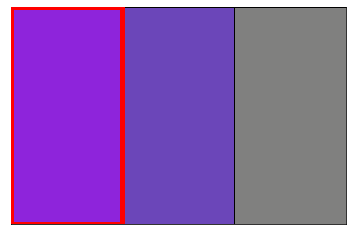

142) Game: 8.2-good-unflipped Round: nan
bright purple


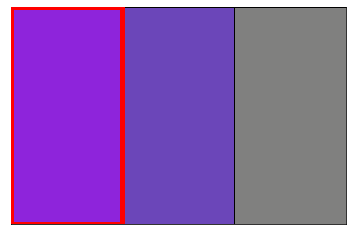

150) Game: 8.1-good-flipped Round: nan
violet


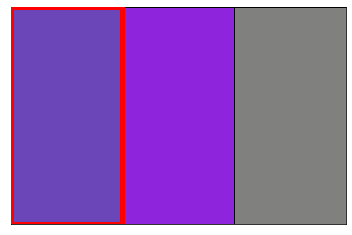

160) Game: 9.1-good-unflipped Round: nan
Light Blue


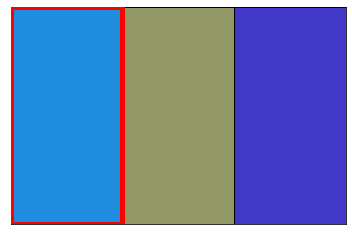

162) Game: 9.2-good-unflipped Round: nan
light blue


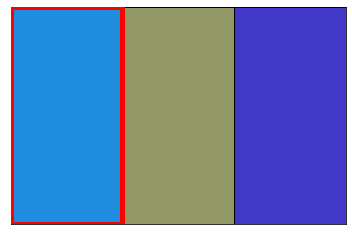

170) Game: 9.1-good-flipped Round: nan
khaki


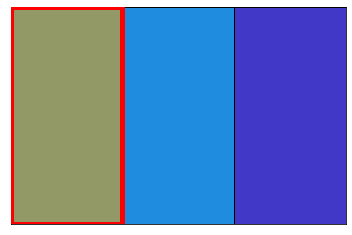

180) Game: 10.1-good-unflipped Round: nan
Light Violet


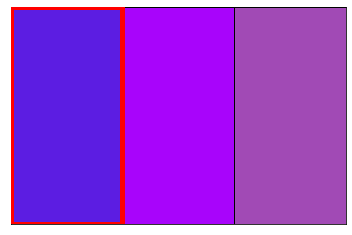

182) Game: 10.2-good-unflipped Round: nan
bluish purple


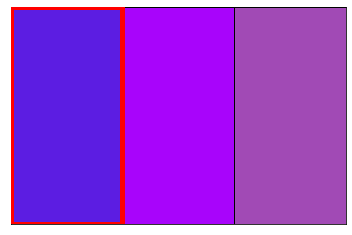

190) Game: 10.1-good-flipped Round: nan
violet


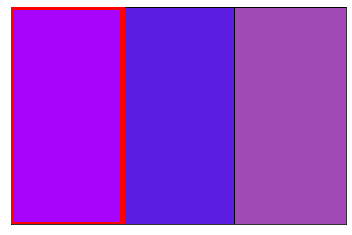

200) Game: 11.1-good-unflipped Round: nan
light Green


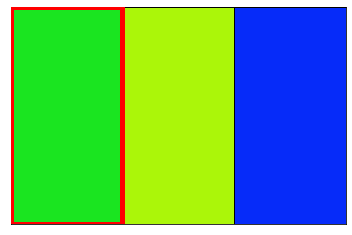

202) Game: 11.2-good-unflipped Round: nan
dark green


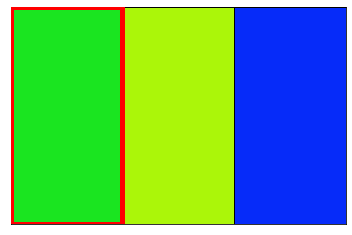

210) Game: 11.1-good-flipped Round: nan
greenish yellow


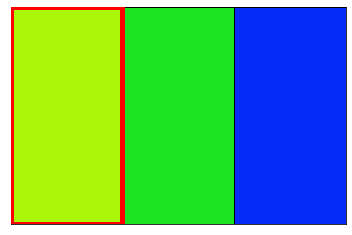

220) Game: 12.1-good-unflipped Round: nan
Light purple


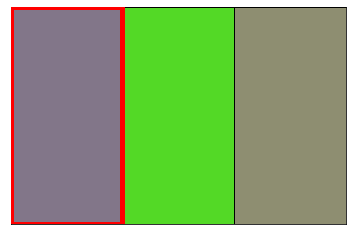

222) Game: 12.2-good-unflipped Round: nan
blue grey


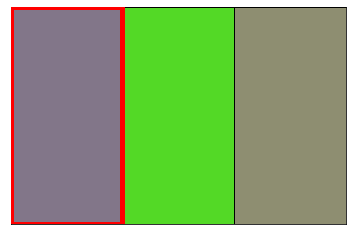

230) Game: 12.1-good-flipped Round: nan
light green


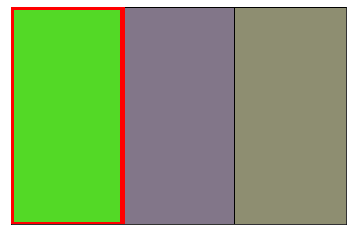

In [28]:
for i in listener_task_indices[9:36]:
    mturk_data_combined_1234.display_game(i)

160) Game: 9.1-good-unflipped Round: nan
Light Blue


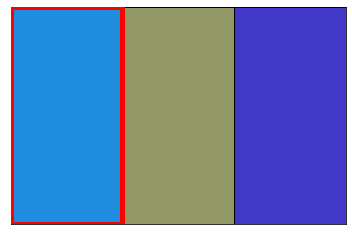

161) Game: 9.1-bad-unflipped Round: nan
Blue


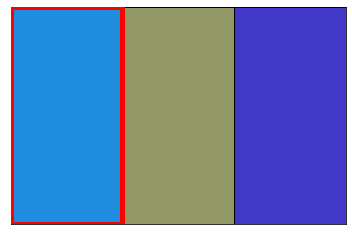

162) Game: 9.2-good-unflipped Round: nan
light blue


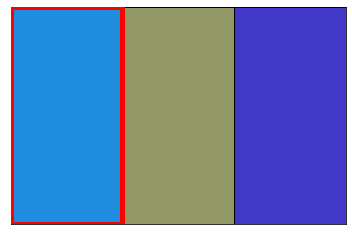

163) Game: 9.2-bad-unflipped Round: nan
blue


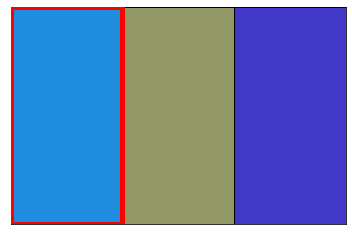

164) Game: 9.3-good-unflipped Round: nan
light blue


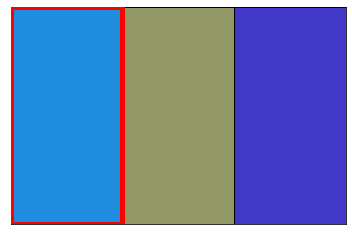

In [30]:
for i in range(160, 165):
    mturk_data_combined_1234.display_game(i)

In [8]:
def extract_context_lists(mturk_data, num_reps=5):
    contexts_good_unflipped = []
    contexts_bad_unflipped = []
    contexts_good_flipped = []
    contexts_bad_flipped = []

    num_reps = 5
    num_same_condition = num_reps * 2 # good and bad utterance for each rep

    for i in range(len(mturk_data) // num_same_condition): # number of distinct contexts
        # i * 2 because data alternates between flipped and unflipped
        good_unflipped_start = i * 2 * num_same_condition  # good utterances at even indices
        bad_unflipped_start = good_unflipped_start + 1     # bad utterances at odd indices
        unflipped_end = good_unflipped_start + num_same_condition

        contexts_good_unflipped.extend(
            mturk_data[good_unflipped_start : unflipped_end: 2]
        )
        contexts_bad_unflipped.extend(
            mturk_data[bad_unflipped_start : unflipped_end : 2]
        )

        good_flipped_start = unflipped_end # the flipped target data comes right after the unflipped data
        bad_flipped_start = good_flipped_start + 1
        flipped_end = good_flipped_start + num_same_condition

        contexts_good_flipped.extend(
            mturk_data[good_flipped_start : flipped_end : 2]
        )
        contexts_bad_flipped.extend(
            mturk_data[bad_flipped_start : flipped_end : 2]
        )
        
    return (contexts_good_unflipped, contexts_bad_unflipped, 
            contexts_good_flipped, contexts_bad_flipped)

In [9]:
ctx_good_unflipped_comb1234, ctx_bad_unflipped_comb1234, ctx_good_flipped_comb1234, ctx_bad_flipped_comb1234 = (
    extract_context_lists(mturk_data_combined_1234)
)

In [10]:
# for now I'm just going to be focusing on the unflipped cases
# I'm going to filter out all of the bad contexts that are in the references:
def normalize(caption):
    """Makes captin text more uniform - lowercases, removes unecessary white space"""
    return caption.lower().strip().replace('"', "")

def extract_captions(context_list):
    """Extracts the captions from the contexts in context_list and does some caption normalization"""
    return [normalize(c.caption) for c in context_list]

def extract_as_reference_captions(context_list, num_reps=5):
    """Extracts captions from contexts in context_list and format them as list of lists req'd for evaluation"""
    captions = extract_captions(context_list)
    captions = np.array(captions).reshape(-1, num_reps)
    # now, we have num_reps good and num_reps ugly captions for each set of reference captions
    captions = np.repeat(captions, num_reps, axis=0)
    captions = captions.tolist() # nlgeval needs lists
    return captions

ref_captions_unflipped_comb1234 = extract_as_reference_captions(ctx_good_unflipped_comb1234)



In [11]:
ctx_bad_unflipped_comb1234_filtered = []
ctx_good_unflipped_comb1234_filtered = []
ctx_ugly_unflipped_comb1234_filtered = []
for i, references in enumerate(ref_captions_unflipped_comb1234[::5]):
    # let's say we only care about the first one that works.

    for j in range(5): # number of references = 5
        if not normalize(ctx_bad_unflipped_comb1234[5*i + j].caption) in references:
            ctx_bad_unflipped_comb1234_filtered.append(copy.deepcopy(ctx_bad_unflipped_comb1234[5*i + j]))
            ctx_good_unflipped_comb1234_filtered.append(copy.deepcopy(ctx_good_unflipped_comb1234[5*i + j]))
            ctx_ugly_unflipped_comb1234_filtered.append(copy.deepcopy(ctx_good_flipped_comb1234[5*i + j]))
            if i == 5:
                print(references)
                print(ctx_bad_unflipped_comb1234[5*i + j].caption)

            break

['brown', 'light brown', 'light brown', 'tan', 'light brown']
pale


In [12]:
len(ctx_bad_unflipped_comb1234_filtered)

175

dark green


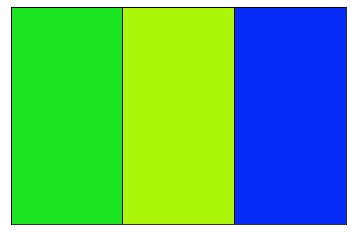

green


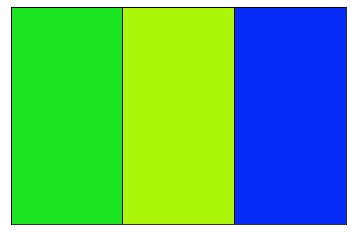

Lemon green


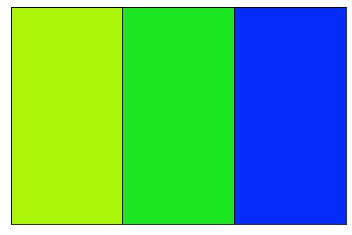

blue grey


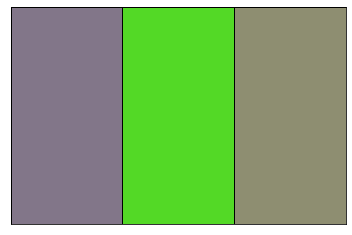

grey


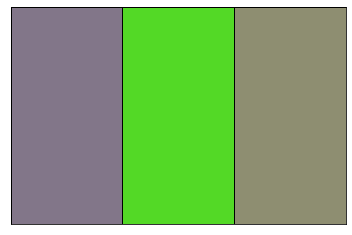

Leaf green


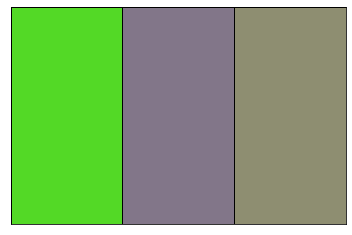

blue-ish gray


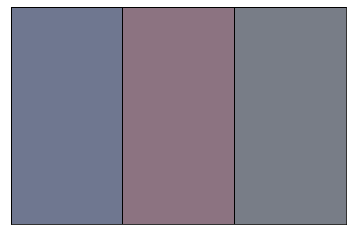

gray


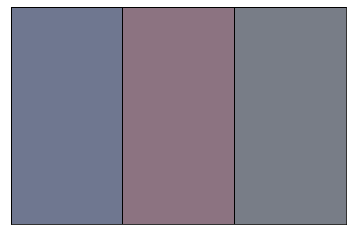

mauve


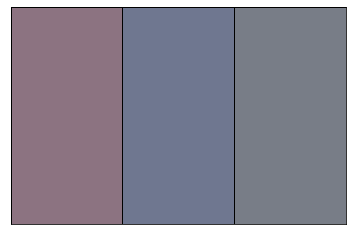

navy blue


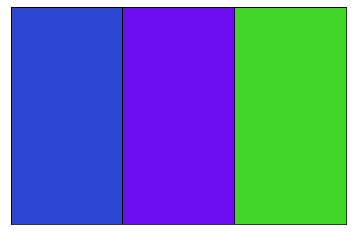

blue-ish


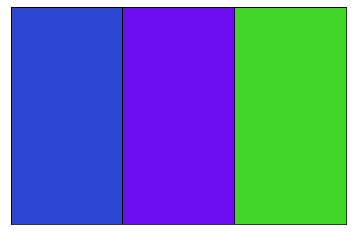

purple


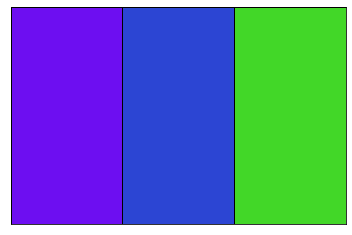

grey


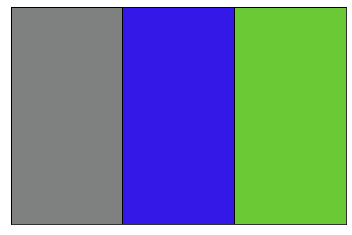

light


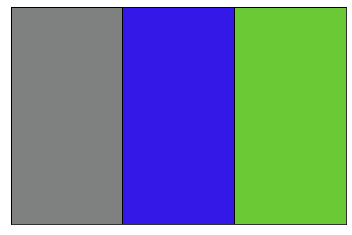

Royal blue


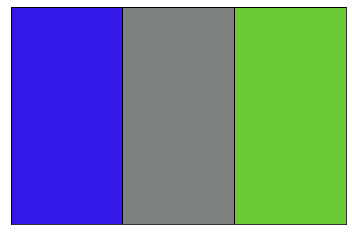

forest green


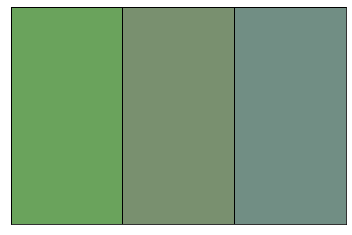

green


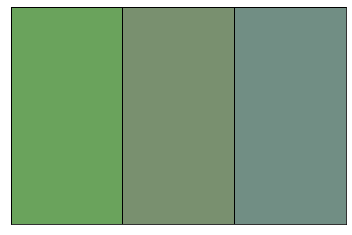

olive green


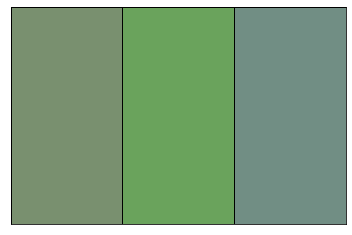

deep blue


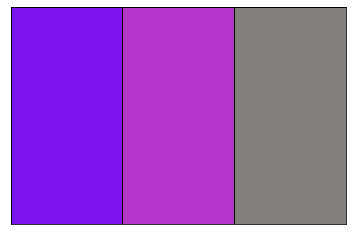

purplish


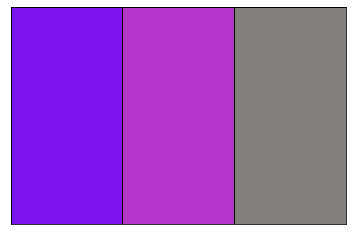

lilac


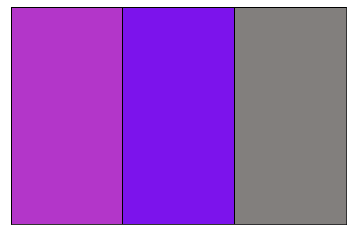

purple


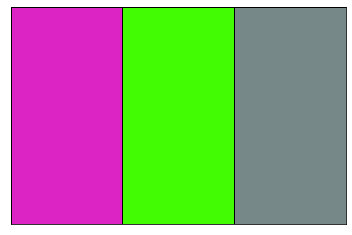

bright


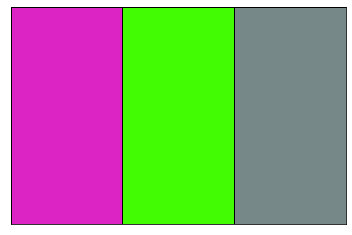

green


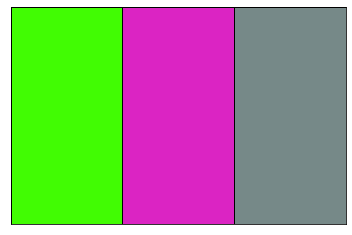

purple


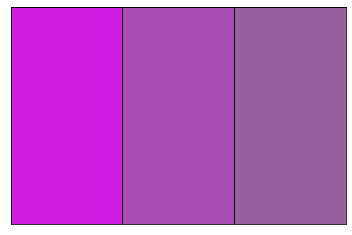

It's darker than pink


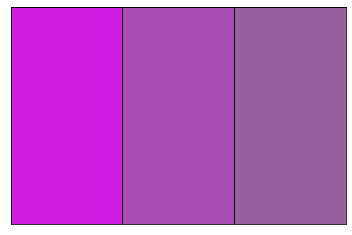

light purple


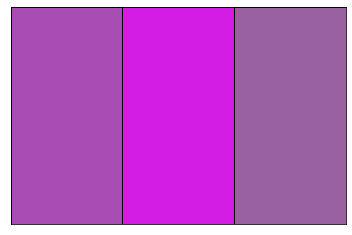

green


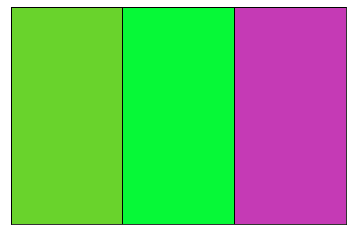

it means go


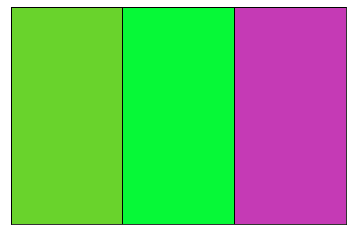

green


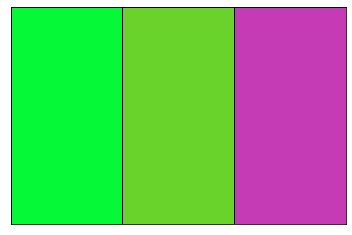

Dark Blue


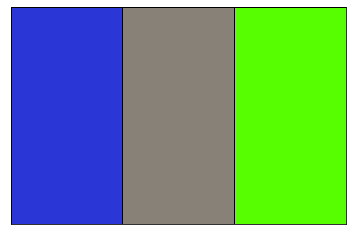

Midnight Blue


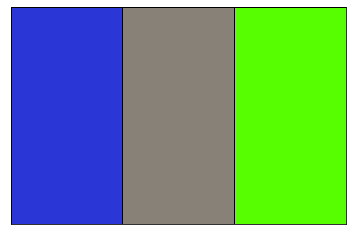

Gray


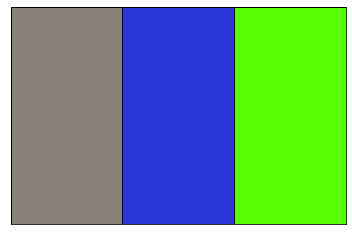

In [53]:
for i in range(9, 20):
    mturk_data_combined_1234.display_custom_game(ctx_good_unflipped_comb1234_filtered[i].colors, ctx_good_unflipped_comb1234_filtered[i].caption)
    mturk_data_combined_1234.display_custom_game(ctx_bad_unflipped_comb1234_filtered[i].colors, ctx_bad_unflipped_comb1234_filtered[i].caption)
    mturk_data_combined_1234.display_custom_game(ctx_ugly_unflipped_comb1234_filtered[i].colors, ctx_ugly_unflipped_comb1234_filtered[i].caption)

In [14]:
ctx_good_unflipped_comb1234_chunks = []
ctx_bad_unflipped_comb1234_chunks = []
ctx_ugly_unflipped_comb1234_chunks = []

for i in range(0, len(ctx_good_unflipped_comb1234_filtered), 10):
    ctx_good_unflipped_comb1234_chunks.append(ctx_good_unflipped_comb1234_filtered[i: i+10])
    ctx_bad_unflipped_comb1234_chunks.append(ctx_bad_unflipped_comb1234_filtered[i: i+10])
    ctx_ugly_unflipped_comb1234_chunks.append(ctx_ugly_unflipped_comb1234_filtered[i: i+10])

In [15]:
csv_datasets = [] # array of [(target_idx, context) * 10]
for chunk_ind in range(len(ctx_good_unflipped_comb1234_chunks)):
    csv_datasets_temp = [[], [], []]
    for offset in range(3):
        for i in range(offset, offset + 10):
            if i % 3 == 0:
                csv_datasets_temp[offset].append((0, ctx_good_unflipped_comb1234_chunks[chunk_ind][i - offset]))
            elif i % 3 == 1:
                csv_datasets_temp[offset].append((0, ctx_bad_unflipped_comb1234_chunks[chunk_ind][i - offset]))
            elif i % 3 == 2:
                csv_datasets_temp[offset].append((1, ctx_ugly_unflipped_comb1234_chunks[chunk_ind][i - offset]))
    csv_datasets.extend(csv_datasets_temp)

IndexError: list index out of range

In [16]:
len(csv_datasets)

51

In [17]:
csv_datasets[0][2]

(1, blue)

MEDIUM VIOLET RED


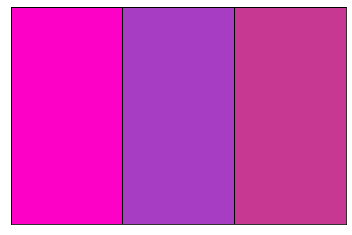

GRAY


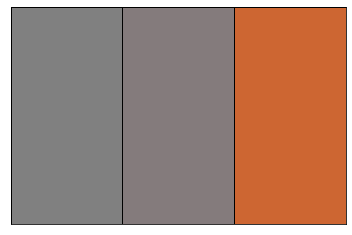

blue


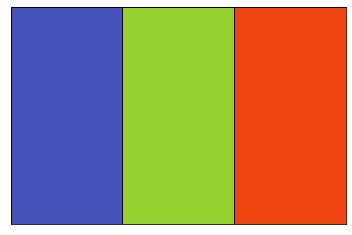

SLATE GRAY


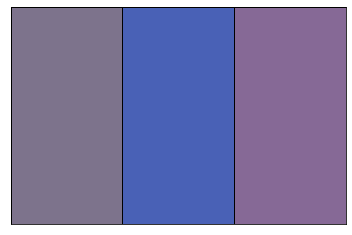

lime green


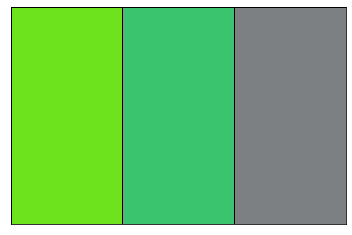

light brown


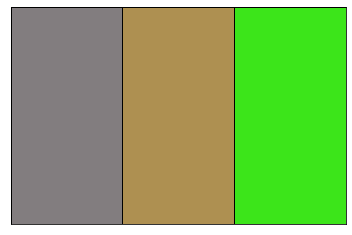

light blue


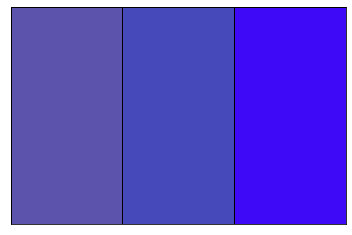

Blue


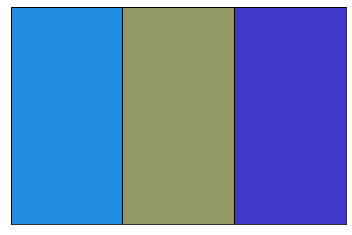

violet


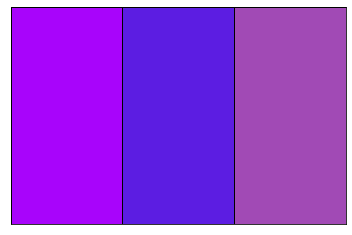

dark green


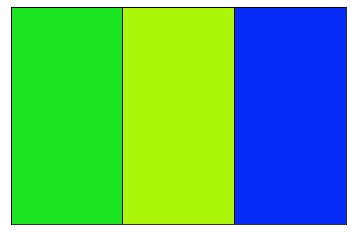

In [78]:
for i in range(10):
    mturk_data_combined_1234.display_custom_game(csv_datasets[0][i][1].colors, csv_datasets[0][i][1].caption)
    

In [18]:
def colors_to_hexes(colors):
    hexes = []
    for c in colors:
        hexcode = "#"
        hexcode += "".join([format(int(val), '02x') for val in c.rgb])
        hexes.append(hexcode)
    return hexes

In [19]:
colors_to_hexes(csv_datasets[0][0][1].colors)

['#ff01c8', '#a83dc3', '#c83893']

In [20]:
import random
random.seed(43)

In [140]:
# for each dataset:
# create new row
# for each context in dataset
# randomize order of colors (with indices!)
# convert each color to hexcode
# add to row

listener_turkfile_entries = []
for datarow in csv_datasets:
    row = ""
    for target_idx, context in datarow:
        hexes = colors_to_hexes(context.colors)
        hex_pairs = list(zip(range(3), hexes))
        # shuffle pairs
        random.shuffle(hex_pairs)
        print(context)
        print(hex_pairs)
        tid = 0
        for i, (hi, h) in enumerate(hex_pairs):
            if hi == target_idx:
                tid = i
                break
        print(tid)
        _, hexes = zip(*hex_pairs)
        row += '"{}",{},{},{},{},'.format(normalize(context.caption), *hexes, tid)
    
    row = row[:-1] # get rid of trailing comma
    listener_turkfile_entries.append(row)

MEDIUM VIOLET RED
[(2, '#c83893'), (1, '#a83dc3'), (0, '#ff01c8')]
2
GRAY
[(1, '#857b7c'), (0, '#808080'), (2, '#ce6632')]
1
blue
[(0, '#4454bc'), (2, '#ef4511'), (1, '#96d22e')]
2
SLATE GRAY
[(1, '#4961b7'), (0, '#7d738d'), (2, '#876997')]
1
lime green
[(0, '#6ce41c'), (2, '#7d8083'), (1, '#3bc56e')]
0
light brown
[(1, '#af9151'), (0, '#837d7f'), (2, '#3ce61a')]
0
light blue
[(0, '#5c53ad'), (1, '#4549bb'), (2, '#3d09f7')]
0
Blue
[(0, '#1f8de1'), (1, '#949a66'), (2, '#4238c8')]
0
violet
[(0, '#a904fc'), (1, '#5c1de3'), (2, '#a24ab6')]
1
dark green
[(2, '#062bfa'), (0, '#1ae620'), (1, '#acf709')]
1
VIOLET
[(1, '#a83dc3'), (2, '#c83893'), (0, '#ff01c8')]
2
gray
[(2, '#ce6632'), (1, '#808080'), (0, '#857b7c')]
1
YELLOW GREEN
[(1, '#4454bc'), (2, '#ef4511'), (0, '#96d22e')]
2
GRAY
[(2, '#876997'), (1, '#4961b7'), (0, '#7d738d')]
2
light green
[(2, '#7d8083'), (1, '#6ce41c'), (0, '#3bc56e')]
1
light brown
[(0, '#af9151'), (1, '#837d7f'), (2, '#3ce61a')]
0
deep blue
[(1, '#4549bb'), (0, '#5

In [98]:
len(listener_turkfile_entries)

51

In [133]:
listener_turkfile_entries[1]

'"medium violet red",#c83893,#a83dc3,#ff01c8,0,"gray",#857b7c,#808080,#ce6632,0,"blue",#4454bc,#ef4511,#96d22e,1,"slate gray",#4961b7,#7d738d,#876997,0,"lime green",#6ce41c,#7d8083,#3bc56e,0,"light brown",#af9151,#837d7f,#3ce61a,1,"light blue",#5c53ad,#4549bb,#3d09f7,0,"blue",#1f8de1,#949a66,#4238c8,0,"violet",#a904fc,#5c1de3,#a24ab6,1,"dark green",#062bfa,#1ae620,#acf709,0'

In [99]:
listener_turkfile_entries[0]

'medium violet red,#c83893,#a83dc3,#ff01c8,0,gray,#857b7c,#808080,#ce6632,0,blue,#4454bc,#ef4511,#96d22e,1,slate gray,#4961b7,#7d738d,#876997,0,lime green,#6ce41c,#7d8083,#3bc56e,0,light brown,#af9151,#837d7f,#3ce61a,1,light blue,#5c53ad,#4549bb,#3d09f7,0,blue,#1f8de1,#949a66,#4238c8,0,violet,#a904fc,#5c1de3,#a24ab6,1,dark green,#062bfa,#1ae620,#acf709,0'

In [126]:
# now just add headings

listener_headings = []
for i in range(10):
    listener_headings.append("ex{}desc".format(i))
    for j in range(3):
        listener_headings.append("ex{}c{}".format(i, j+1))
    listener_headings.append("ex{}target".format(i))




In [127]:
listener_turkfile_entries = listener_turkfile_entries[1:]

In [141]:
listener_turkfile_entries.insert(0, ",".join(listener_headings))

In [142]:
listener_turkfile_entries[1]

'"medium violet red",#c83893,#a83dc3,#ff01c8,2,"gray",#857b7c,#808080,#ce6632,1,"blue",#4454bc,#ef4511,#96d22e,2,"slate gray",#4961b7,#7d738d,#876997,1,"lime green",#6ce41c,#7d8083,#3bc56e,0,"light brown",#af9151,#837d7f,#3ce61a,0,"light blue",#5c53ad,#4549bb,#3d09f7,0,"blue",#1f8de1,#949a66,#4238c8,0,"violet",#a904fc,#5c1de3,#a24ab6,1,"dark green",#062bfa,#1ae620,#acf709,1'

In [143]:
with open("../data/mturk/listener_pilot.csv", "w") as lcsv:
    lcsv.write("\n".join(listener_turkfile_entries))

8/2/2019

So, Chris suggested not emphasizing our model's performnce but instead comparing to human data, and I think he's correct. Sigh... He did suggest a number of good editing things to think about. I'll work on those tonight and this weekend.


This is going to involve collecting a lot more human data. I also want to validate the descriptive/misleading (i.e. "good") descriptions, so I think it would be good to collect three replicates of each and only keep them if at least 2 of the 3 people agree. I also want to use those as human data responses.

Also, fun fact, workers can only complete a HIT once regardless of the number of assignments!

I'm going to format ALL of the caption data I collected from humans (i.e. not including monroe data) into surveys and ahve listeners play the game.


1. Get human ratings of the good captions (in flipped and unflipped). Just keep the ones with high agreement
2. Use these to filter out the bad ambiguous captions. Show the ones remaining to 3 peope each.

Some other requirements: 
- I don't want the same person to see two different captions for the same context. I also want to keep the flipped and unflipped ones as separate as possible. I don't know if that's possible, but we'll see.
- I also want 10 contexts per HIT. If I do this right, I should 520 HITs

In [291]:
print(len((ctx_good_unflipped_comb1234)))
print(len(ctx_good_flipped_comb1234))



900
900


In [295]:
def contexts_to_hits(contexts,
                     num_contexts_per_hit = 10,
                     num_reps = 5):
    
    window_width = num_reps * num_contexts_per_hit
    hits = []
    for i in range(0, len(ctx_good_unflipped_comb1234), window_width):
        for j in range(num_reps):
            hits.append(contexts[i + j: i + window_width : num_reps])
            
    return hits

In [300]:
unflipped_hits = contexts_to_hits(ctx_good_unflipped_comb1234)
flipped_hits = contexts_to_hits(ctx_good_flipped_comb1234)

In [302]:
len(flipped_hits)

90

In [ ]:
# now let's convert these to the csvs

In [390]:
def contexts_to_csv_rows(hit_contexts):
    random.seed(123)
    listener_turkfile_entries = []
    for datarow in hit_contexts:
        row = ""
        for context in datarow:
            #print(context)
            hexes = colors_to_hexes(context.colors)
            hex_pairs = list(zip(range(3), hexes))
            # shuffle pairs
            random.shuffle(hex_pairs)
#             print(context)
#             print(hex_pairs)
#             tid = 0
#             for i, (hi, h) in enumerate(hex_pairs):
#                 if hi == target_idx:
#                     tid = i
#                     break
#             print(tid)
            idxs, hexes = zip(*hex_pairs)
            idxs = "".join(str(idx) for idx in idxs)
            row += '"{}",{},{},{},{},'.format(normalize(context.caption), *hexes, idxs)
            if '"' in context.caption:
                print(row)

        row = row[:-1] # get rid of trailing comma
        listener_turkfile_entries.append(row)
    return listener_turkfile_entries

In [391]:
unflipped_csv_rows = contexts_to_csv_rows(unflipped_hits)
flipped_csv_rows = contexts_to_csv_rows(flipped_hits)

"dark purple",#ca36aa,#0de0f3,#a040c0,120,"blue",#2504fc,#738d8a,#9358a8,021,"dark green",#53ad5f,#8eaa56,#5aa677,210,"dark green",#838f71,#6f936d,#5c80a4,102,"lime green",#0df33b,#206de0,#a5955b,021,"it is like princes favorite color except with a little gray added.",#84748c,#847c82,#64779c,102,"this is the color they call puke ___",#2cd464,#d12fa8,#b2dd23,021,
"dark purple",#ca36aa,#0de0f3,#a040c0,120,"blue",#2504fc,#738d8a,#9358a8,021,"dark green",#53ad5f,#8eaa56,#5aa677,210,"dark green",#838f71,#6f936d,#5c80a4,102,"lime green",#0df33b,#206de0,#a5955b,021,"it is like princes favorite color except with a little gray added.",#84748c,#847c82,#64779c,102,"this is the color they call puke ___",#2cd464,#d12fa8,#b2dd23,021,"princes favorite color or the color the girl was in willy wonka when she blew up.",#6a60a0,#a0606e,#42c838,012,"again puke ____",#29d789,#29d76c,#0af635,012,
"dark purple",#ca36aa,#0de0f3,#a040c0,120,"blue",#2504fc,#738d8a,#9358a8,021,"dark green",#53ad5f,#8eaa56,#5aa67

In [314]:
len(unflipped_csv_rows)




90

In [315]:
listener_validation_headers = []
for i in range(10):
    listener_validation_headers.append("ex{}desc".format(i))
    for j in range(3):
        listener_validation_headers.append("ex{}c{}".format(i, j+1))
    listener_validation_headers.append("ex{}randorder".format(i))

In [319]:
listener_validation_header_str = ",".join(listener_validation_headers)

In [358]:
len(unflipped_hits[0])

10

In [320]:
"\n".join([listener_validation_header_str] + unflipped_csv_rows)

'ex0desc,ex0c1,ex0c2,ex0c3,ex0randorder,ex1desc,ex1c1,ex1c2,ex1c3,ex1randorder,ex2desc,ex2c1,ex2c2,ex2c3,ex2randorder,ex3desc,ex3c1,ex3c2,ex3c3,ex3randorder,ex4desc,ex4c1,ex4c2,ex4c3,ex4randorder,ex5desc,ex5c1,ex5c2,ex5c3,ex5randorder,ex6desc,ex6c1,ex6c2,ex6c3,ex6randorder,ex7desc,ex7c1,ex7c2,ex7c3,ex7randorder,ex8desc,ex8c1,ex8c2,ex8c3,ex8randorder,ex9desc,ex9c1,ex9c2,ex9c3,ex9randorder\n"bright pink",#c83893,#a83dc3,#ff01c8,210,"dark grey",#ce6632,#857b7c,#808080,210,"lime green",#ef4511,#96d22e,#4454bc,201,"purple grey",#876997,#4961b7,#7d738d,210,"bright green",#6ce41c,#3bc56e,#7d8083,012,"brown",#3ce61a,#af9151,#837d7f,201,"indigo",#4549bb,#3d09f7,#5c53ad,120,"purple",#8f24dc,#81817f,#6b46ba,021,"light blue",#949a66,#1f8de1,#4238c8,102,"light violet",#a904fc,#a24ab6,#5c1de3,120\n"medium violet red",#c83893,#ff01c8,#a83dc3,201,"dim gray",#808080,#857b7c,#ce6632,012,"yellow green",#4454bc,#ef4511,#96d22e,120,"slate gray",#7d738d,#876997,#4961b7,021,"lawn green",#3bc56e,#7d8083,#6ce4

In [361]:
len(unflipped_csv_rows[:len(unflipped_csv_rows)//2])

45

In [394]:
# with open("../data/mturk/listener_unflipped_exp_8_3_2019.csv", "w") as lcsv:
#     lcsv.write("\n".join([listener_validation_header_str] + unflipped_csv_rows[:len(unflipped_csv_rows)//2]))
    
with open("../data/mturk/listener_unflipped_exp_8_4_2019.csv", "w") as lcsv:
    lcsv.write("\n".join([listener_validation_header_str] + unflipped_csv_rows[len(unflipped_csv_rows)//2:]))

In [571]:
with open("../data/mturk/listener_flipped_exp_8_5_2019.csv", "w") as lcsv:
    lcsv.write("\n".join([listener_validation_header_str] + flipped_csv_rows))
    
# with open("../data/mturk/listener_flipped_exp_8_6_2019.csv", "w") as lcsv:
#     lcsv.write("\n".join([listener_validation_header_str] + flipped_csv_rows[len(flipped_csv_rows)//2:]))

In [366]:
unflipped_csv_rows[len(unflipped_csv_rows)//2:][38:42]

['"dark purple",#ca36aa,#0de0f3,#a040c0,120,"blue",#2504fc,#738d8a,#9358a8,021,"dark green",#53ad5f,#8eaa56,#5aa677,210,"dark green",#838f71,#6f936d,#5c80a4,102,"lime green",#0df33b,#206de0,#a5955b,021,"it is like princes favorite color except with a little gray added.",#84748c,#847c82,#64779c,102,"this is the color they call "puke ___"",#2cd464,#d12fa8,#b2dd23,021,"princes favorite color or the color the girl was in willy wonka when she blew up.",#6a60a0,#a0606e,#42c838,012,"again "puke ____"",#29d789,#29d76c,#0af635,012,""_____ floyd" "pretty in _____"",#df2167,#b34d93,#6e927d,012',
 '"light violet",#a040c0,#0de0f3,#ca36aa,021,"dark blue",#9358a8,#738d8a,#2504fc,120,"light green",#53ad5f,#5aa677,#8eaa56,201,"light green",#6f936d,#838f71,#5c80a4,012,"dark green",#206de0,#0df33b,#a5955b,201,"light grey",#847c82,#64779c,#84748c,021,"light green",#b2dd23,#d12fa8,#2cd464,120,"purple",#42c838,#a0606e,#6a60a0,210,"dark green",#0af635,#29d789,#29d76c,201,"hot pink",#df2167,#b34d93,#6e927d,01

In [392]:
bad_csv_row = unflipped_csv_rows[45+38].split(",")

In [393]:
bad_csv_row[-5]

'"_____ floyd pretty in _____"'

In [388]:
normalize(bad_csv_row[-5])

'_____ floyd pretty in _____'

In [350]:
unflipped_csv_rows[20].split(",")[45:50]

['"greenish grey"', '#6c946c', '#3d44c3', '#7a8878', '021']

bright pink 210


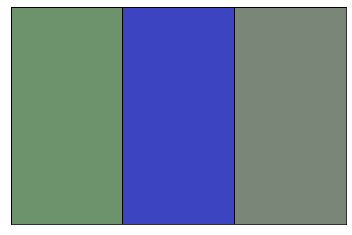

In [351]:
mturk_data_combined_1234.display_custom_game([hex_to_color(h) for h in ['#6c946c', '#3d44c3', '#7a8878']], "bright pink 210")


In [148]:
# to analyze this data, I'm going to have to undo all of these changes and get back to the three lists while keeping
# the targets and selected colors

import pandas as pd
import json

In [145]:
listener_pilot_df = pd.read_csv("../data/mturk/listener_pilot_results.csv")

In [165]:
listener_pilot_df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.ex0desc',
       'Input.ex0c1', 'Input.ex0c2', 'Input.ex0c3', 'Input.ex0target',
       'Input.ex1desc', 'Input.ex1c1', 'Input.ex1c2', 'Input.ex1c3',
       'Input.ex1target', 'Input.ex2desc', 'Input.ex2c1', 'Input.ex2c2',
       'Input.ex2c3', 'Input.ex2target', 'Input.ex3desc', 'Input.ex3c1',
       'Input.ex3c2', 'Input.ex3c3', 'Input.ex3target', 'Input.ex4desc',
       'Input.ex4c1', 'Input.ex4c2', 'Input.ex4c3', 'Input.ex4target',
       

In [146]:
listener_pilot_results = listener_pilot_df["Answer.taskAnswers"]

In [149]:
listener_pilot_results_json = []
for res in listener_pilot_results:
    listener_pilot_results_json.append(json.loads(res))

In [150]:
listener_pilot_results_json

[[{'ex0answer': {'0': True, '1': False, '2': False},
   'ex1answer': {'0': False, '1': True, '2': False},
   'ex2answer': {'0': True, '1': False, '2': False},
   'ex3answer': {'0': False, '1': True, '2': False},
   'ex4answer': {'0': True, '1': False, '2': False},
   'ex5answer': {'0': True, '1': False, '2': False},
   'ex6answer': {'0': False, '1': True, '2': False},
   'ex7answer': {'0': False, '1': False, '2': True},
   'ex8answer': {'0': False, '1': False, '2': True},
   'ex9answer': {'0': False, '1': True, '2': False}}],
 [{'ex0answer': {'0': True, '1': False, '2': False},
   'ex1answer': {'0': False, '1': True, '2': False},
   'ex2answer': {'0': False, '1': False, '2': True},
   'ex3answer': {'0': False, '1': False, '2': True},
   'ex4answer': {'0': False, '1': True, '2': False},
   'ex5answer': {'0': True, '1': False, '2': False},
   'ex6answer': {'0': True, '1': False, '2': False},
   'ex7answer': {'0': False, '1': True, '2': False},
   'ex8answer': {'0': True, '1': False, '2':

In [161]:
listener_pilot_click_idxs = []
for j in listener_pilot_results_json:
    for hit in j:
        hit_clicks = []
        for ans_key, answer in hit.items():
            if ans_key == "comment-final": continue
            for choice, selected in answer.items():
                if selected:
                    hit_clicks.append(int(choice))
        listener_pilot_click_idxs.append(hit_clicks)

In [17]:
def extract_click_idxs(df):
    answers = df["Answer.taskAnswers"]
    
    results_json = []
    for res in answers:
        results_json.append(json.loads(res))
        
    click_idxs = []
    for j in results_json:
        for hit in j:
            hit_clicks = []
            for ans_key, answer in hit.items():
                if ans_key == "comment-final": continue
                for choice, selected in answer.items():
                    if selected:
                        hit_clicks.append(int(choice))
            click_idxs.append(hit_clicks)
    return click_idxs

In [162]:
len(listener_pilot_click_idxs)

51

In [163]:
listener_pilot_click_idxs

[[0, 1, 0, 1, 0, 0, 1, 2, 2, 1],
 [0, 1, 2, 2, 1, 0, 0, 1, 0, 2],
 [0, 1, 1, 0, 2, 1, 0, 2, 0, 2],
 [1, 2, 1, 0, 0, 0, 2, 2, 2, 1],
 [1, 0, 2, 1, 2, 2, 0, 2, 1, 0],
 [1, 1, 2, 0, 1, 0, 0, 1, 0, 2],
 [0, 2, 1, 1, 1, 2, 1, 0, 2, 2],
 [2, 2, 1, 0, 0, 2, 2, 1, 2, 2],
 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
 [2, 2, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 2, 1, 1, 1, 1, 0, 1, 1, 2],
 [0, 2, 2, 2, 1, 1, 0, 1, 0, 0],
 [2, 1, 2, 1, 1, 1, 2, 0, 2, 2],
 [0, 1, 1, 0, 2, 2, 0, 2, 1, 2],
 [0, 1, 1, 1, 2, 2, 1, 0, 2, 0],
 [1, 1, 2, 0, 0, 0, 2, 1, 2, 2],
 [0, 2, 2, 0, 2, 1, 0, 1, 2, 0],
 [1, 2, 0, 0, 0, 0, 2, 0, 1, 1],
 [0, 1, 2, 1, 2, 2, 0, 1, 1, 2],
 [0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
 [2, 0, 0, 1, 1, 0, 2, 2, 0, 2],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
 [0, 0, 1, 1, 2, 2, 2, 0, 0, 2],
 [0, 2, 0, 0, 0, 2, 1, 2, 2, 1],
 [1, 1, 0, 0, 2, 1, 2, 1, 0, 0],
 [1, 1, 1, 0, 2, 1, 0, 0, 1, 1],
 [2, 0, 1, 2, 1, 0, 1, 0, 2, 1],
 [1, 1, 1, 2, 2, 2, 1, 1, 2, 2],
 [0, 1, 1, 0, 1, 2, 1, 0, 0, 2],
 [0, 0, 1, 1, 2, 0, 0, 0, 2, 2],
 [0, 1, 2,

In [166]:
listener_pilot_target_idxs = []
for i in range(len(listener_pilot_click_idxs)):
    target_idxs = []
    for j in range(10):
        column_head = "Input.ex{}target".format(j)
        target_idxs.append(listener_pilot_df.loc[i, column_head])
    listener_pilot_target_idxs.append(target_idxs)
    

In [167]:
listener_pilot_target_idxs[:10]

[[2, 1, 2, 1, 0, 0, 0, 0, 1, 1],
 [2, 1, 2, 2, 1, 0, 1, 2, 2, 2],
 [1, 1, 1, 0, 2, 0, 2, 2, 2, 1],
 [1, 1, 0, 0, 0, 1, 2, 1, 2, 1],
 [1, 1, 2, 1, 0, 2, 2, 2, 0, 0],
 [2, 2, 2, 1, 2, 0, 2, 1, 2, 0],
 [1, 1, 2, 2, 1, 1, 1, 2, 0, 0],
 [1, 1, 1, 2, 0, 2, 2, 2, 2, 1],
 [2, 1, 1, 0, 2, 2, 2, 0, 1, 2],
 [2, 2, 0, 1, 0, 2, 0, 0, 1, 0]]

In [168]:
listener_pilot_click_idxs[:10]

[[0, 1, 0, 1, 0, 0, 1, 2, 2, 1],
 [0, 1, 2, 2, 1, 0, 0, 1, 0, 2],
 [0, 1, 1, 0, 2, 1, 0, 2, 0, 2],
 [1, 2, 1, 0, 0, 0, 2, 2, 2, 1],
 [1, 0, 2, 1, 2, 2, 0, 2, 1, 0],
 [1, 1, 2, 0, 1, 0, 0, 1, 0, 2],
 [0, 2, 1, 1, 1, 2, 1, 0, 2, 2],
 [2, 2, 1, 0, 0, 2, 2, 1, 2, 2],
 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
 [2, 2, 1, 1, 0, 0, 0, 0, 1, 0]]

In [169]:
np.sum(np.array(listener_pilot_target_idxs).flatten() == np.array(listener_pilot_click_idxs).flatten())

243

In [171]:
len(np.array(listener_pilot_target_idxs).flatten())

510

In [182]:
# now line up with conditions...
listener_pilot_cap_conditions = [] # good, bad, ugly (i.e descriptive, ambiguous, misleading)

# designed so that it alternates: 
cap_cond_choices = ['good', 'bad', 'ugly']
for i in range(len(listener_pilot_df)):
    hit_cap_conds = []
    for j in range(i%3, i%3 + 10):
        hit_cap_conds.append(cap_cond_choices[j%3])
    listener_pilot_cap_conditions.append(hit_cap_conds)

In [183]:
listener_pilot_cap_conditions[:10]

[['good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good'],
 ['bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad'],
 ['ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly'],
 ['good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good'],
 ['bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad'],
 ['ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly'],
 ['good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good'],
 ['bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad'],
 ['ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly'],
 ['good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good', 'bad', 'ugly', 'good']]

In [56]:
def hexcode_to_rgb(hexcode):
    hexcode = hexcode.lstrip("#")
    hexcode = [hexcode[i:i+2] for i in range(0, len(hexcode), 2)]
    rgb = [int(h, 16) for h in hexcode]
    return rgb

def hex_to_color(col_hex):
    rgb = hexcode_to_rgb(col_hex)
    return Color(*rgb, space="rgb")

In [178]:
# and finally, let's actually get out the colors too:
listener_pilot_colors = []
listener_pilot_descriptions = []
for i in range(len(listener_pilot_df)):
    hit_cols = []
    hit_descs = []
    for j in range(10): # contexts per hit
        colors = []
        for ci in range(3): # number of colors
            column_header = "Input.ex{}c{}".format(j, ci+1)
            color_hex = listener_pilot_df.loc[i, column_header]
            colors.append(hex_to_color(color_hex))
        hit_cols.append(colors)
        
        column_header = "Input.ex{}desc".format(j)
        hit_descs.append(listener_pilot_df.loc[i, column_header])
        
    listener_pilot_colors.append(hit_cols)
    listener_pilot_descriptions.append(hit_descs)
            

In [180]:
listener_pilot_descriptions

[['medium violet red',
  'gray',
  'blue',
  'slate gray',
  'lime green',
  'light brown',
  'light blue',
  'blue',
  'violet',
  'dark green'],
 ['violet',
  'gray',
  'yellow green',
  'gray',
  'light green',
  'light brown',
  'deep blue',
  'khaki',
  'light violet',
  'green'],
 ['violate',
  'dim gray',
  'yellow',
  'light blue',
  'bright green',
  'pale',
  'dark blue',
  'light blue',
  'purple',
  'lemon green'],
 ['blue grey',
  'gray',
  'purple',
  'grey',
  'green',
  'lilac',
  'purple',
  "it's darker than pink",
  'green',
  'dark blue'],
 ['grey',
  'mauve',
  'navy blue',
  'light',
  'olive green',
  'deep blue',
  'bright',
  'light purple',
  'green',
  'midnight blue'],
 ['leaf green',
  'blue-ish gray',
  'blue-ish',
  'royal blue',
  'forest green',
  'purplish',
  'green',
  'purple',
  'it means go',
  'gray'],
 ['moss green',
  'purple',
  'blue',
  'ocean blue',
  'green',
  'grey, dull',
  'olive green',
  'green',
  'green',
  'dark green'],
 ['forest

0.0 medium violet red (good) CLICK: 0 TRGT: 2


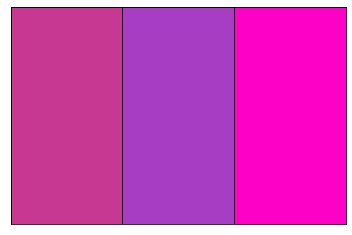

0.1 gray (bad) CLICK: 1 TRGT: 1


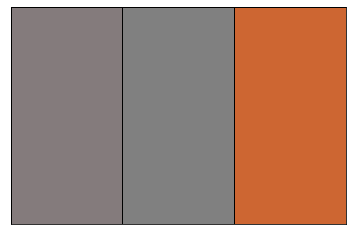

0.2 blue (ugly) CLICK: 0 TRGT: 2


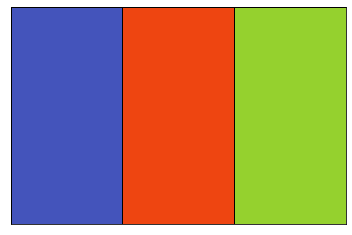

0.3 slate gray (good) CLICK: 1 TRGT: 1


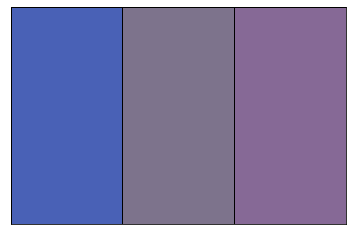

0.4 lime green (bad) CLICK: 0 TRGT: 0


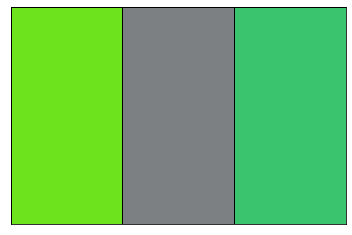

0.5 light brown (ugly) CLICK: 0 TRGT: 0


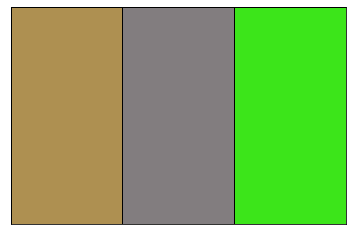

0.6 light blue (good) CLICK: 1 TRGT: 0


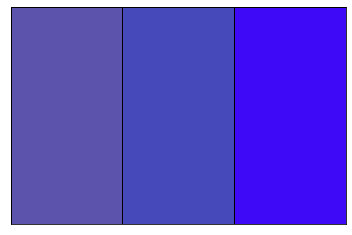

0.7 blue (bad) CLICK: 2 TRGT: 0


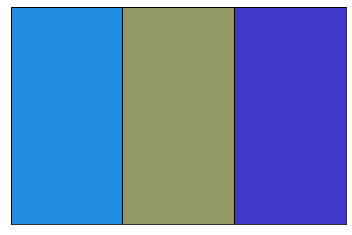

0.8 violet (ugly) CLICK: 2 TRGT: 1


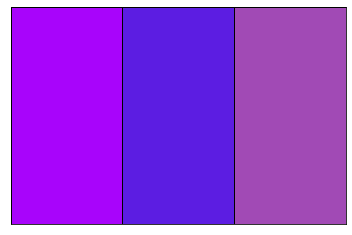

0.9 dark green (good) CLICK: 1 TRGT: 1


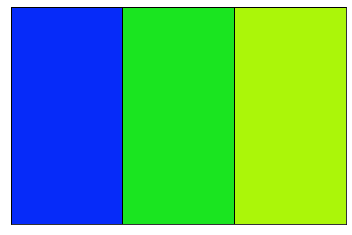

1.0 violet (bad) CLICK: 0 TRGT: 2


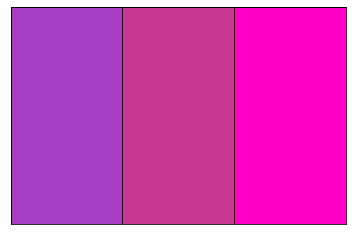

1.1 gray (ugly) CLICK: 1 TRGT: 1


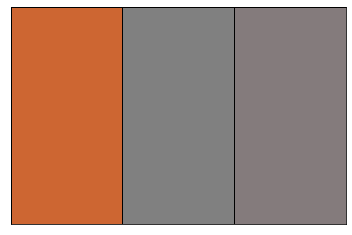

1.2 yellow green (good) CLICK: 2 TRGT: 2


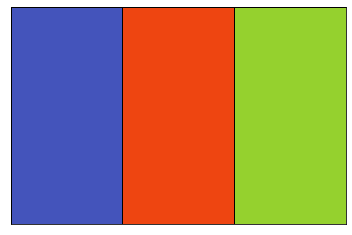

1.3 gray (bad) CLICK: 2 TRGT: 2


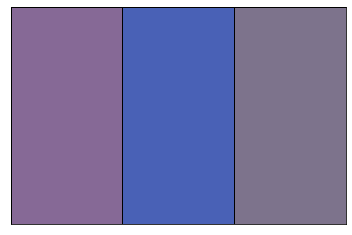

1.4 light green (ugly) CLICK: 1 TRGT: 1


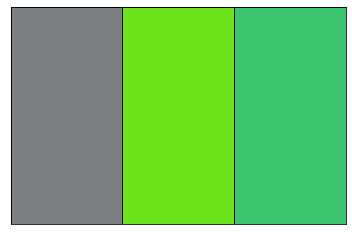

1.5 light brown (good) CLICK: 0 TRGT: 0


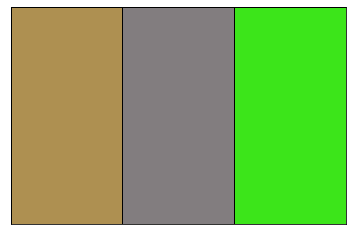

1.6 deep blue (bad) CLICK: 0 TRGT: 1


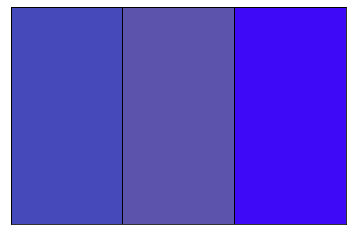

1.7 khaki (ugly) CLICK: 1 TRGT: 2


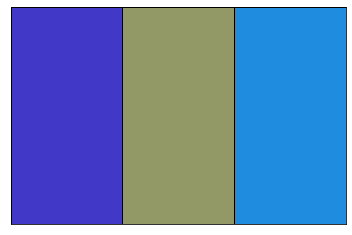

1.8 light violet (good) CLICK: 0 TRGT: 2


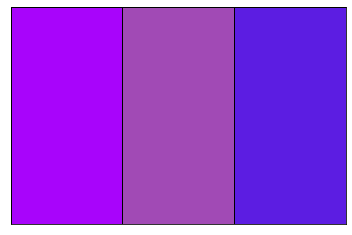

1.9 green (bad) CLICK: 2 TRGT: 2


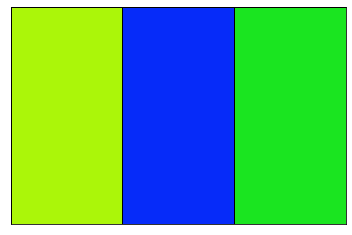

2.0 violate (ugly) CLICK: 0 TRGT: 1


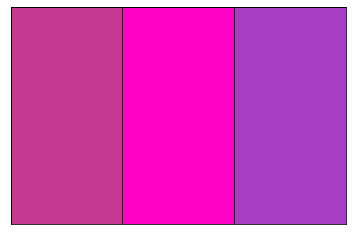

2.1 dim gray (good) CLICK: 1 TRGT: 1


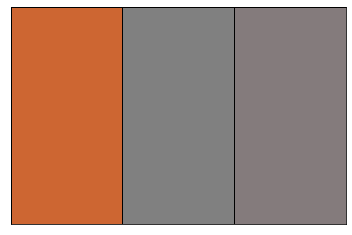

2.2 yellow (bad) CLICK: 1 TRGT: 1


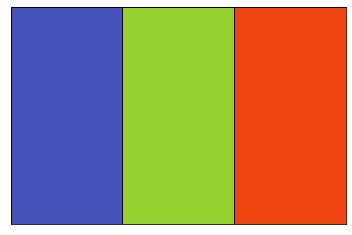

2.3 light blue (ugly) CLICK: 0 TRGT: 0


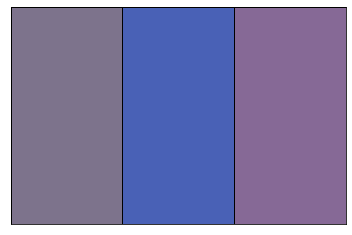

2.4 bright green (good) CLICK: 2 TRGT: 2


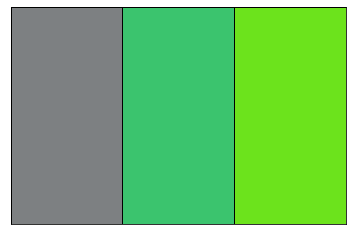

2.5 pale (bad) CLICK: 1 TRGT: 0


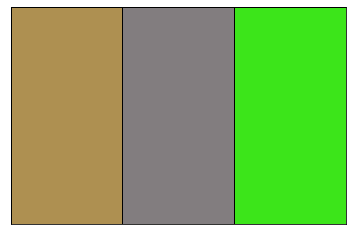

2.6 dark blue (ugly) CLICK: 0 TRGT: 2


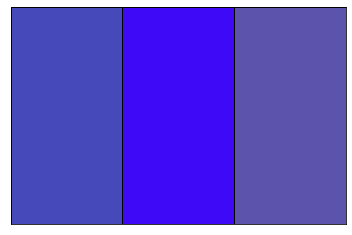

2.7 light blue (good) CLICK: 2 TRGT: 2


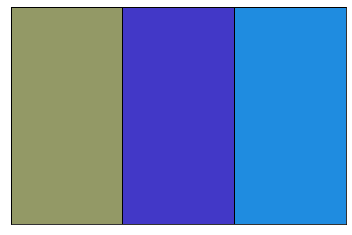

2.8 purple (bad) CLICK: 0 TRGT: 2


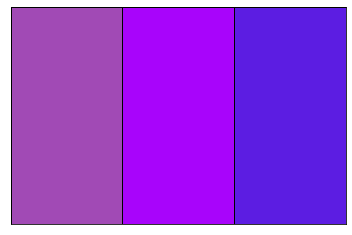

2.9 lemon green (ugly) CLICK: 2 TRGT: 1


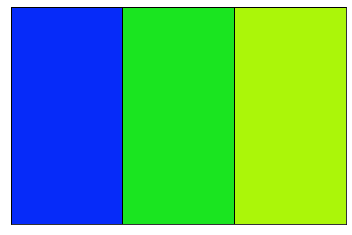

3.0 blue grey (good) CLICK: 1 TRGT: 1


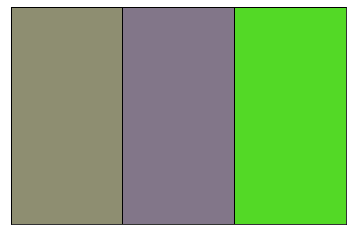

3.1 gray (bad) CLICK: 2 TRGT: 1


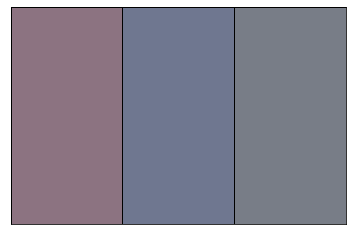

3.2 purple (ugly) CLICK: 1 TRGT: 0


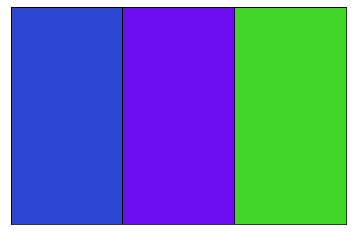

3.3 grey (good) CLICK: 0 TRGT: 0


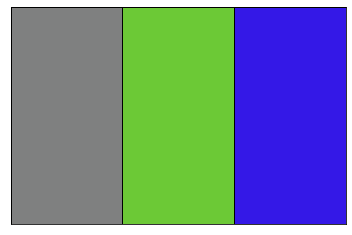

3.4 green (bad) CLICK: 0 TRGT: 0


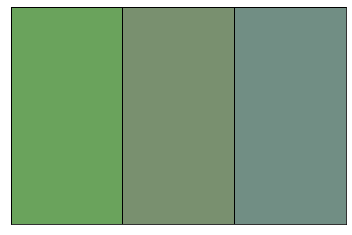

3.5 lilac (ugly) CLICK: 0 TRGT: 1


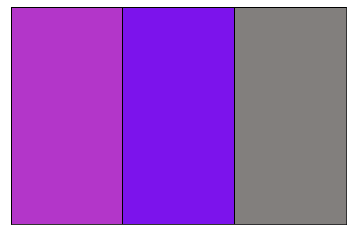

3.6 purple (good) CLICK: 2 TRGT: 2


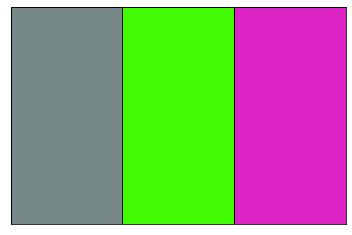

3.7 it's darker than pink (bad) CLICK: 2 TRGT: 1


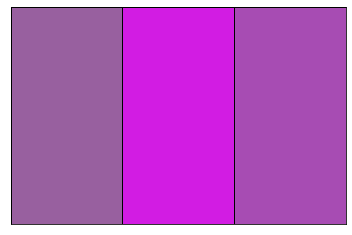

3.8 green (ugly) CLICK: 2 TRGT: 2


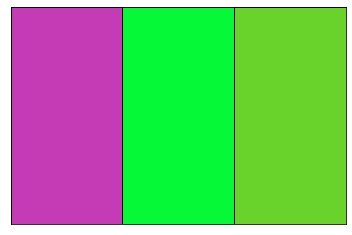

3.9 dark blue (good) CLICK: 1 TRGT: 1


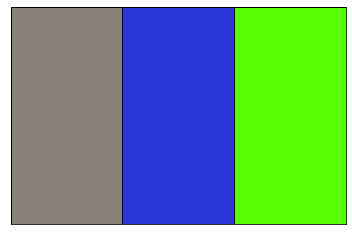

4.0 grey (bad) CLICK: 1 TRGT: 1


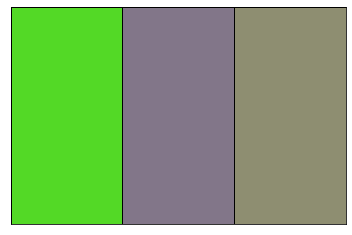

4.1 mauve (ugly) CLICK: 0 TRGT: 1


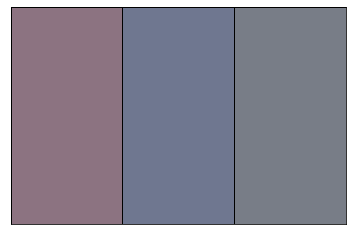

4.2 navy blue (good) CLICK: 2 TRGT: 2


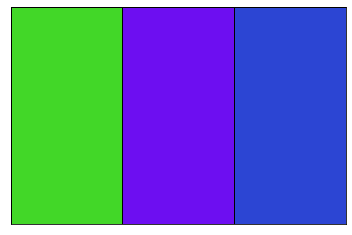

4.3 light (bad) CLICK: 1 TRGT: 1


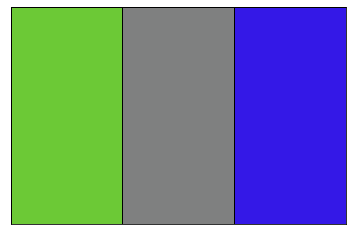

4.4 olive green (ugly) CLICK: 2 TRGT: 0


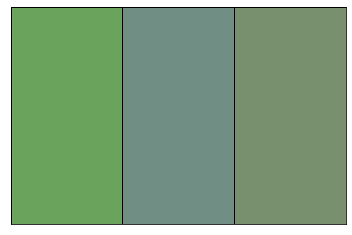

4.5 deep blue (good) CLICK: 2 TRGT: 2


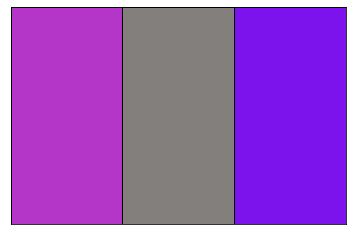

4.6 bright (bad) CLICK: 0 TRGT: 2


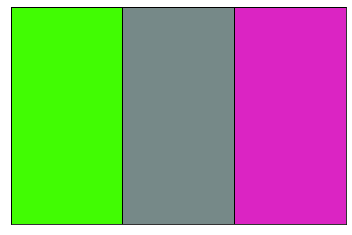

4.7 light purple (ugly) CLICK: 2 TRGT: 2


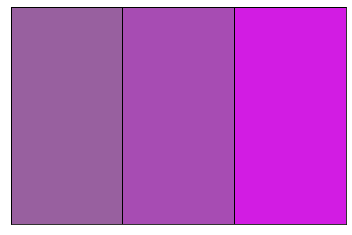

4.8 green (good) CLICK: 1 TRGT: 0


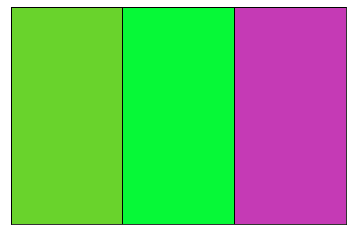

4.9 midnight blue (bad) CLICK: 0 TRGT: 0


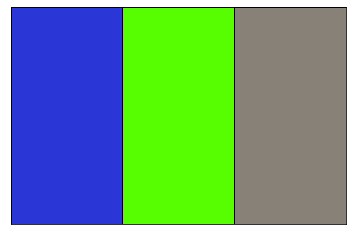

5.0 leaf green (ugly) CLICK: 1 TRGT: 2


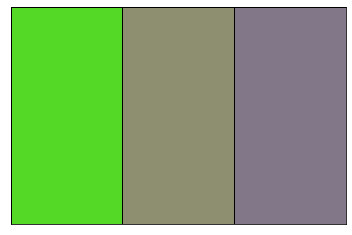

5.1 blue-ish gray (good) CLICK: 1 TRGT: 2


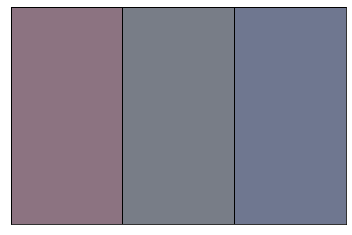

5.2 blue-ish (bad) CLICK: 2 TRGT: 2


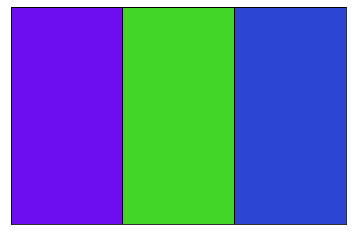

5.3 royal blue (ugly) CLICK: 0 TRGT: 1


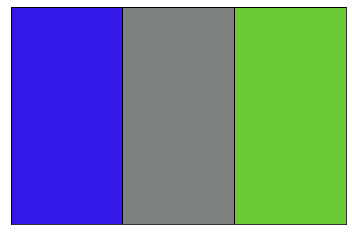

5.4 forest green (good) CLICK: 1 TRGT: 2


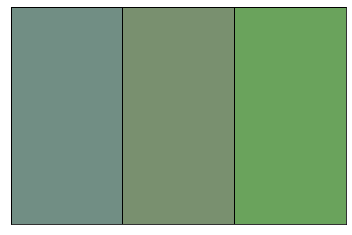

5.5 purplish (bad) CLICK: 0 TRGT: 0


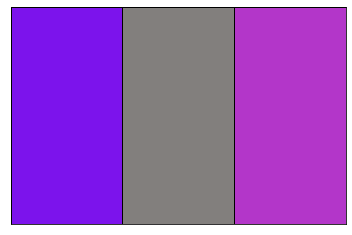

5.6 green (ugly) CLICK: 0 TRGT: 2


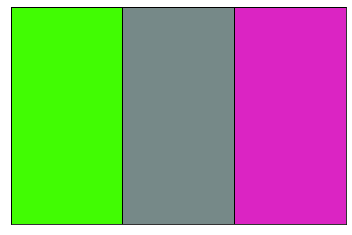

5.7 purple (good) CLICK: 1 TRGT: 1


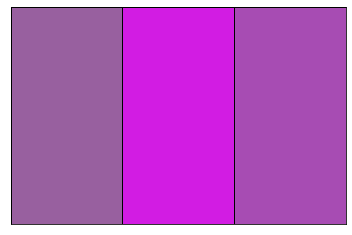

5.8 it means go (bad) CLICK: 0 TRGT: 2


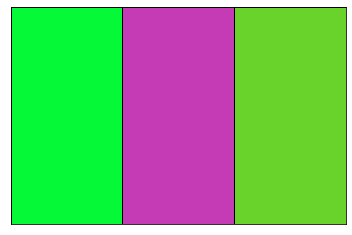

5.9 gray (ugly) CLICK: 2 TRGT: 0


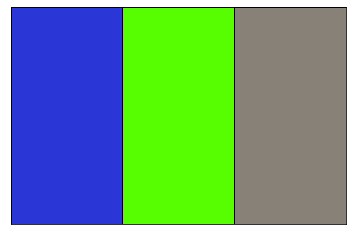

6.0 moss green (good) CLICK: 0 TRGT: 1


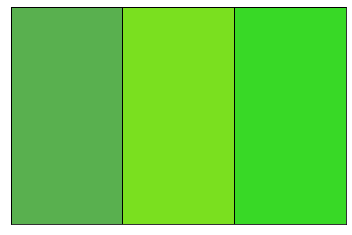

6.1 purple (bad) CLICK: 2 TRGT: 1


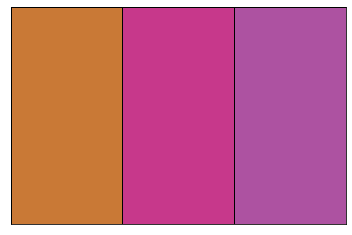

6.2 blue (ugly) CLICK: 1 TRGT: 2


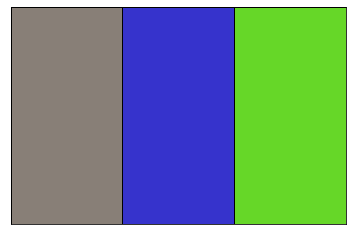

6.3 ocean blue (good) CLICK: 1 TRGT: 2


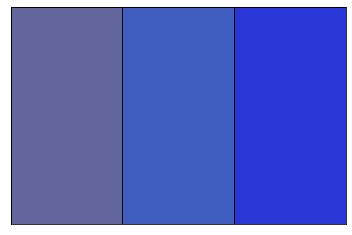

6.4 green (bad) CLICK: 1 TRGT: 1


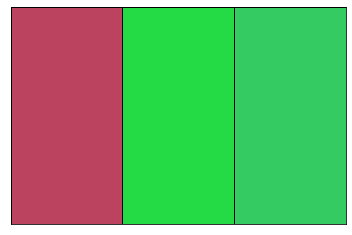

6.5 grey, dull (ugly) CLICK: 2 TRGT: 1


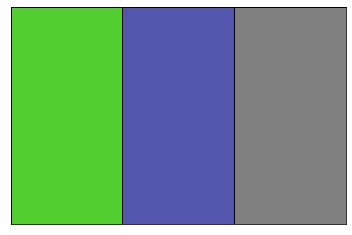

6.6 olive green (good) CLICK: 1 TRGT: 1


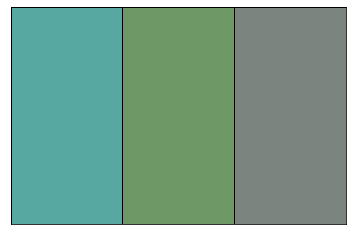

6.7 green (bad) CLICK: 0 TRGT: 2


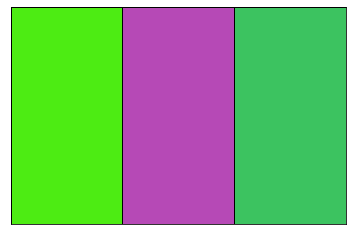

6.8 green (ugly) CLICK: 2 TRGT: 0


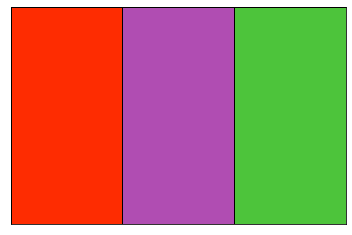

6.9 dark green (good) CLICK: 2 TRGT: 0


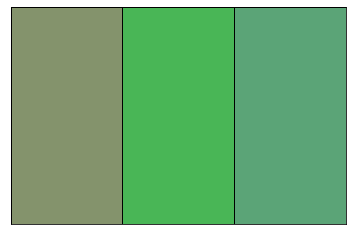

7.0 forest green (bad) CLICK: 2 TRGT: 1


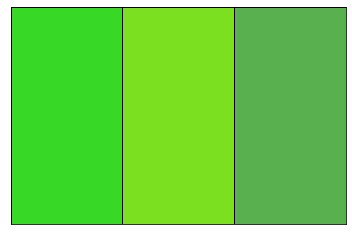

7.1 darker purple (ugly) CLICK: 2 TRGT: 1


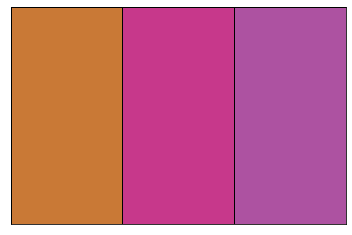

7.2 leaf green (good) CLICK: 1 TRGT: 1


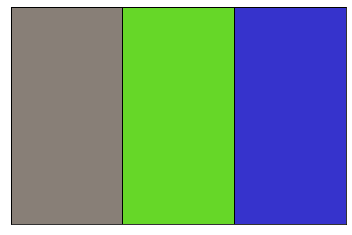

7.3 shadow blue (bad) CLICK: 0 TRGT: 2


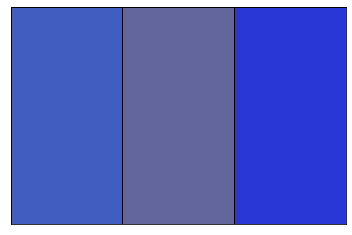

7.4 green (ugly) CLICK: 0 TRGT: 0


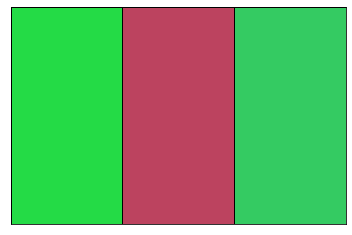

7.5 royal blue (good) CLICK: 2 TRGT: 2


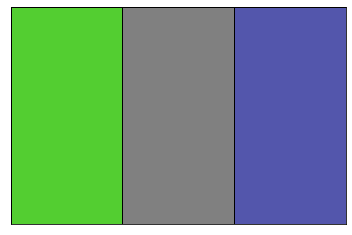

7.6 desaturated (bad) CLICK: 2 TRGT: 2


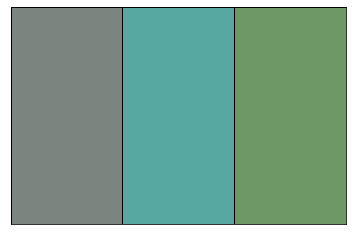

7.7 bright green (ugly) CLICK: 1 TRGT: 2


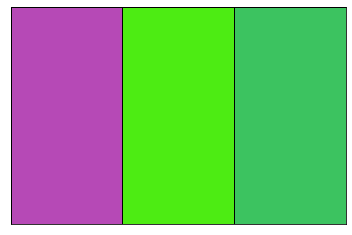

7.8 bright red (good) CLICK: 2 TRGT: 2


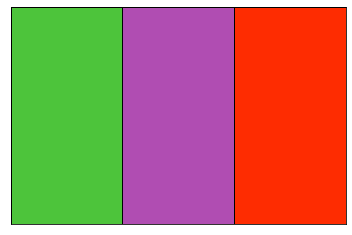

7.9 green (bad) CLICK: 2 TRGT: 1


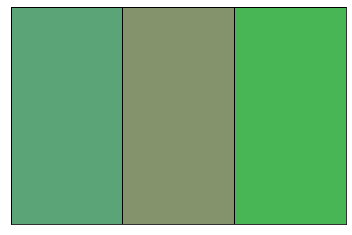

8.0 darkest green (ugly) CLICK: 0 TRGT: 2


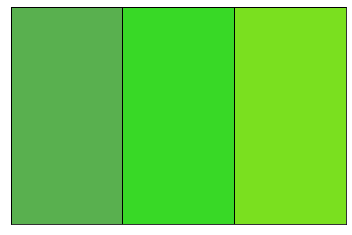

8.1 rose pink (good) CLICK: 1 TRGT: 1


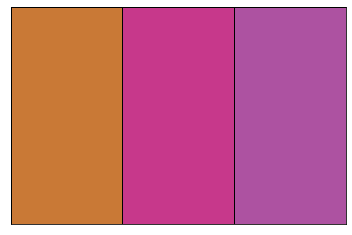

8.2 ocean green (bad) CLICK: 1 TRGT: 1


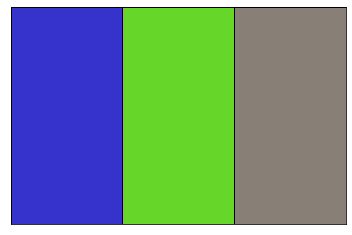

8.3 middle shade of blue (ugly) CLICK: 1 TRGT: 0


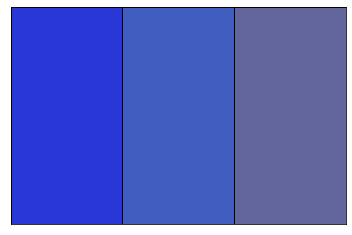

8.4 emerald green (good) CLICK: 0 TRGT: 2


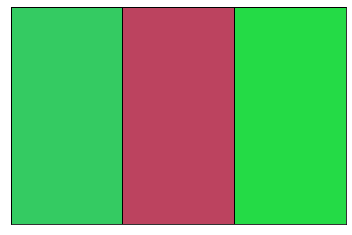

8.5 dark (bad) CLICK: 0 TRGT: 2


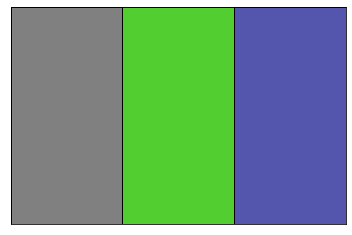

8.6 blue, not green or grey (ugly) CLICK: 0 TRGT: 2


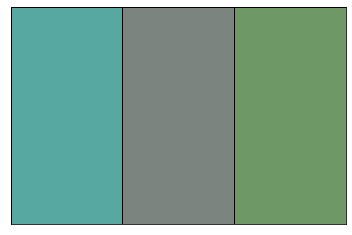

8.7 leaf green (good) CLICK: 0 TRGT: 0


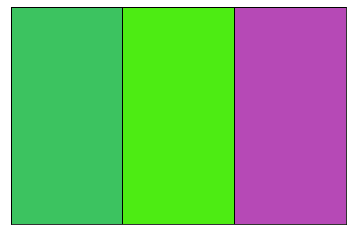

8.8 color in rainbow (bad) CLICK: 1 TRGT: 1


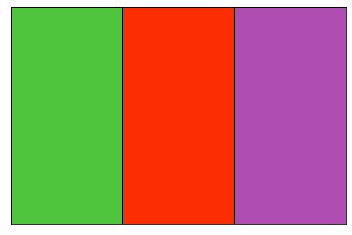

8.9 bright green (ugly) CLICK: 0 TRGT: 2


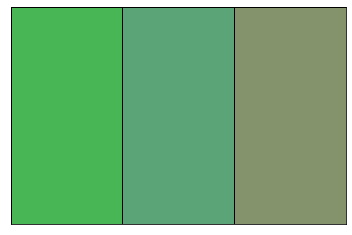

9.0 greenish turquoise (good) CLICK: 2 TRGT: 2


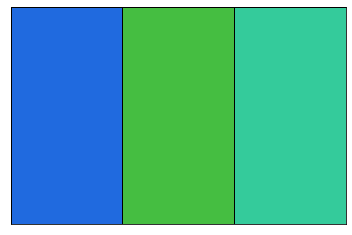

9.1 bright (bad) CLICK: 2 TRGT: 2


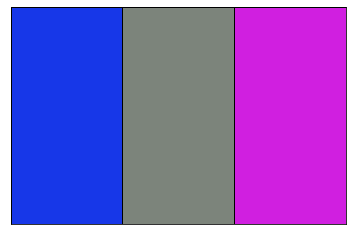

9.2 middle gray (ugly) CLICK: 1 TRGT: 0


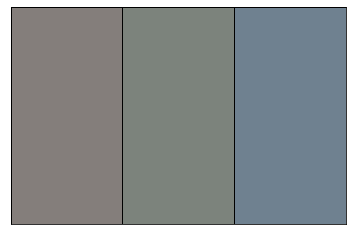

9.3 soft gray (good) CLICK: 1 TRGT: 1


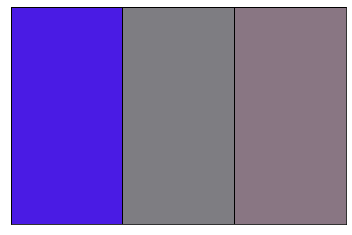

9.4 warm (bad) CLICK: 0 TRGT: 0


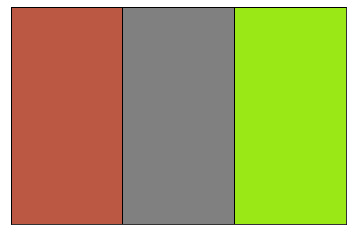

9.5 elephant grey (ugly) CLICK: 0 TRGT: 2


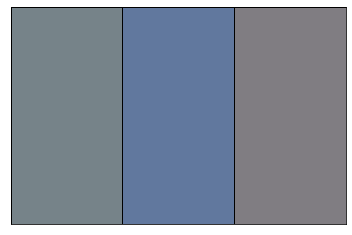

9.6 grayish blue (good) CLICK: 0 TRGT: 0


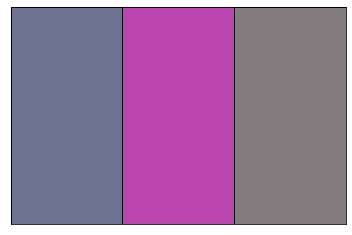

9.7 cool (bad) CLICK: 0 TRGT: 0


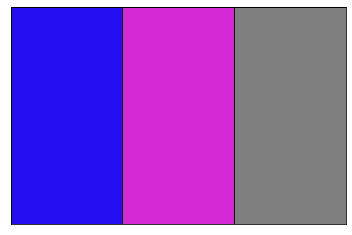

9.8 neon green (ugly) CLICK: 1 TRGT: 1


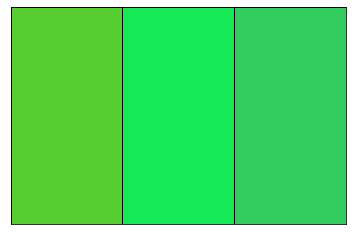

9.9 bright purple/pink (good) CLICK: 0 TRGT: 0


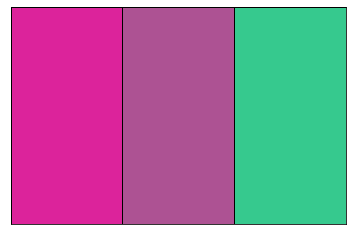

10.0 green (bad) CLICK: 0 TRGT: 1


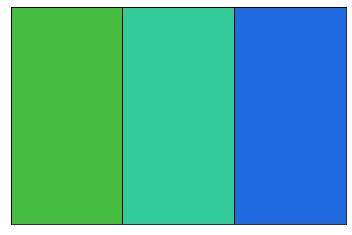

10.1 blue (ugly) CLICK: 2 TRGT: 0


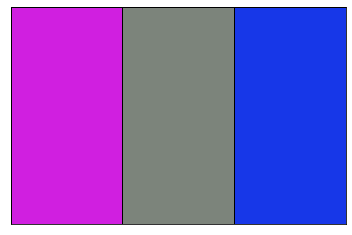

10.2 soft light brown (good) CLICK: 1 TRGT: 1


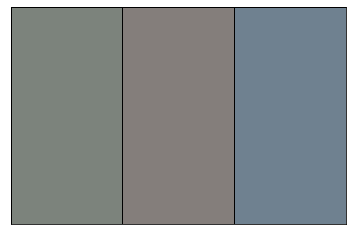

10.3 gray (bad) CLICK: 1 TRGT: 1


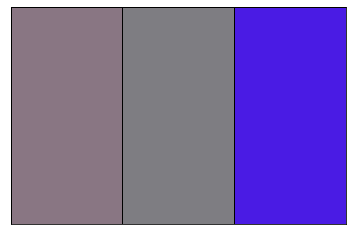

10.4 light green (ugly) CLICK: 1 TRGT: 0


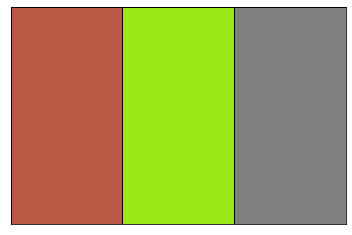

10.5 medium gray (good) CLICK: 1 TRGT: 1


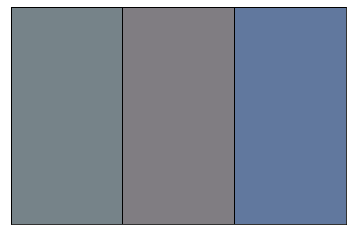

10.6 grey (bad) CLICK: 0 TRGT: 2


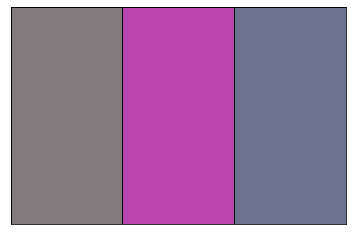

10.7 purple (ugly) CLICK: 1 TRGT: 0


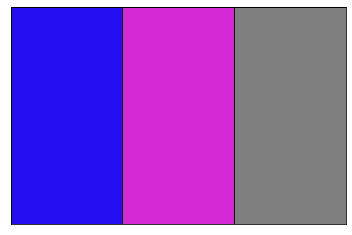

10.8 light green (good) CLICK: 1 TRGT: 1


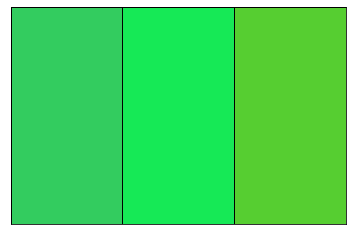

10.9 purple (bad) CLICK: 2 TRGT: 0


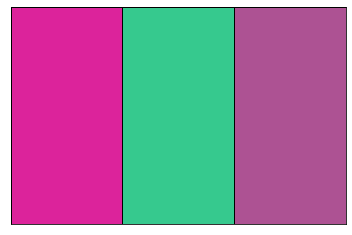

11.0 bright green (ugly) CLICK: 0 TRGT: 2


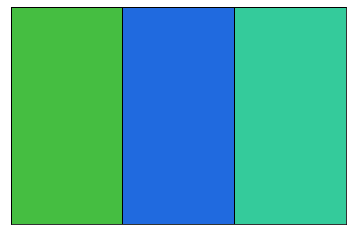

11.1 pink purple (good) CLICK: 2 TRGT: 2


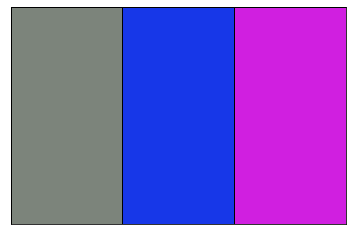

11.2 brown (bad) CLICK: 2 TRGT: 0


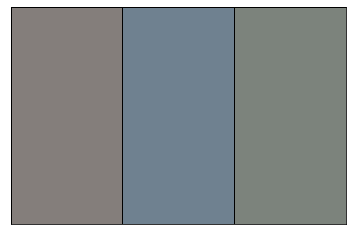

11.3 purple (ugly) CLICK: 2 TRGT: 1


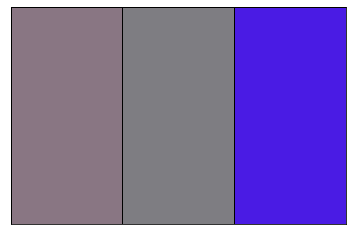

11.4 terra cotta (good) CLICK: 1 TRGT: 1


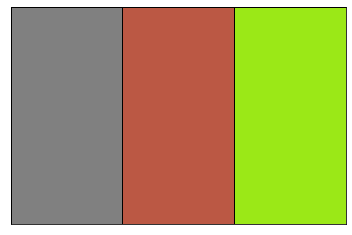

11.5 gray (bad) CLICK: 1 TRGT: 2


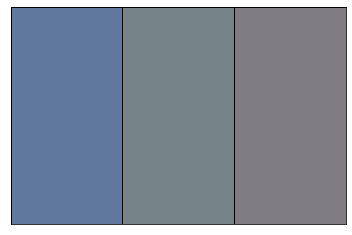

11.6 dark brown/grey (ugly) CLICK: 0 TRGT: 2


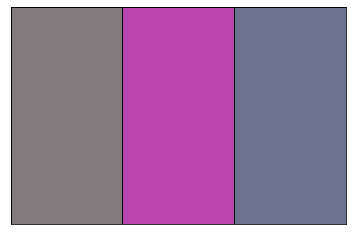

11.7 bright blue (good) CLICK: 1 TRGT: 1


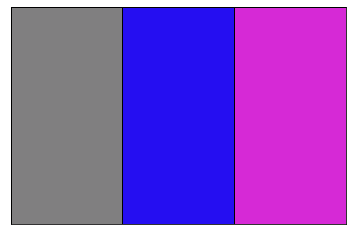

11.8 green (bad) CLICK: 0 TRGT: 0


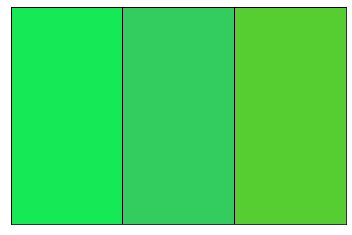

11.9 purple (ugly) CLICK: 0 TRGT: 2


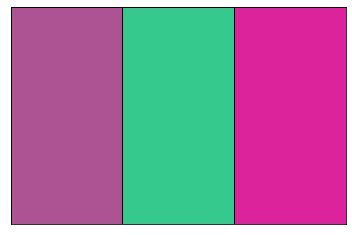

12.0 brighter green (good) CLICK: 2 TRGT: 2


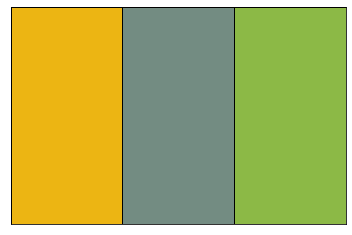

12.1 purple (bad) CLICK: 1 TRGT: 1


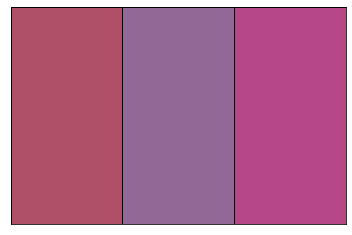

12.2 light green (ugly) CLICK: 2 TRGT: 2


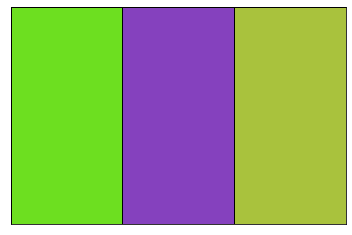

12.3 red (good) CLICK: 1 TRGT: 1


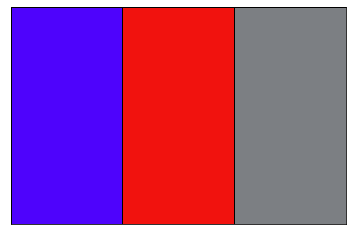

12.4 green (this is ambiguous because it describes the both the light green target and the dark green color.) (bad) CLICK: 1 TRGT: 0


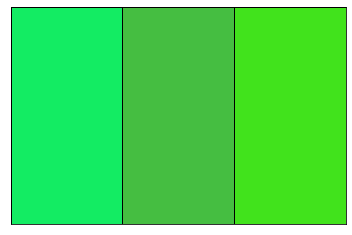

12.5 hot pink (ugly) CLICK: 1 TRGT: 0


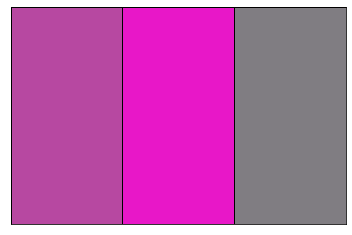

12.6 green (good) CLICK: 2 TRGT: 2


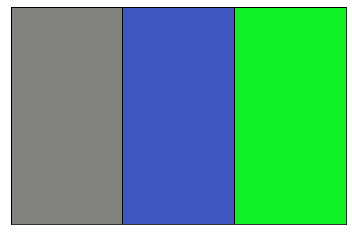

12.7 green (this is ambiguous because it describes the both the light green target and the dark green color.) (bad) CLICK: 0 TRGT: 2


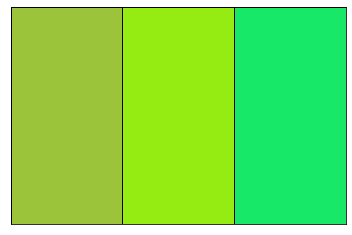

12.8 silver (ugly) CLICK: 2 TRGT: 0


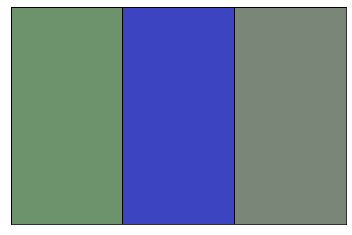

12.9 btight green (good) CLICK: 2 TRGT: 2


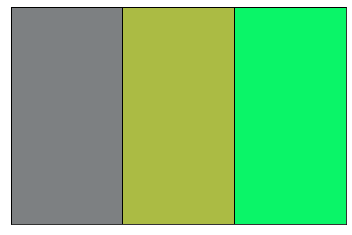

13.0 green (bad) CLICK: 0 TRGT: 0


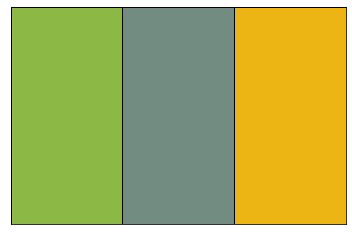

13.1 pink (ugly) CLICK: 1 TRGT: 2


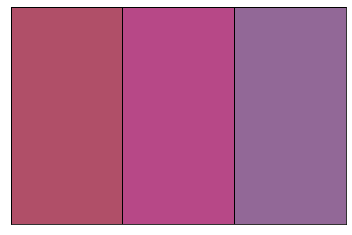

13.2 darker green (good) CLICK: 1 TRGT: 1


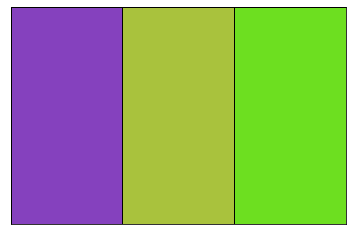

13.3 bright (bad) CLICK: 0 TRGT: 0


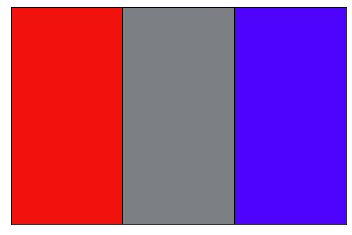

13.4 mild green (ugly) CLICK: 2 TRGT: 0


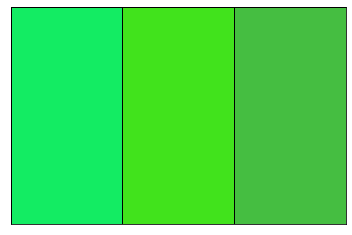

13.5 pink (good) CLICK: 2 TRGT: 0


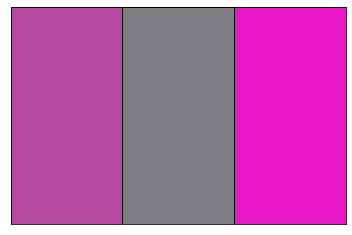

13.6 light green (bad) CLICK: 0 TRGT: 0


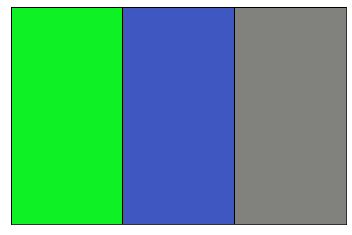

13.7 sandy bland yellow (ugly) CLICK: 2 TRGT: 0


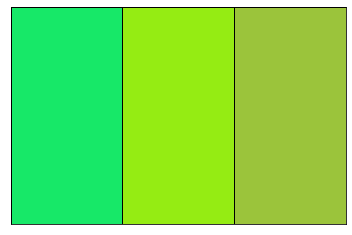

13.8 greenish grey (good) CLICK: 1 TRGT: 0


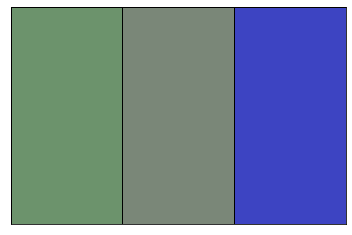

13.9 green (bad) CLICK: 2 TRGT: 2


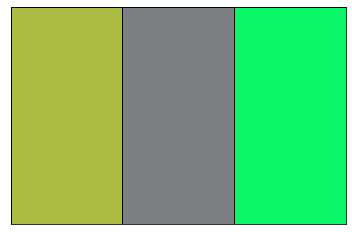

14.0 orange (ugly) CLICK: 0 TRGT: 1


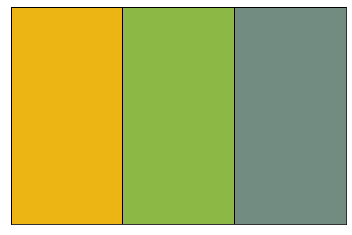

14.1 more purple than pink or red (good) CLICK: 1 TRGT: 0


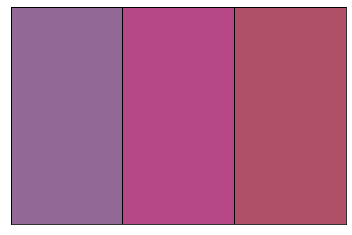

14.2 green (bad) CLICK: 1 TRGT: 0


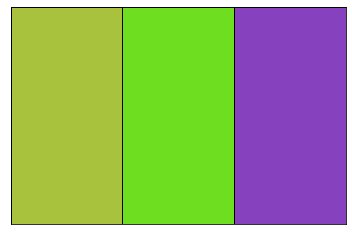

14.3 grey (ugly) CLICK: 1 TRGT: 0


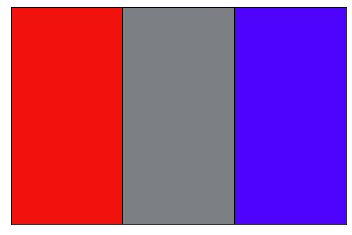

14.4 medium green (good) CLICK: 2 TRGT: 2


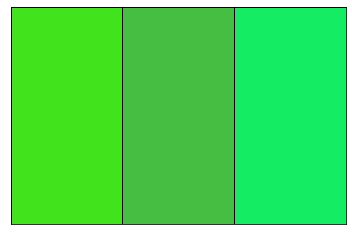

14.5 pink (this is ambiguous because it describes the both the light pink target and the dark pink color.) (bad) CLICK: 2 TRGT: 1


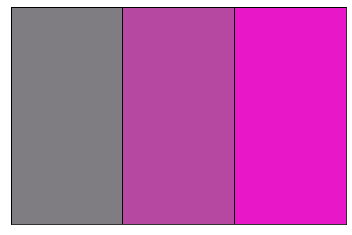

14.6 blue (ugly) CLICK: 1 TRGT: 2


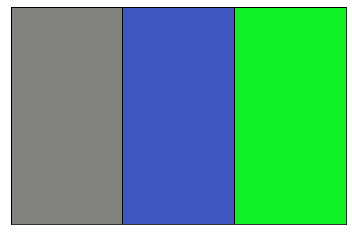

14.7 dark green (good) CLICK: 0 TRGT: 1


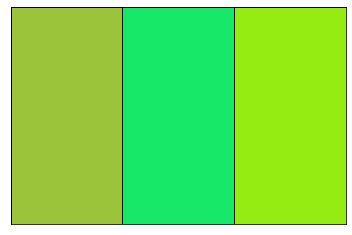

14.8 grey (this is ambiguous because it describes the both the light grey target and the dark grey color.) (bad) CLICK: 2 TRGT: 1


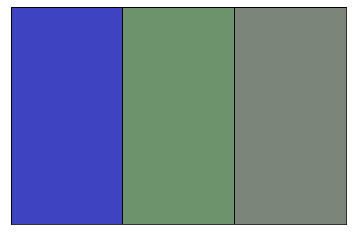

14.9 gray (ugly) CLICK: 0 TRGT: 1


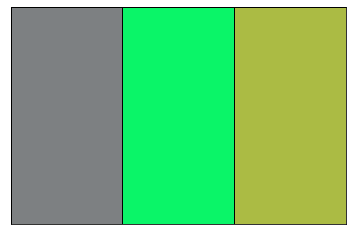

15.0 darkest green (good) CLICK: 1 TRGT: 1


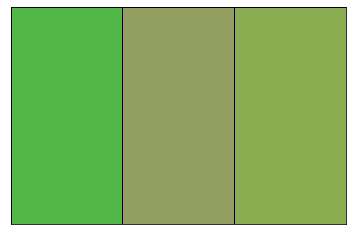

15.1 green (bad) CLICK: 1 TRGT: 2


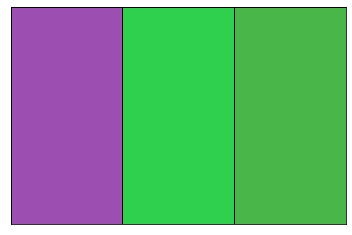

15.2 blue (ugly) CLICK: 2 TRGT: 0


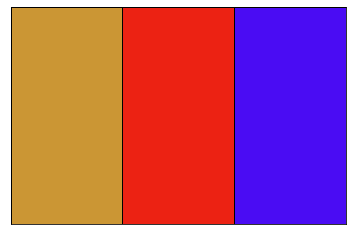

15.3 lime yellow (good) CLICK: 0 TRGT: 0


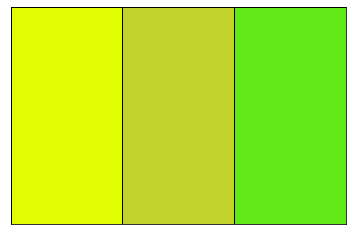

15.4 shade of blue (bad) CLICK: 0 TRGT: 2


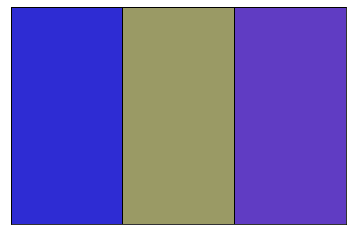

15.5 faded orange (ugly) CLICK: 0 TRGT: 1


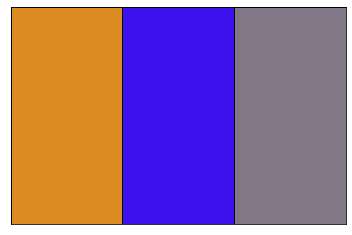

15.6 dark grey (good) CLICK: 2 TRGT: 2


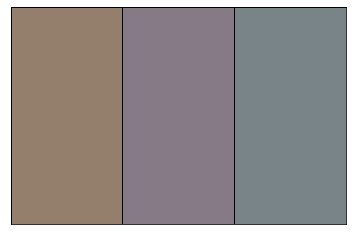

15.7 vivid color (bad) CLICK: 1 TRGT: 0


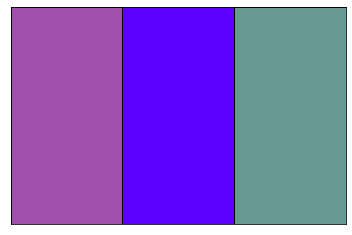

15.8 bright magenta (ugly) CLICK: 2 TRGT: 1


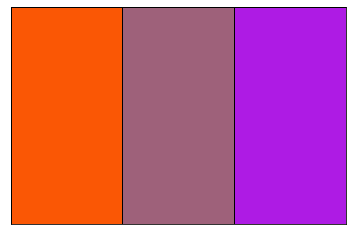

15.9 plum color (good) CLICK: 2 TRGT: 2


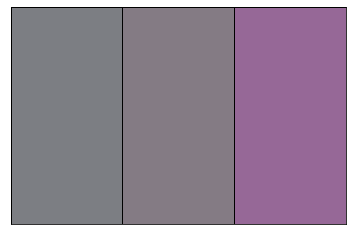

16.0 green (bad) CLICK: 0 TRGT: 1


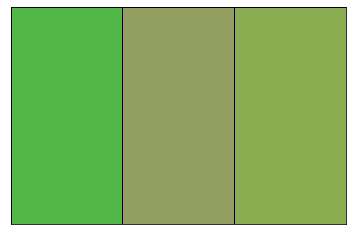

16.1 light green (ugly) CLICK: 2 TRGT: 0


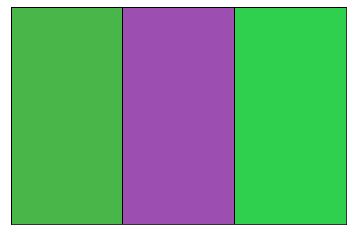

16.2 yellow (good) CLICK: 2 TRGT: 2


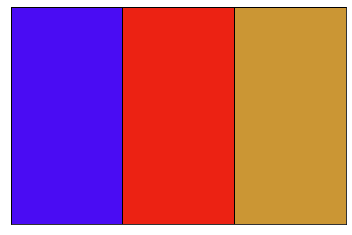

16.3 lime (bad) CLICK: 0 TRGT: 2


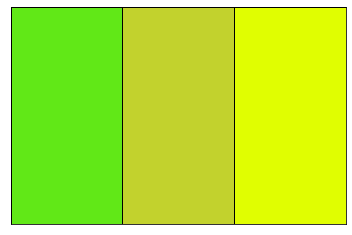

16.4 dark blue (ugly) CLICK: 2 TRGT: 0


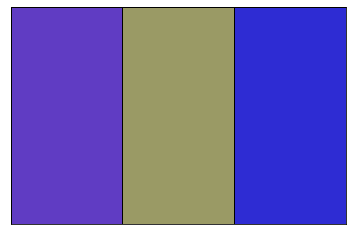

16.5 dark blue (good) CLICK: 1 TRGT: 1


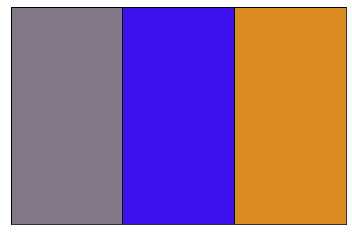

16.6 shade of grey (bad) CLICK: 0 TRGT: 2


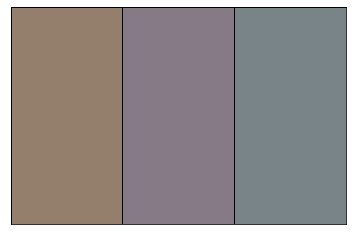

16.7 vibrate blue/purple (ugly) CLICK: 1 TRGT: 2


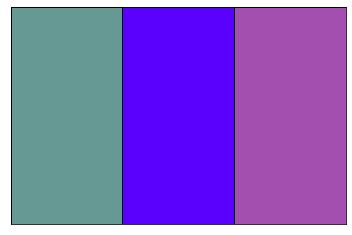

16.8 a very dark pink (good) CLICK: 2 TRGT: 2


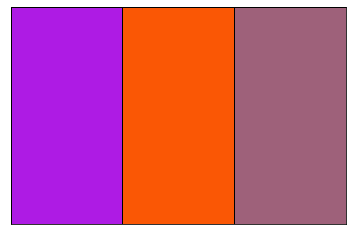

16.9 purple (bad) CLICK: 0 TRGT: 0


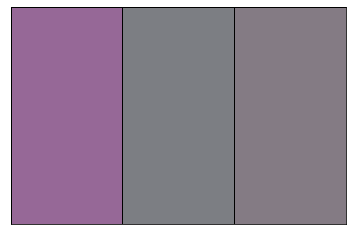

17.0 olive green (ugly) CLICK: 1 TRGT: 2


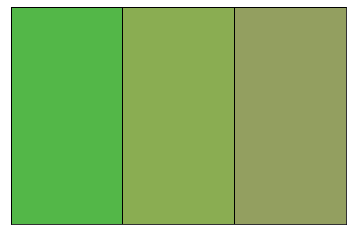

17.1 deeper green (good) CLICK: 2 TRGT: 2


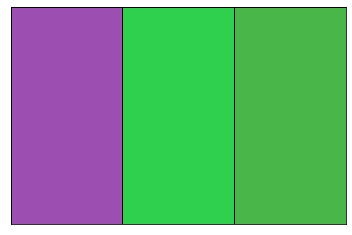

17.2 warm (bad) CLICK: 0 TRGT: 0


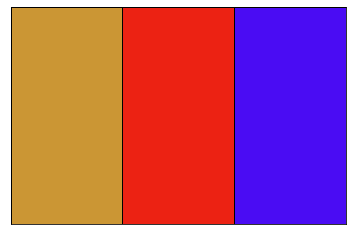

17.3 light green (ugly) CLICK: 0 TRGT: 1


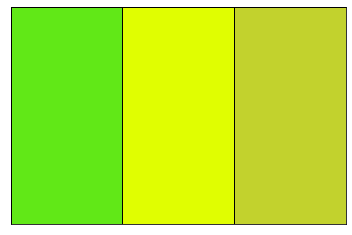

17.4 violet (good) CLICK: 0 TRGT: 0


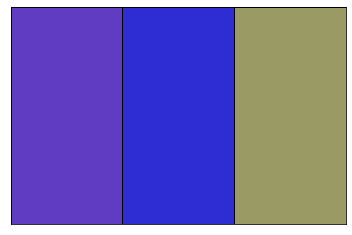

17.5 vivid color (bad) CLICK: 0 TRGT: 0


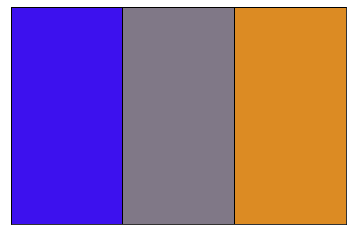

17.6 bland beige (ugly) CLICK: 2 TRGT: 0


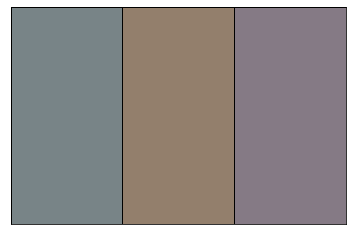

17.7 violet (good) CLICK: 0 TRGT: 0


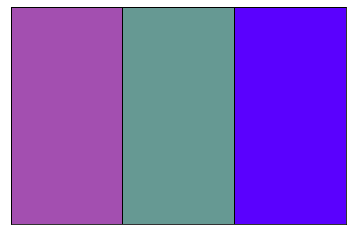

17.8 dark shade of pink / orange (bad) CLICK: 1 TRGT: 0


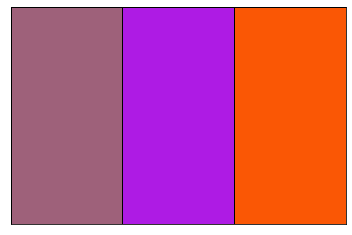

17.9 dark grey (ugly) CLICK: 1 TRGT: 0


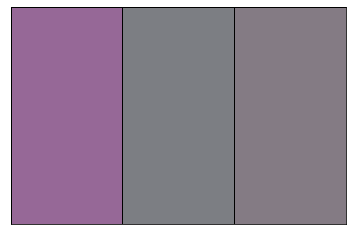

18.0 lighter than black (good) CLICK: 0 TRGT: 1


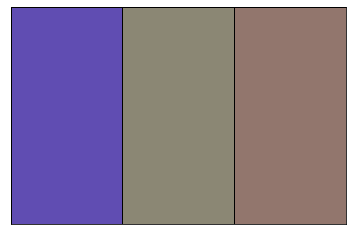

18.1 orange (bad) CLICK: 1 TRGT: 1


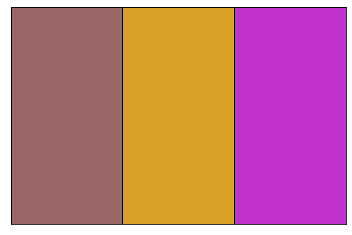

18.2 brown (ugly) CLICK: 2 TRGT: 0


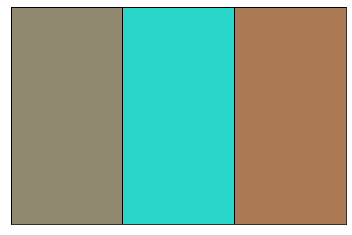

18.3 green (good) CLICK: 1 TRGT: 1


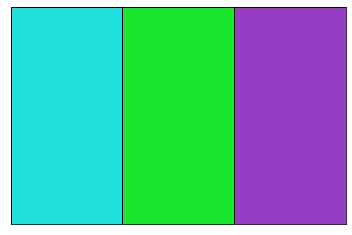

18.4 green (bad) CLICK: 2 TRGT: 1


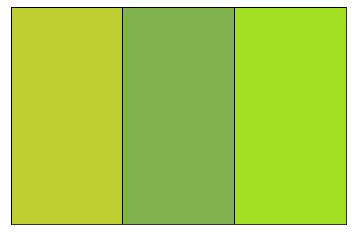

18.5 gray (ugly) CLICK: 2 TRGT: 0


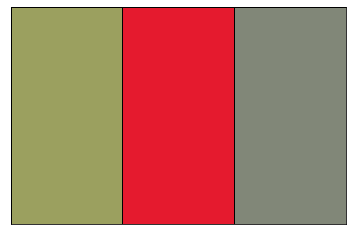

18.6 light green (good) CLICK: 0 TRGT: 0


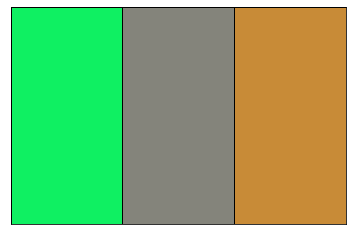

18.7 redish pink (bad) CLICK: 1 TRGT: 0


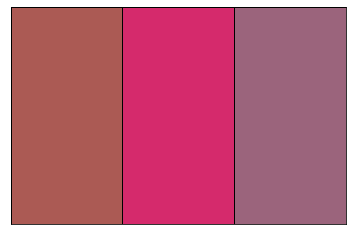

18.8 blue green (ugly) CLICK: 1 TRGT: 1


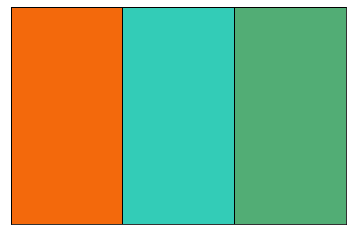

18.9 lemon green (good) CLICK: 2 TRGT: 2


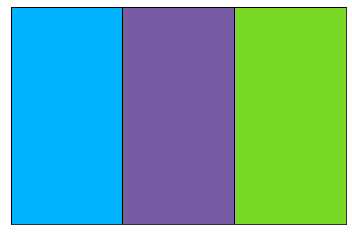

19.0 gray (bad) CLICK: 0 TRGT: 0


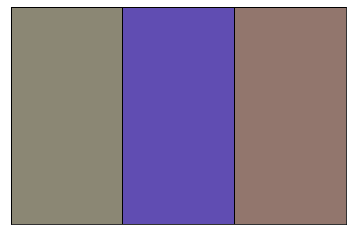

19.1 light pink (ugly) CLICK: 0 TRGT: 1


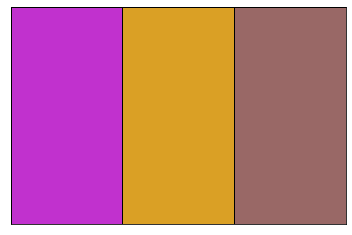

19.2 light brown (good) CLICK: 0 TRGT: 2


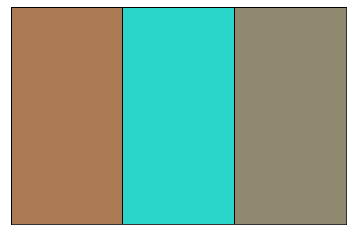

19.3 light color (bad) CLICK: 1 TRGT: 2


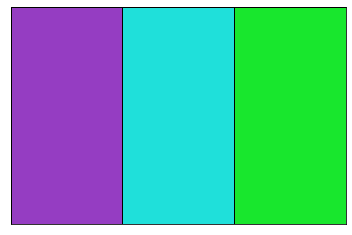

19.4 bright green (ugly) CLICK: 1 TRGT: 0


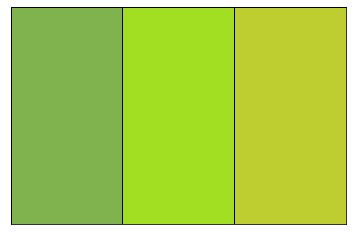

19.5 dark green (good) CLICK: 1 TRGT: 1


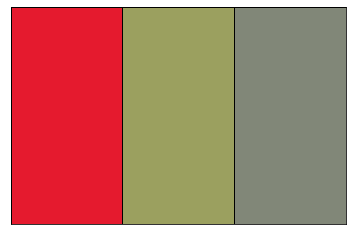

19.6 light color (bad) CLICK: 1 TRGT: 1


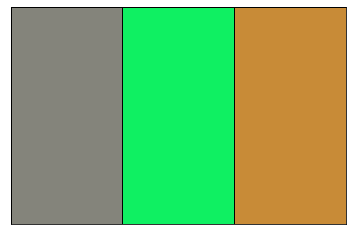

19.7 dark pink (ugly) CLICK: 0 TRGT: 0


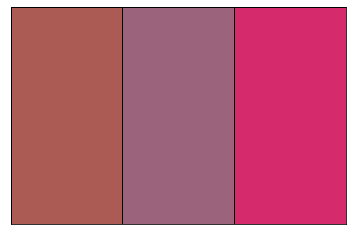

19.8 light blue (good) CLICK: 0 TRGT: 0


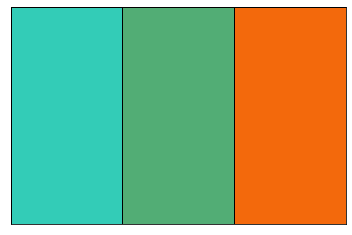

19.9 lemon (bad) CLICK: 1 TRGT: 1


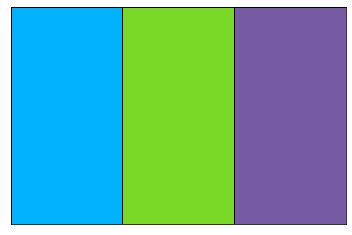

20.0 light grey (ugly) CLICK: 2 TRGT: 2


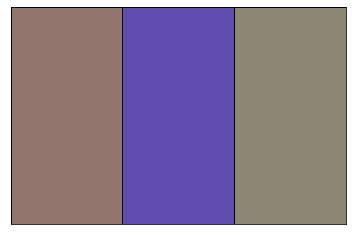

20.1 subdued orange (good) CLICK: 0 TRGT: 0


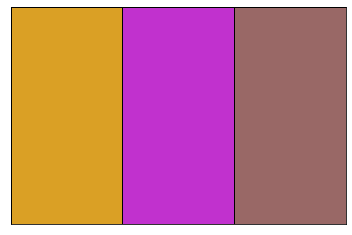

20.2 tanish (bad) CLICK: 0 TRGT: 0


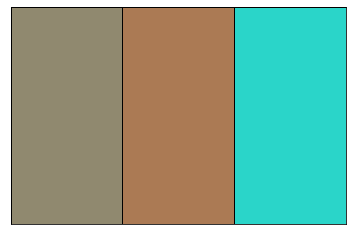

20.3 purple (ugly) CLICK: 1 TRGT: 0


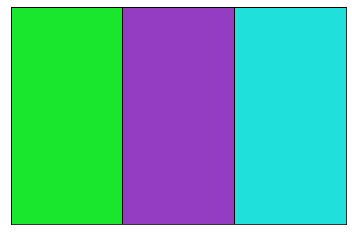

20.4 forest green (good) CLICK: 1 TRGT: 1


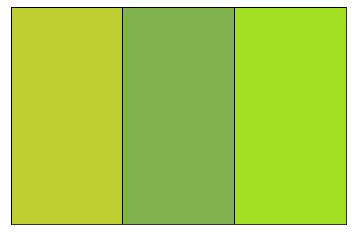

20.5 greyish (bad) CLICK: 0 TRGT: 2


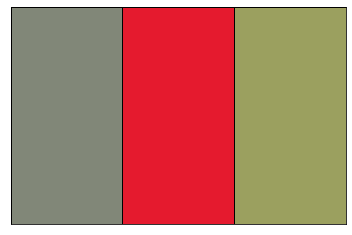

20.6 gray (ugly) CLICK: 2 TRGT: 0


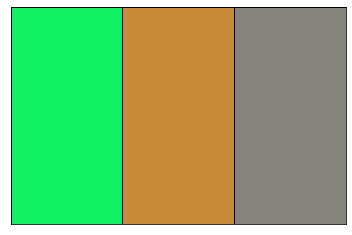

20.7 dark pink (good) CLICK: 2 TRGT: 0


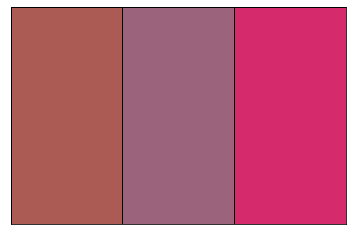

20.8 bright (bad) CLICK: 0 TRGT: 0


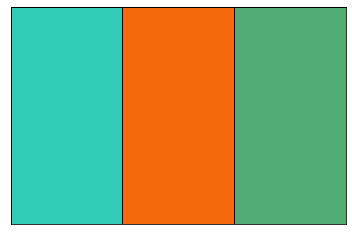

20.9 light blue (ugly) CLICK: 2 TRGT: 1


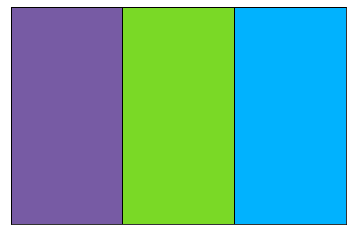

21.0 light purple (good) CLICK: 0 TRGT: 0


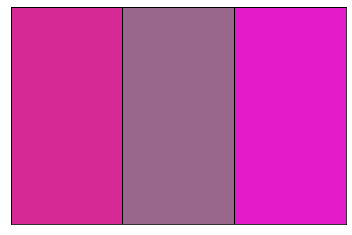

21.1 green (bad) CLICK: 0 TRGT: 2


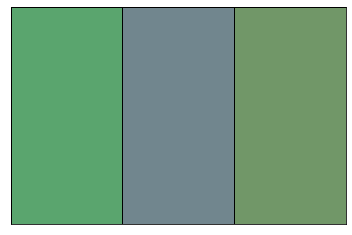

21.2 vibrant pink (ugly) CLICK: 0 TRGT: 1


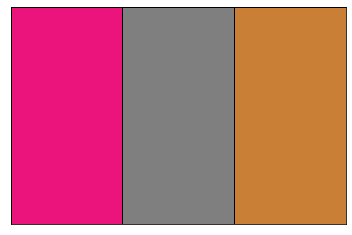

21.3 brown (good) CLICK: 0 TRGT: 0


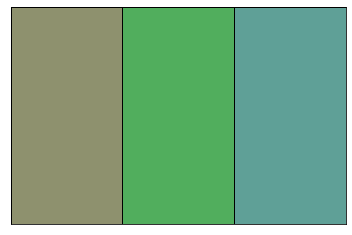

21.4 purple (bad) CLICK: 1 TRGT: 1


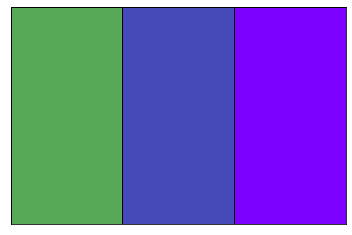

21.5 green (ugly) CLICK: 1 TRGT: 2


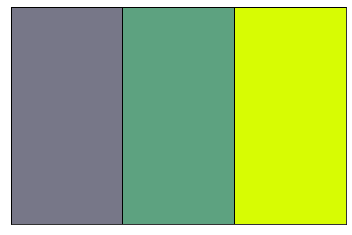

21.6 dark yellow (good) CLICK: 1 TRGT: 1


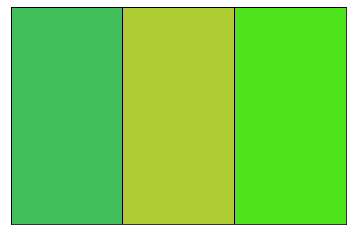

21.7 purple (bad) CLICK: 1 TRGT: 1


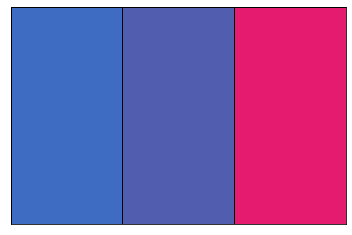

21.8 dark tan (ugly) CLICK: 0 TRGT: 2


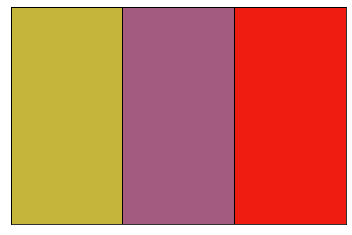

21.9 periwinkle (good) CLICK: 1 TRGT: 0


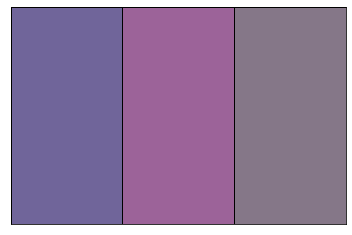

22.0 purple (bad) CLICK: 0 TRGT: 1


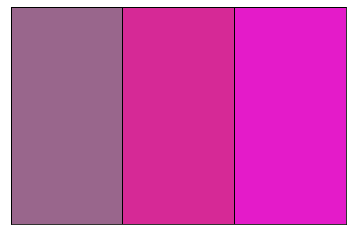

22.1 light green (ugly) CLICK: 0 TRGT: 2


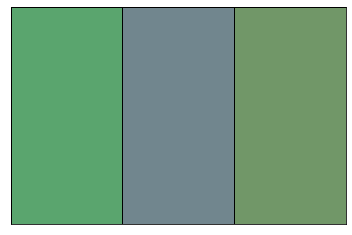

22.2 gray (good) CLICK: 1 TRGT: 1


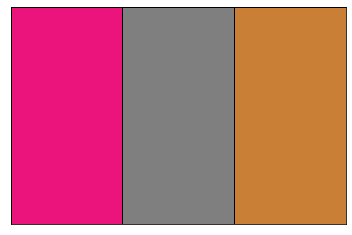

22.3 blue (bad) CLICK: 1 TRGT: 2


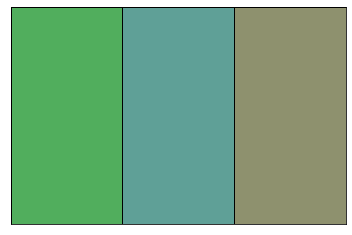

22.4 blueviolet (ugly) CLICK: 2 TRGT: 2


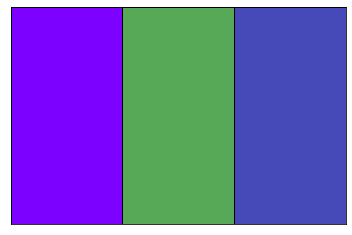

22.5 greeen (good) CLICK: 2 TRGT: 1


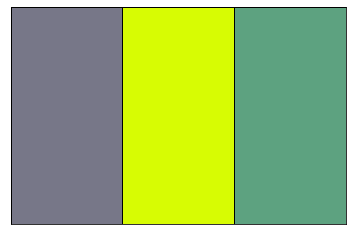

22.6 dull (bad) CLICK: 2 TRGT: 2


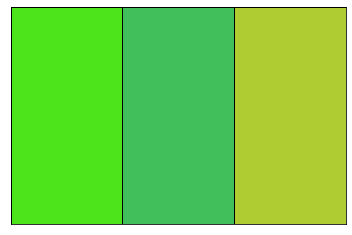

22.7 blue (ugly) CLICK: 0 TRGT: 2


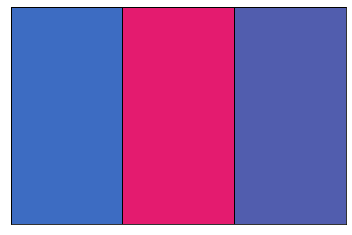

22.8 solid red (good) CLICK: 0 TRGT: 0


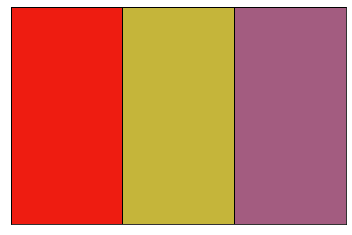

22.9 purple (bad) CLICK: 2 TRGT: 2


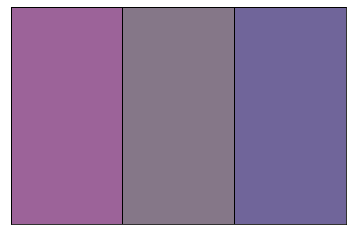

23.0 bright purple (ugly) CLICK: 0 TRGT: 2


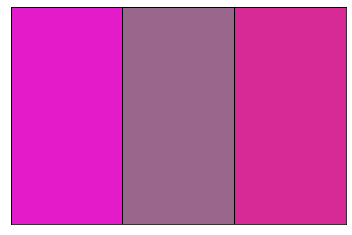

23.1 tan green (good) CLICK: 2 TRGT: 2


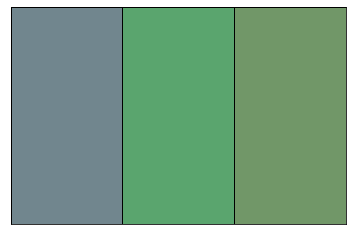

23.2 neutral (bad) CLICK: 0 TRGT: 0


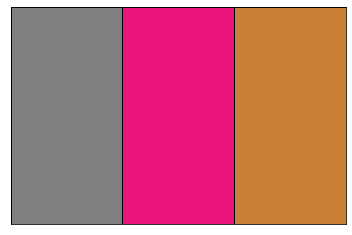

23.3 teal (ugly) CLICK: 0 TRGT: 1


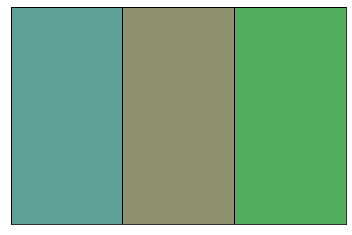

23.4 bluer purple (good) CLICK: 0 TRGT: 0


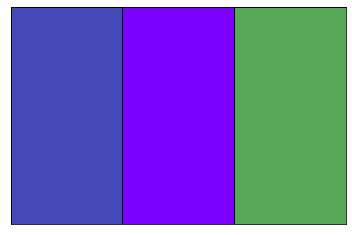

23.5 gren (bad) CLICK: 2 TRGT: 1


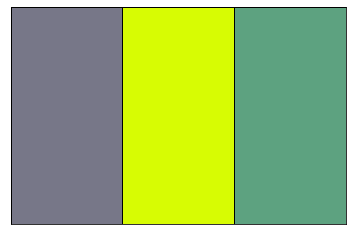

23.6 limegreen (ugly) CLICK: 1 TRGT: 0


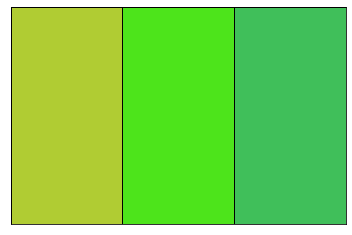

23.7 dark purple (good) CLICK: 2 TRGT: 2


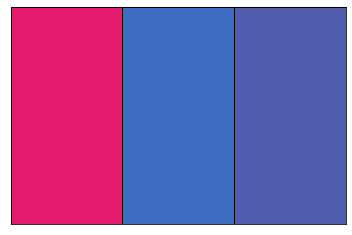

23.8 bright (bad) CLICK: 2 TRGT: 2


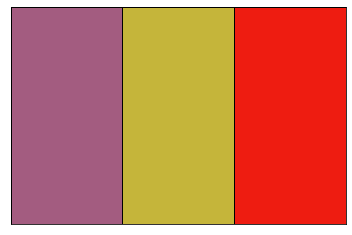

23.9 dark blue (ugly) CLICK: 1 TRGT: 1


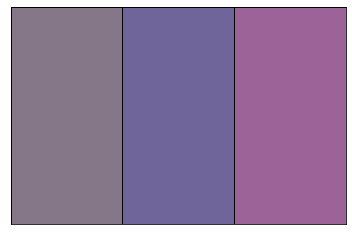

24.0 sage green (good) CLICK: 1 TRGT: 2


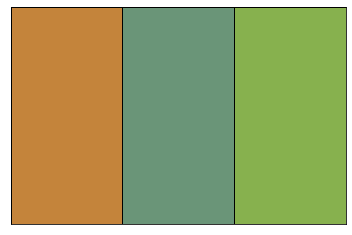

24.1 orange (bad) CLICK: 1 TRGT: 1


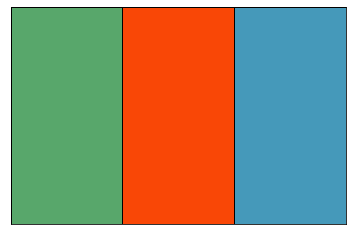

24.2 deep purple (ugly) CLICK: 0 TRGT: 2


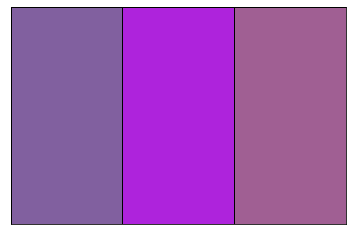

24.3 aquamarine (good) CLICK: 0 TRGT: 0


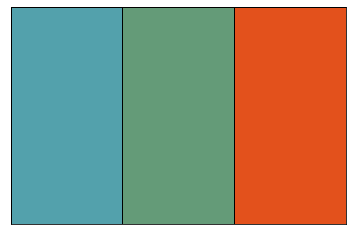

24.4 purple (bad) CLICK: 2 TRGT: 1


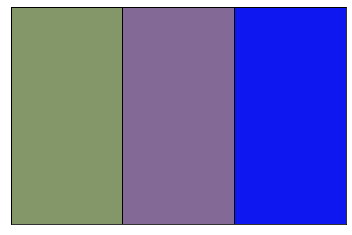

24.5 khakki (ugly) CLICK: 1 TRGT: 0


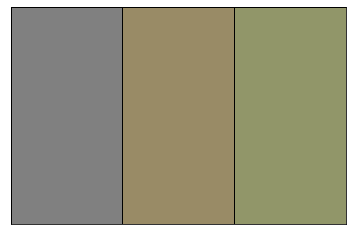

24.6 grey-green (good) CLICK: 2 TRGT: 2


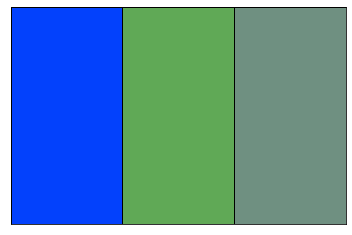

24.7 blue (bad) CLICK: 1 TRGT: 1


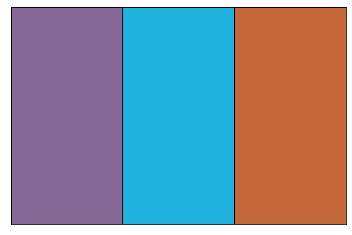

24.8 dark violet (ugly) CLICK: 0 TRGT: 1


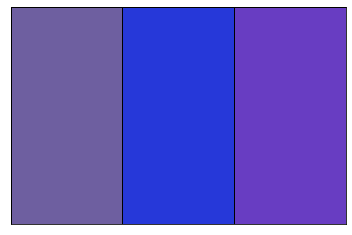

24.9 pale blue (good) CLICK: 0 TRGT: 0


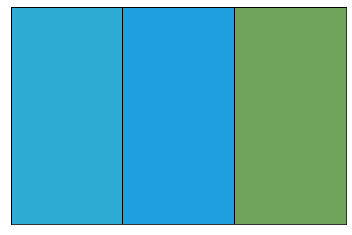

25.0 green (bad) CLICK: 1 TRGT: 1


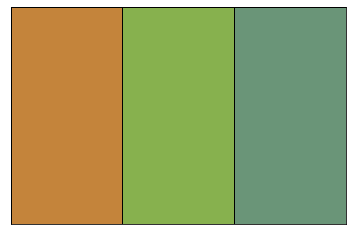

25.1 medium blue (ugly) CLICK: 1 TRGT: 0


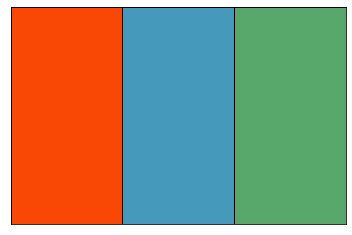

25.2 muted purple (good) CLICK: 1 TRGT: 2


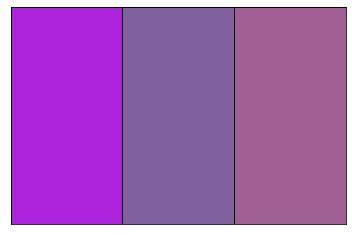

25.3 blue (bad) CLICK: 0 TRGT: 0


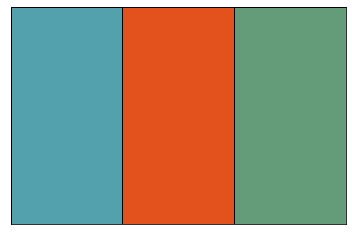

25.4 dark blue (ugly) CLICK: 2 TRGT: 1


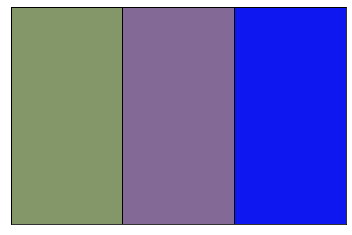

25.5 gray (good) CLICK: 1 TRGT: 1


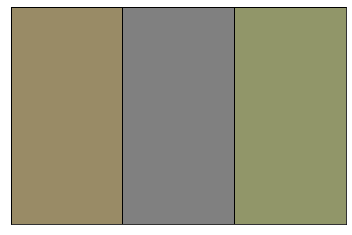

25.6 green (bad) CLICK: 0 TRGT: 2


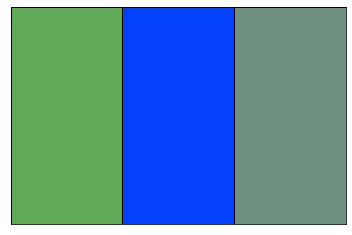

25.7 purple (ugly) CLICK: 0 TRGT: 2


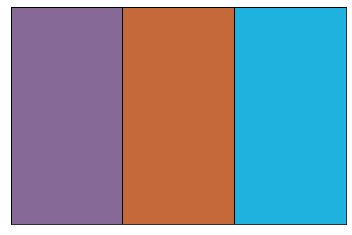

25.8 dark blue (good) CLICK: 1 TRGT: 1


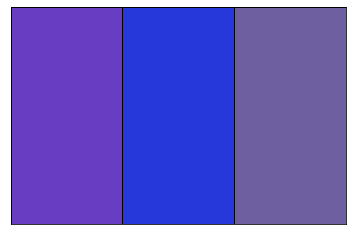

25.9 blue (bad) CLICK: 1 TRGT: 0


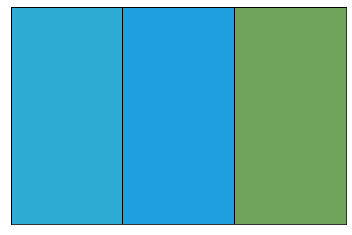

26.0 blue green (ugly) CLICK: 2 TRGT: 1


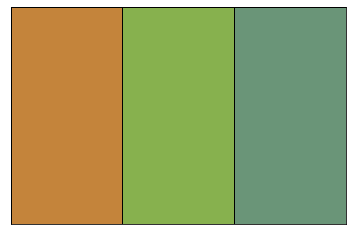

26.1 bright orange (good) CLICK: 0 TRGT: 0


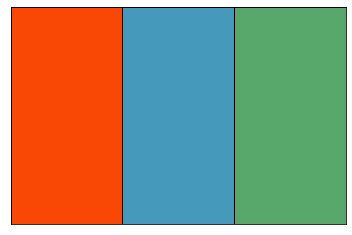

26.2 purple (bad) CLICK: 1 TRGT: 0


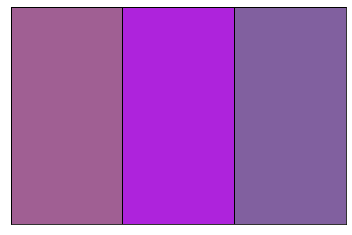

26.3 light green (ugly) CLICK: 2 TRGT: 1


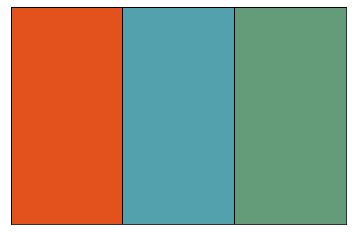

26.4 eggplant (good) CLICK: 1 TRGT: 1


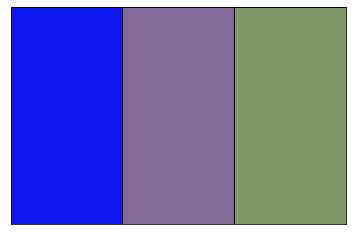

26.5 earthy (bad) CLICK: 0 TRGT: 2


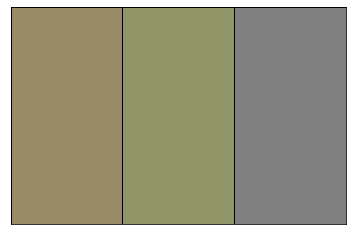

26.6 dark green (ugly) CLICK: 1 TRGT: 1


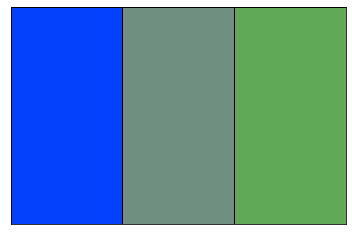

26.7 light blue (good) CLICK: 0 TRGT: 0


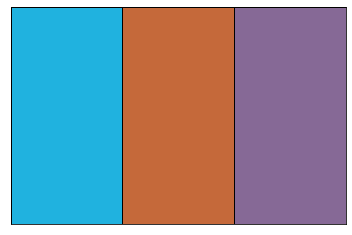

26.8 purple (bad) CLICK: 2 TRGT: 0


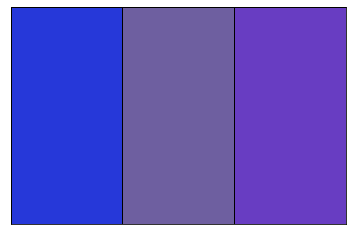

26.9 sky blue (ugly) CLICK: 1 TRGT: 1


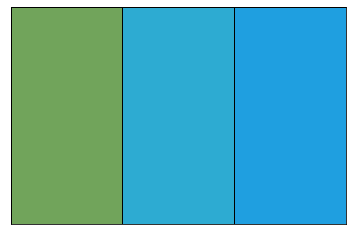

27.0 pink (good) CLICK: 1 TRGT: 2


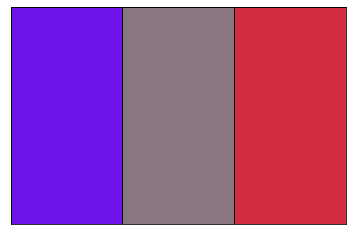

27.1 gray (bad) CLICK: 1 TRGT: 0


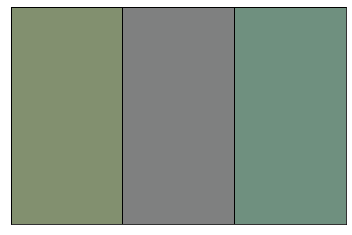

27.2 brown (ugly) CLICK: 1 TRGT: 2


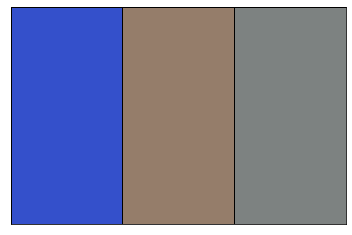

27.3 brown (good) CLICK: 2 TRGT: 2


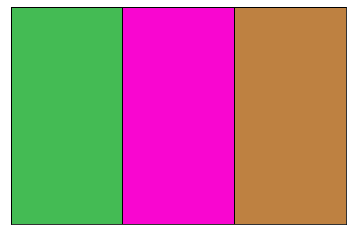

27.4 purple (bad) CLICK: 2 TRGT: 2


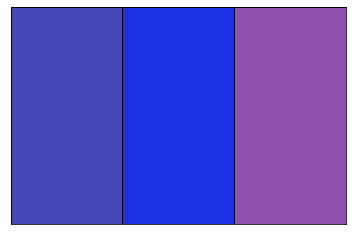

27.5 dark green (ugly) CLICK: 2 TRGT: 1


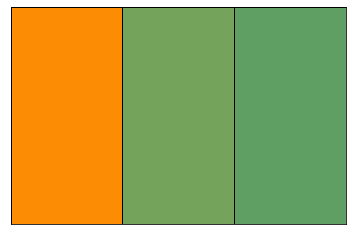

27.6 purple (good) CLICK: 1 TRGT: 1


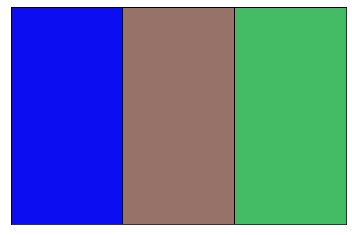

27.7 green (bad) CLICK: 1 TRGT: 0


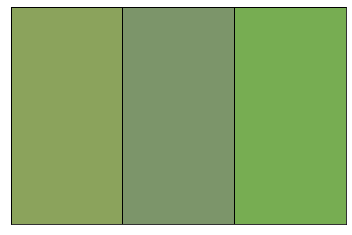

27.8 dark pink (ugly) CLICK: 2 TRGT: 2


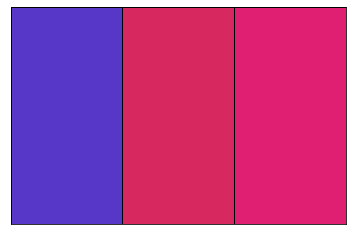

27.9 hot pink (good) CLICK: 2 TRGT: 2


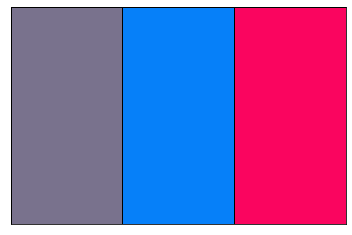

28.0 reddish (bad) CLICK: 0 TRGT: 0


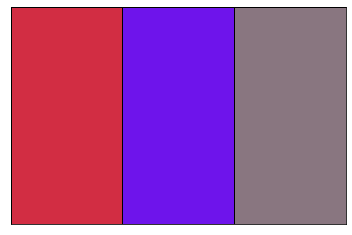

28.1 dark gray (ugly) CLICK: 1 TRGT: 2


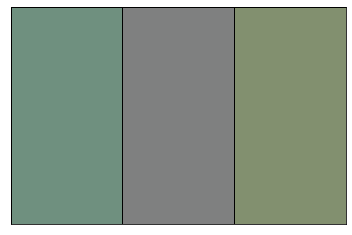

28.2 grey (good) CLICK: 1 TRGT: 1


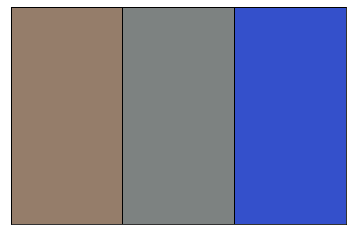

28.3 a shade of red (bad) CLICK: 0 TRGT: 1


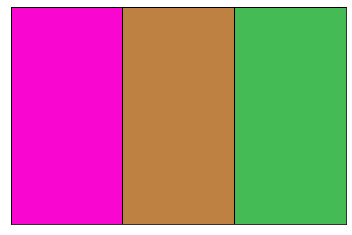

28.4 dark blue (ugly) CLICK: 1 TRGT: 2


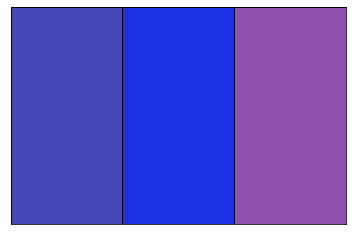

28.5 puke green (good) CLICK: 2 TRGT: 0


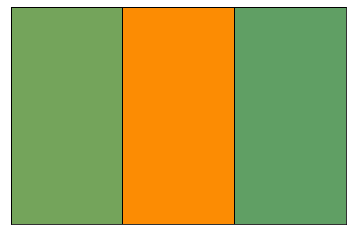

28.6 cool (bad) CLICK: 1 TRGT: 2


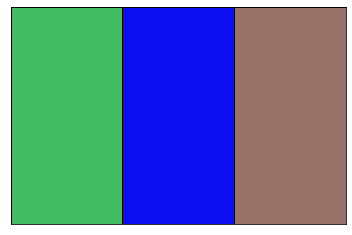

28.7 leaf green (ugly) CLICK: 0 TRGT: 1


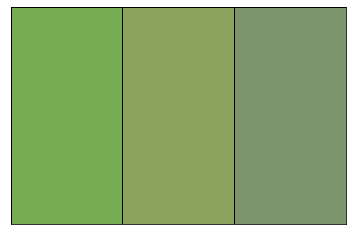

28.8 the more vivid shade of violet (good) CLICK: 0 TRGT: 2


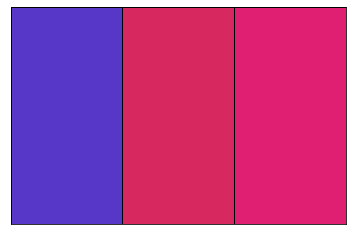

28.9 red (bad) CLICK: 2 TRGT: 2


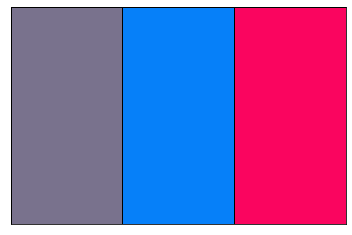

29.0 brown (ugly) CLICK: 0 TRGT: 2


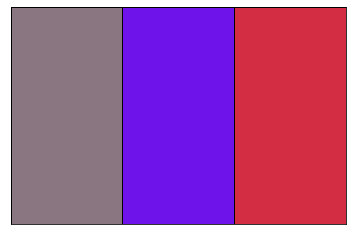

29.1 brown (good) CLICK: 0 TRGT: 2


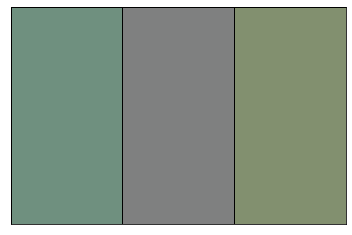

29.2 dark (bad) CLICK: 1 TRGT: 2


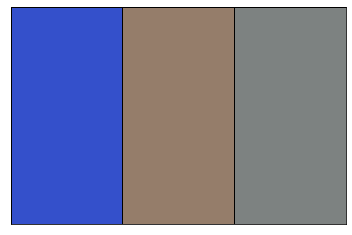

29.3 green (ugly) CLICK: 1 TRGT: 0


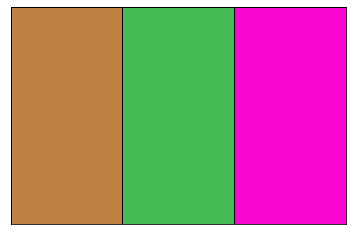

29.4 dark purple (good) CLICK: 2 TRGT: 0


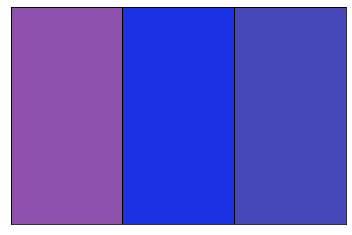

29.5 green (bad) CLICK: 0 TRGT: 2


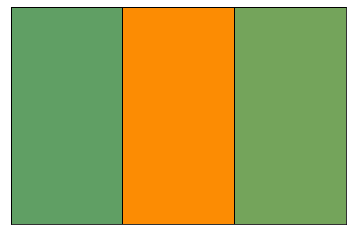

29.6 royal blue (ugly) CLICK: 0 TRGT: 2


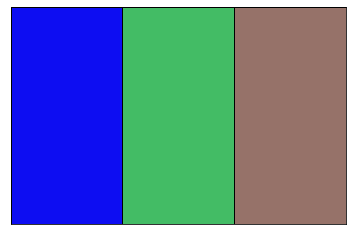

29.7 light green (good) CLICK: 0 TRGT: 2


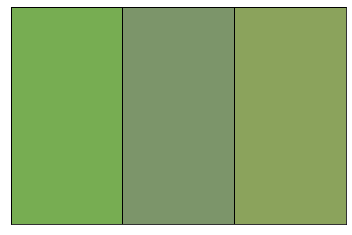

29.8 violet (bad) CLICK: 2 TRGT: 1


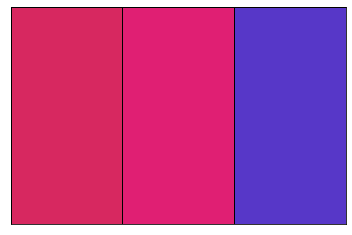

29.9 gray (ugly) CLICK: 2 TRGT: 1


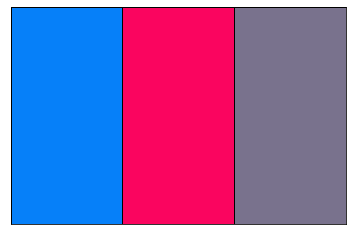

30.0 neon green (good) CLICK: 0 TRGT: 1


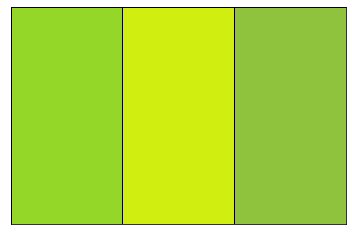

30.1 pale (bad) CLICK: 1 TRGT: 1


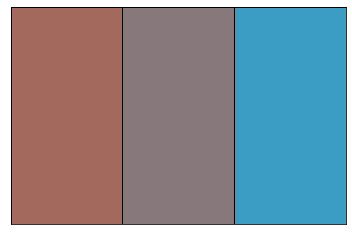

30.2 green (ugly) CLICK: 2 TRGT: 1


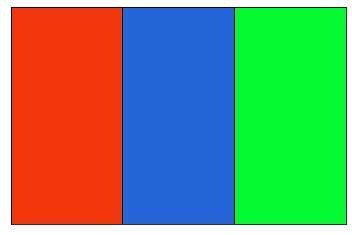

30.3 light grey (good) CLICK: 2 TRGT: 2


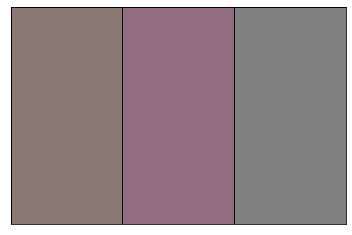

30.4 blue (bad) CLICK: 2 TRGT: 2


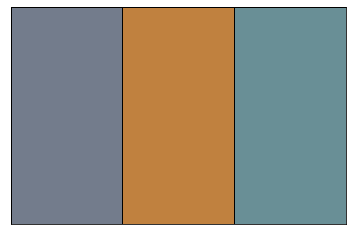

30.5 brown (ugly) CLICK: 0 TRGT: 2


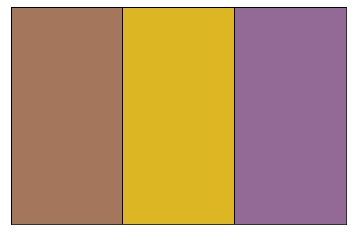

30.6 light gray (good) CLICK: 0 TRGT: 0


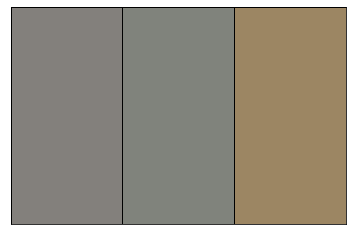

30.7 reddish (bad) CLICK: 1 TRGT: 0


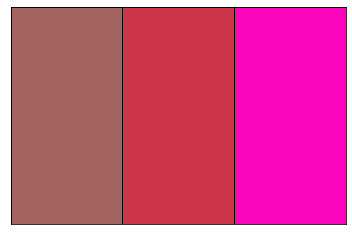

30.8 brown (ugly) CLICK: 0 TRGT: 1


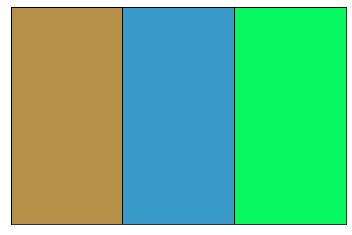

30.9 saturated green (good) CLICK: 2 TRGT: 2


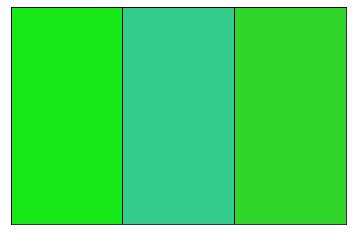

31.0 green (bad) CLICK: 0 TRGT: 1


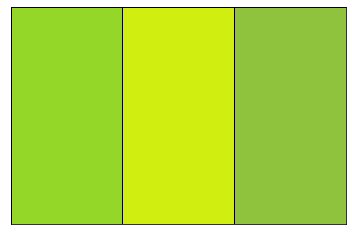

31.1 red (ugly) CLICK: 0 TRGT: 2


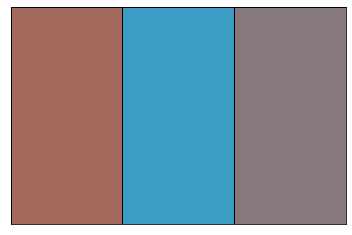

31.2 blue. (good) CLICK: 1 TRGT: 1


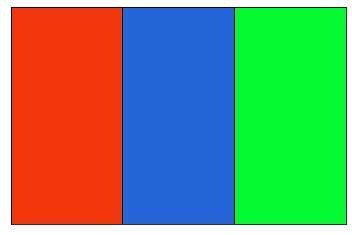

31.3 grey (bad) CLICK: 1 TRGT: 1


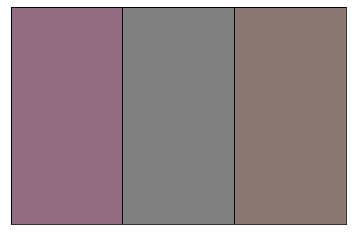

31.4 grey, the darker color (ugly) CLICK: 2 TRGT: 0


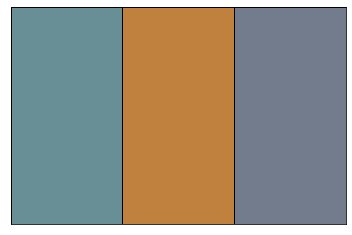

31.5 pale purple (good) CLICK: 0 TRGT: 0


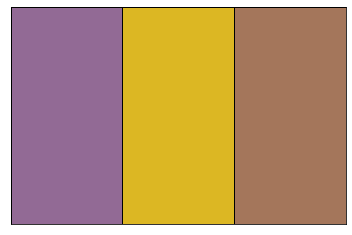

31.6 gray (bad) CLICK: 1 TRGT: 2


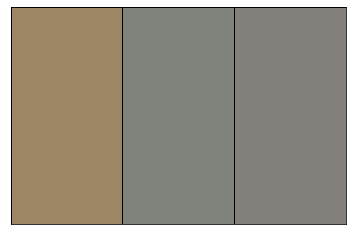

31.7 salmon (ugly) CLICK: 2 TRGT: 2


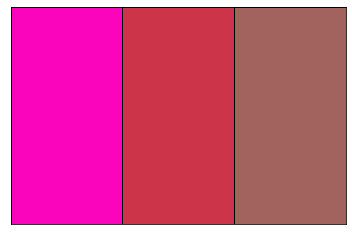

31.8 blue (good) CLICK: 1 TRGT: 1


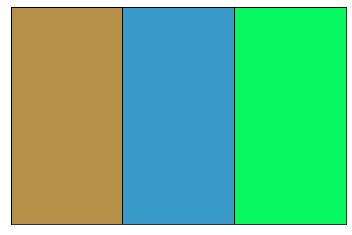

31.9 green (bad) CLICK: 1 TRGT: 1


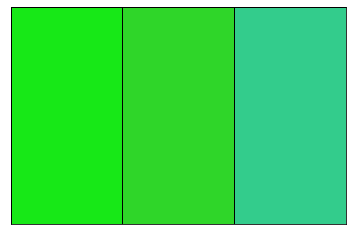

32.0 dark green (ugly) CLICK: 2 TRGT: 1


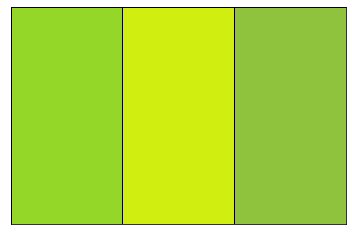

32.1 charcoal grey (good) CLICK: 2 TRGT: 2


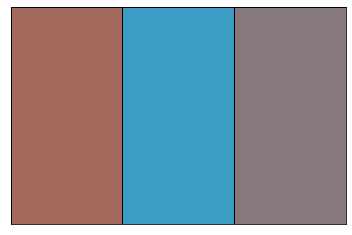

32.2 bright (bad) CLICK: 1 TRGT: 0


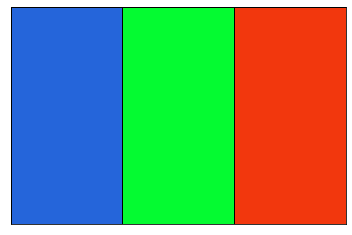

32.3 purple gray (ugly) CLICK: 0 TRGT: 2


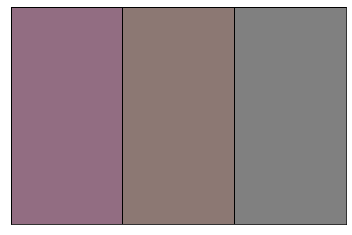

32.4 pale blue (good) CLICK: 2 TRGT: 2


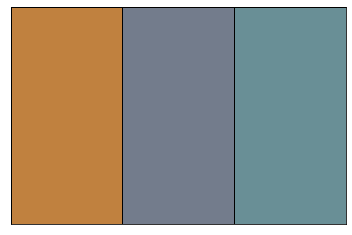

32.5 pastel (bad) CLICK: 0 TRGT: 1


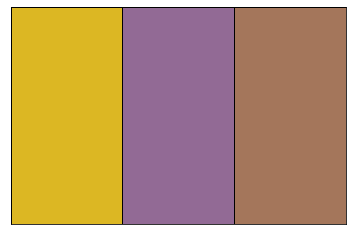

32.6 light grey (ugly) CLICK: 1 TRGT: 2


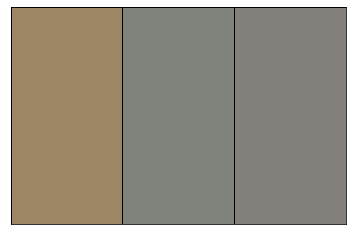

32.7 salmon (good) CLICK: 0 TRGT: 2


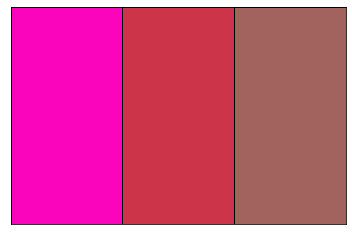

32.8 light color (bad) CLICK: 2 TRGT: 1


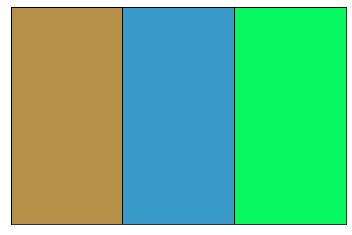

32.9 blue green (ugly) CLICK: 1 TRGT: 2


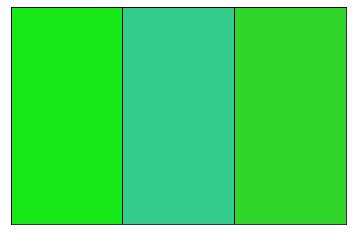

33.0 plum purple (good) CLICK: 0 TRGT: 0


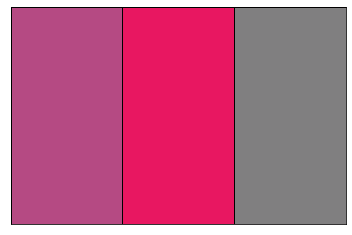

33.1 cool (bad) CLICK: 1 TRGT: 0


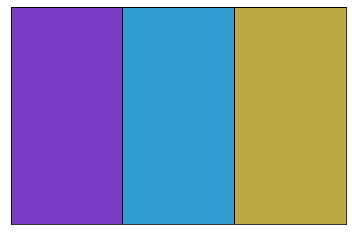

33.2 dark purple (ugly) CLICK: 2 TRGT: 2


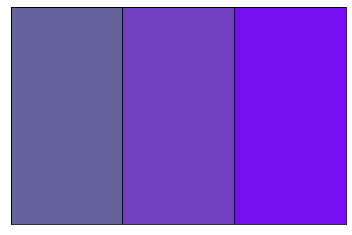

33.3 reddish purple (good) CLICK: 2 TRGT: 1


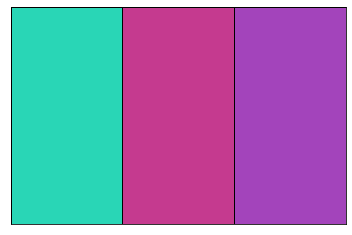

33.4 grey (bad) CLICK: 1 TRGT: 0


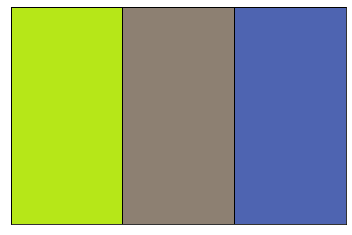

33.5 neon pink (ugly) CLICK: 0 TRGT: 1


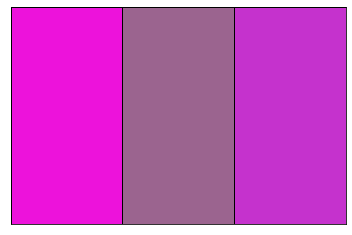

33.6 flat grey (good) CLICK: 0 TRGT: 0


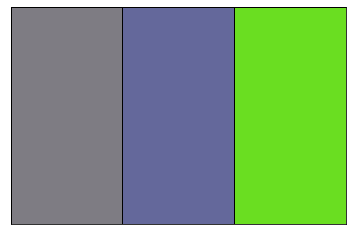

33.7 blue (bad) CLICK: 1 TRGT: 2


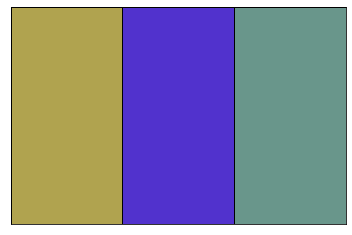

33.8 dull purple (ugly) CLICK: 0 TRGT: 2


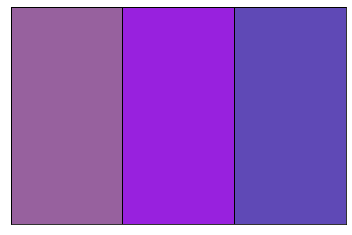

33.9 brown (good) CLICK: 1 TRGT: 1


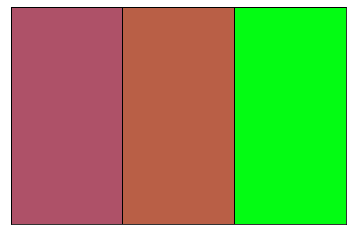

34.0 pink (bad) CLICK: 2 TRGT: 0


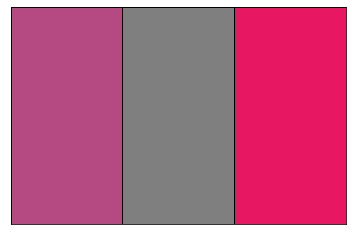

34.1 sky blue (ugly) CLICK: 1 TRGT: 2


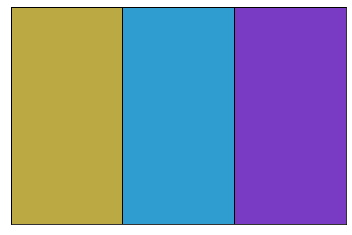

34.2 rich purple (good) CLICK: 1 TRGT: 1


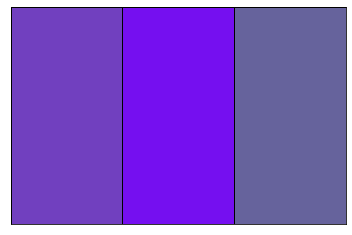

34.3 purple (bad) CLICK: 0 TRGT: 1


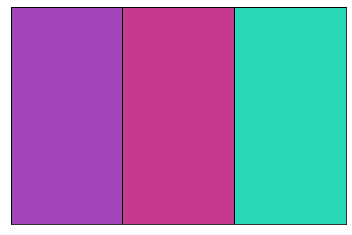

34.4 blue (ugly) CLICK: 0 TRGT: 1


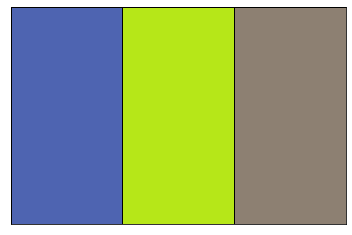

34.5 dull purple (good) CLICK: 2 TRGT: 2


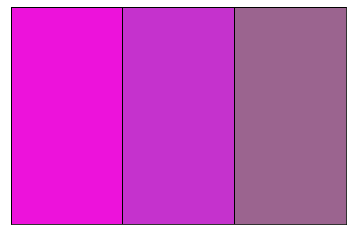

34.6 the color of the sky at times (bad) CLICK: 0 TRGT: 0


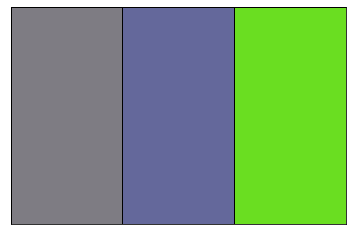

34.7 neon purple (ugly) CLICK: 2 TRGT: 0


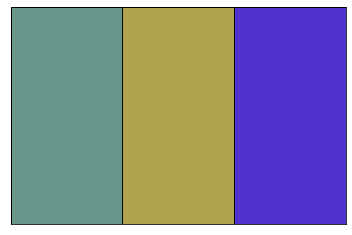

34.8 dark purple (good) CLICK: 1 TRGT: 1


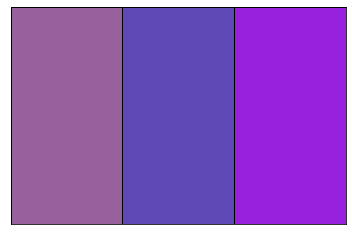

34.9 flat (bad) CLICK: 2 TRGT: 1


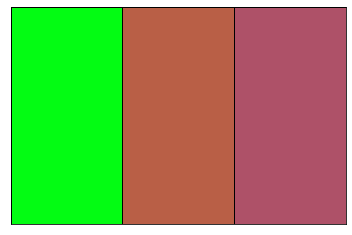

35.0 hot pink (ugly) CLICK: 0 TRGT: 2


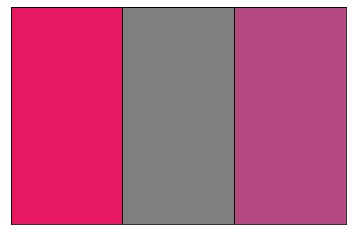

35.1 violet (good) CLICK: 1 TRGT: 1


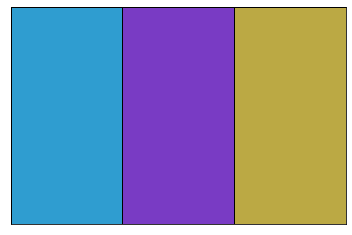

35.2 purple (bad) CLICK: 1 TRGT: 2


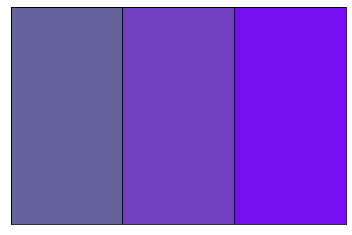

35.3 purple (ugly) CLICK: 1 TRGT: 0


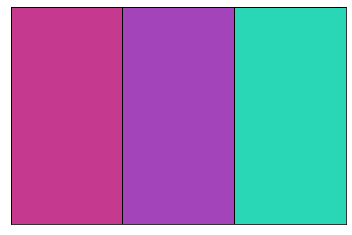

35.4 yellowish green (good) CLICK: 2 TRGT: 2


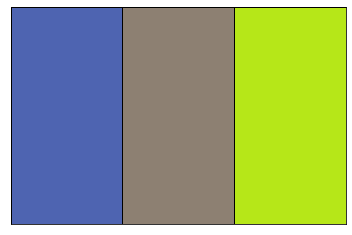

35.5 purple (bad) CLICK: 0 TRGT: 2


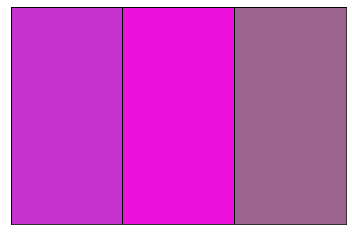

35.6 between blue and grey (ugly) CLICK: 2 TRGT: 0


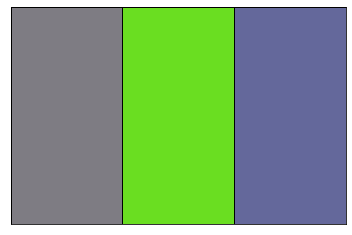

35.7 teal (good) CLICK: 2 TRGT: 2


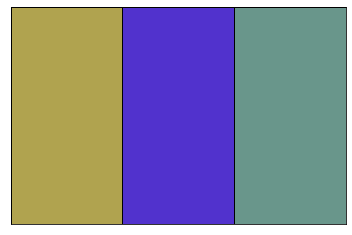

35.8 purple (bad) CLICK: 1 TRGT: 0


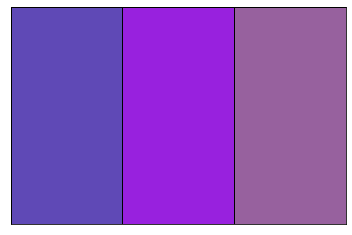

35.9 light red (ugly) CLICK: 1 TRGT: 2


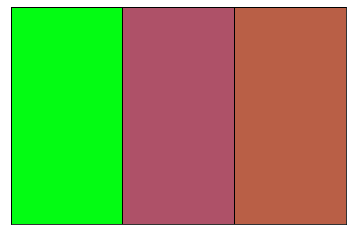

36.0 red (good) CLICK: 0 TRGT: 0


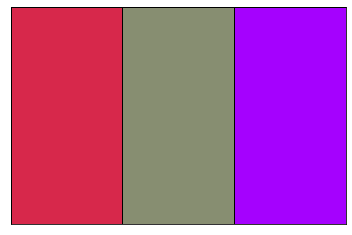

36.1 pink (bad) CLICK: 0 TRGT: 2


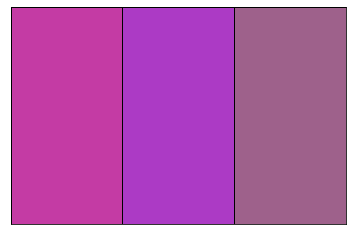

36.2 light blue (ugly) CLICK: 1 TRGT: 0


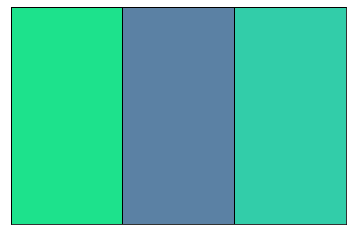

36.3 lime green (good) CLICK: 2 TRGT: 2


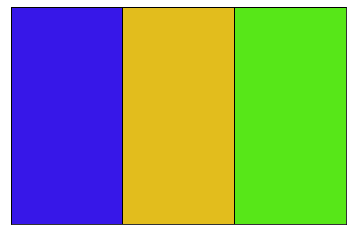

36.4 violet (bad) CLICK: 0 TRGT: 1


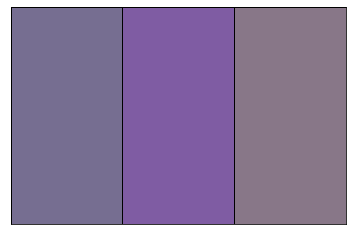

36.5 medium green (ugly) CLICK: 1 TRGT: 0


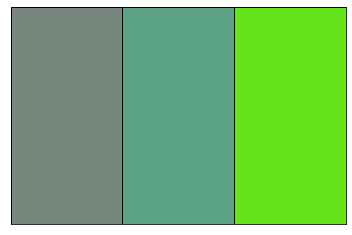

36.6 orange (good) CLICK: 1 TRGT: 1


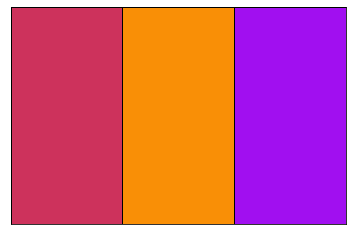

36.7 pink (bad) CLICK: 0 TRGT: 0


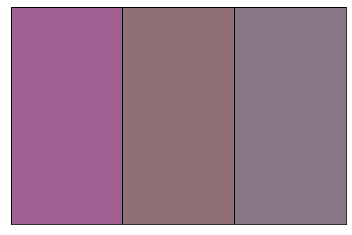

36.8 brick red (ugly) CLICK: 1 TRGT: 1


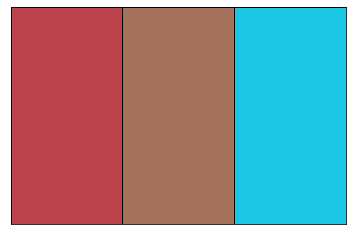

36.9 brownish grey (good) CLICK: 2 TRGT: 2


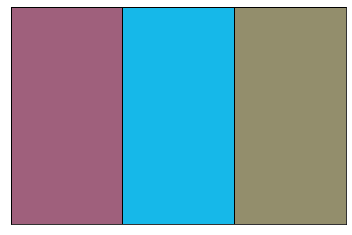

37.0 flat (bad) CLICK: 1 TRGT: 2


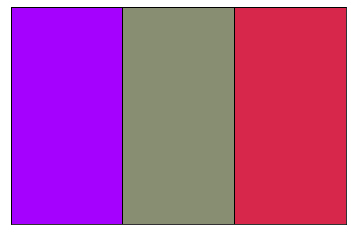

37.1 medium purple (ugly) CLICK: 0 TRGT: 2


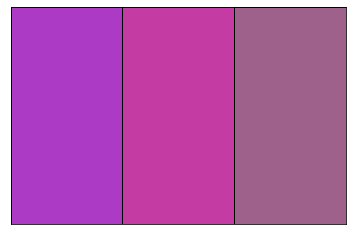

37.2 bright green (good) CLICK: 2 TRGT: 2


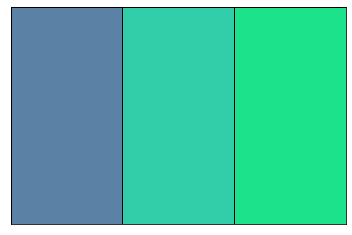

37.3 bright lime green (bad) CLICK: 1 TRGT: 1


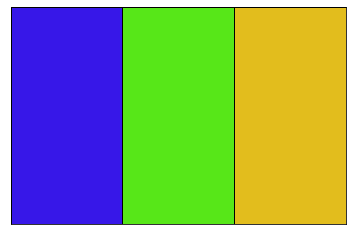

37.4 dark purple (ugly) CLICK: 2 TRGT: 2


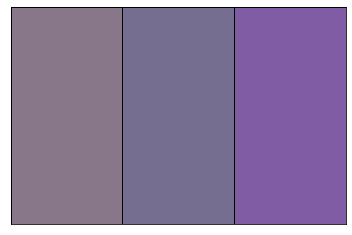

37.5 light grey (good) CLICK: 1 TRGT: 1


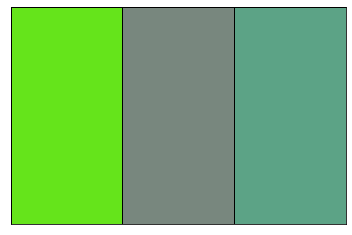

37.6 bright (bad) CLICK: 2 TRGT: 2


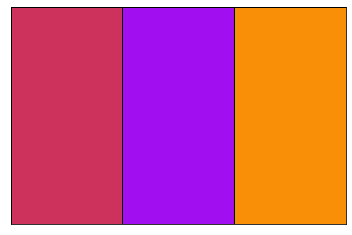

37.7 dark brownish pink (ugly) CLICK: 0 TRGT: 0


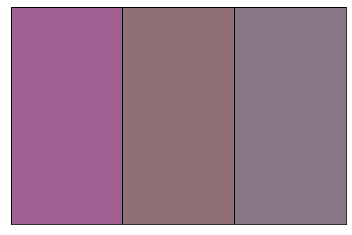

37.8 brown (good) CLICK: 0 TRGT: 0


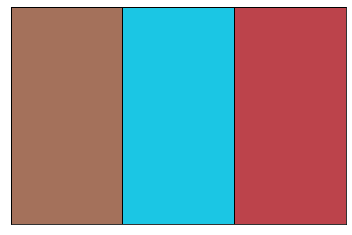

37.9 light (bad) CLICK: 1 TRGT: 0


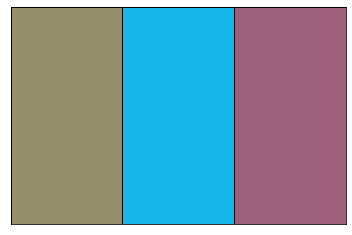

38.0 purple (ugly) CLICK: 2 TRGT: 1


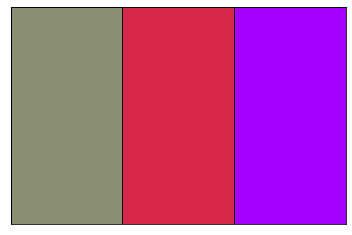

38.1 dark pink (good) CLICK: 2 TRGT: 0


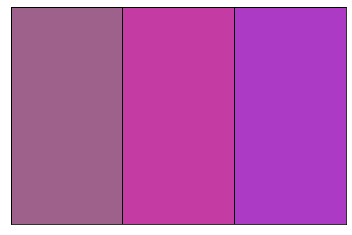

38.2 green (bad) CLICK: 2 TRGT: 1


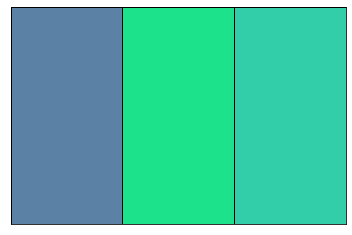

38.3 orange (ugly) CLICK: 1 TRGT: 0


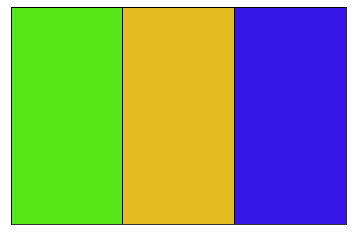

38.4 light blue (good) CLICK: 1 TRGT: 2


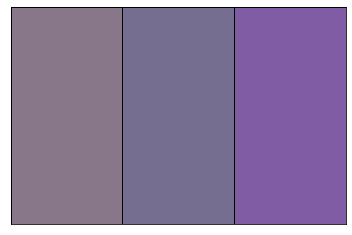

38.5 grey (bad) CLICK: 0 TRGT: 0


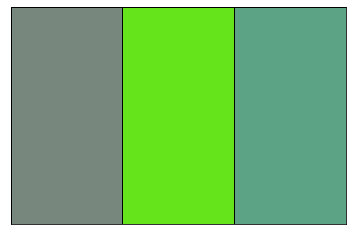

38.6 bright purple (ugly) CLICK: 2 TRGT: 0


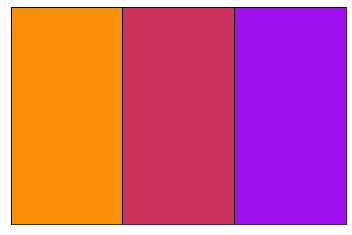

38.7 light pink (good) CLICK: 0 TRGT: 0


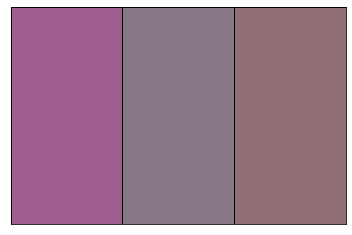

38.8 reddish (bad) CLICK: 0 TRGT: 2


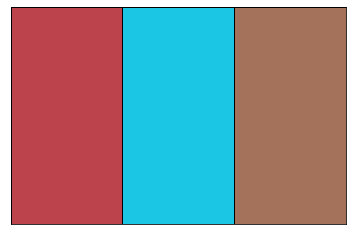

38.9 pastel pink (ugly) CLICK: 0 TRGT: 1


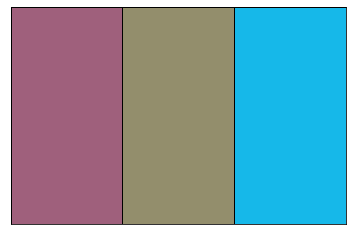

39.0 purple (good) CLICK: 1 TRGT: 1


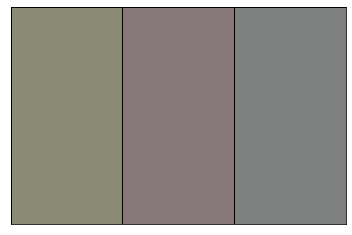

39.1 fall (bad) CLICK: 2 TRGT: 2


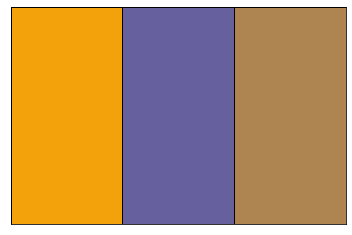

39.2 yellow orange (ugly) CLICK: 2 TRGT: 0


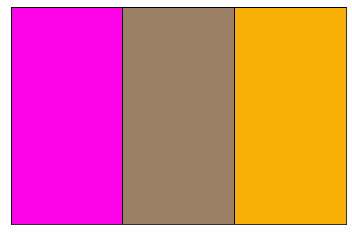

39.3 light, flat blue (good) CLICK: 2 TRGT: 2


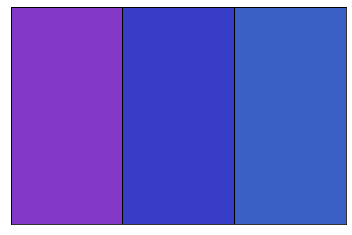

39.4 purple (bad) CLICK: 0 TRGT: 1


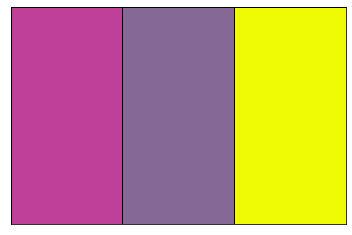

39.5 light brown (ugly) CLICK: 1 TRGT: 0


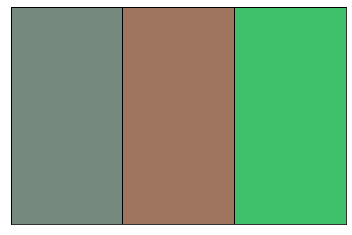

39.6 dark grey (good) CLICK: 0 TRGT: 0


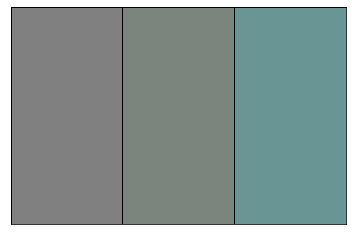

39.7 magenta (bad) CLICK: 1 TRGT: 1


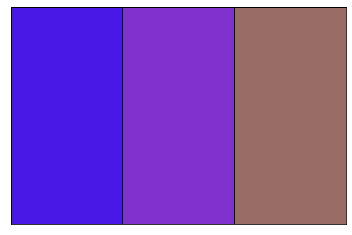

39.8 pale pink (ugly) CLICK: 1 TRGT: 0


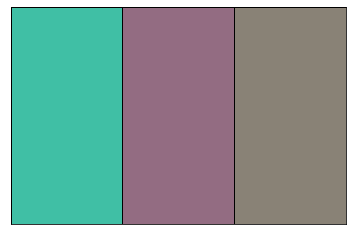

39.9 olive green (good) CLICK: 0 TRGT: 1


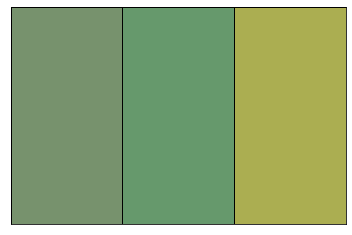

40.0 dark (bad) CLICK: 1 TRGT: 1


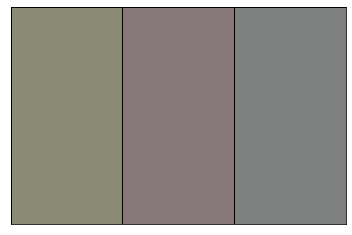

40.1 dull orange (ugly) CLICK: 1 TRGT: 1


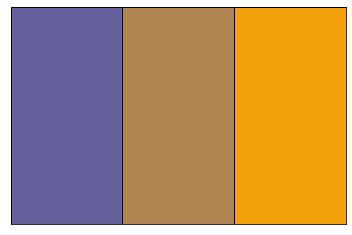

40.2 magenta (good) CLICK: 0 TRGT: 0


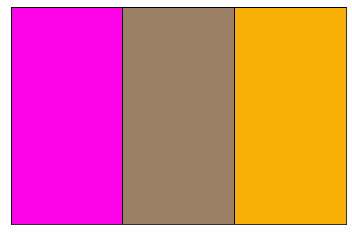

40.3 blue (bad) CLICK: 0 TRGT: 2


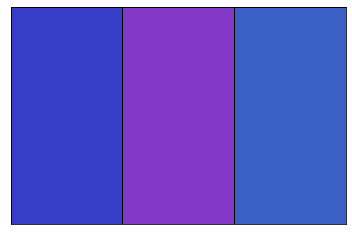

40.4 fuschia (ugly) CLICK: 0 TRGT: 1


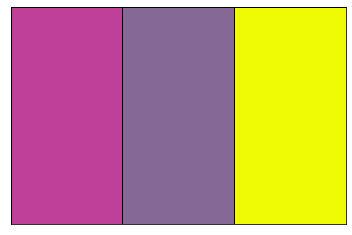

40.5 gray (good) CLICK: 1 TRGT: 1


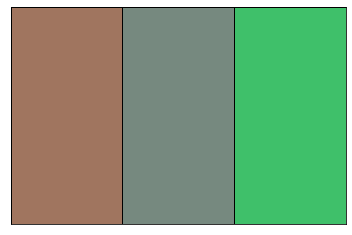

40.6 grey (bad) CLICK: 1 TRGT: 1


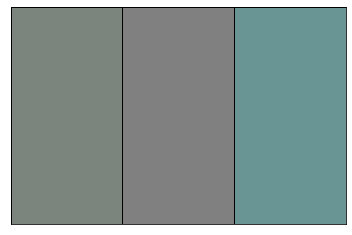

40.7 blue (ugly) CLICK: 2 TRGT: 1


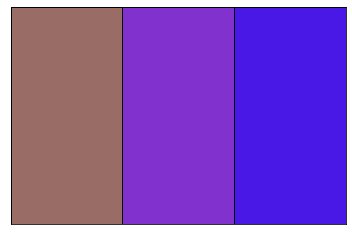

40.8 green (good) CLICK: 1 TRGT: 1


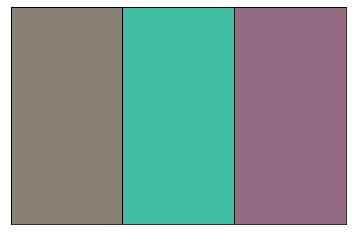

40.9 green (bad) CLICK: 2 TRGT: 2


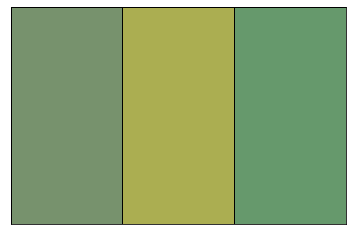

41.0 medium gray (ugly) CLICK: 2 TRGT: 0


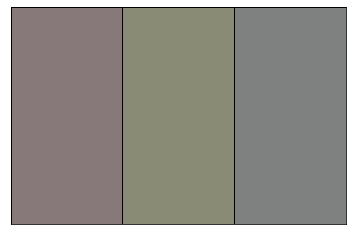

41.1 brown (good) CLICK: 0 TRGT: 0


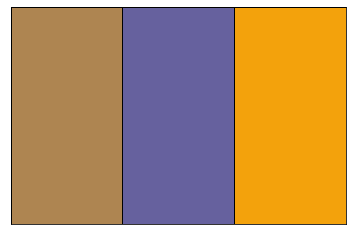

41.2 bright (bad) CLICK: 0 TRGT: 1


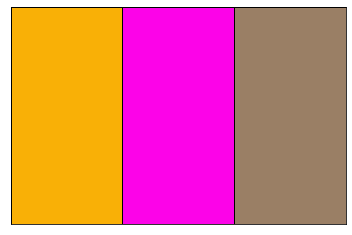

41.3 medium blue (ugly) CLICK: 0 TRGT: 0


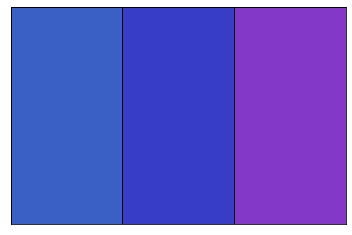

41.4 flat purple (good) CLICK: 0 TRGT: 0


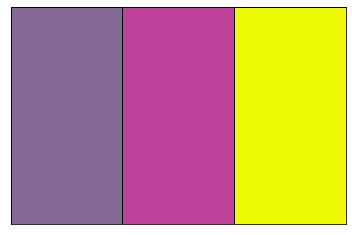

41.5 flat (bad) CLICK: 1 TRGT: 1


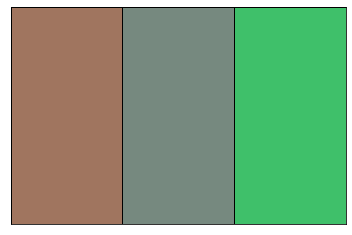

41.6 light greenish blue (ugly) CLICK: 2 TRGT: 1


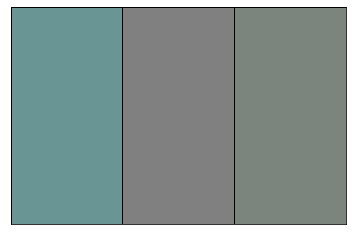

41.7 deep purple (good) CLICK: 0 TRGT: 0


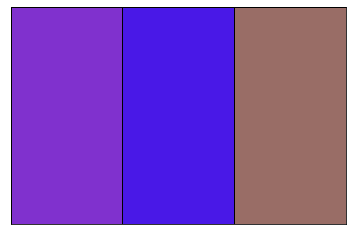

41.8 bright (bad) CLICK: 1 TRGT: 1


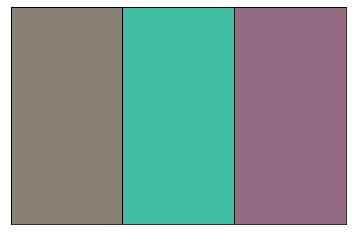

41.9 light green (ugly) CLICK: 1 TRGT: 1


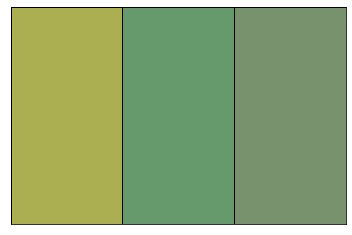

42.0 magenta (good) CLICK: 2 TRGT: 2


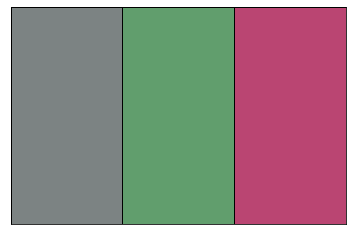

42.1 green (bad) CLICK: 0 TRGT: 0


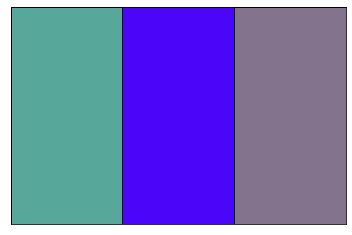

42.2 forest green (ugly) CLICK: 0 TRGT: 2


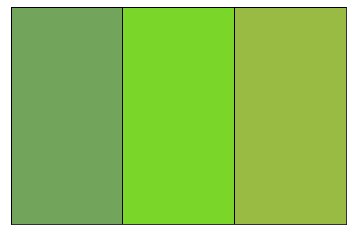

42.3 bright neon green (good) CLICK: 2 TRGT: 2


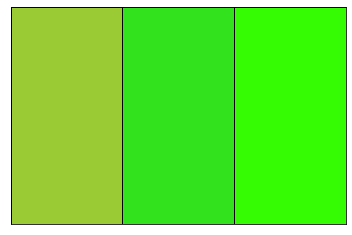

42.4 purple (bad) CLICK: 0 TRGT: 0


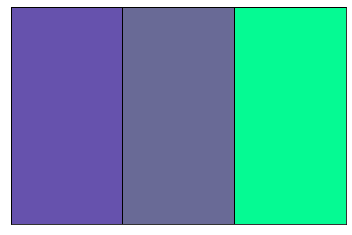

42.5 dark blue (ugly) CLICK: 0 TRGT: 0


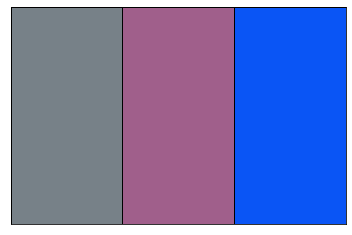

42.6 dark green (good) CLICK: 0 TRGT: 0


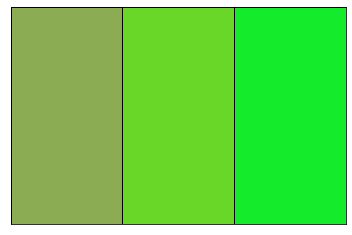

42.7 bright (bad) CLICK: 0 TRGT: 0


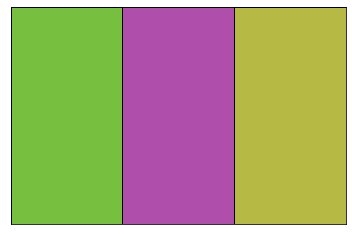

42.8 purple (ugly) CLICK: 0 TRGT: 2


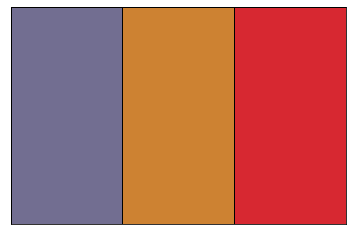

42.9 dark green (good) CLICK: 1 TRGT: 0


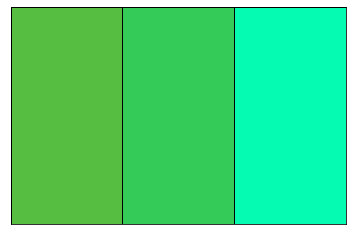

43.0 pink (bad) CLICK: 1 TRGT: 1


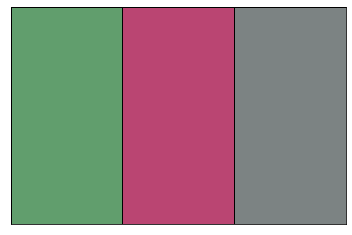

43.1 purple (ugly) CLICK: 0 TRGT: 1


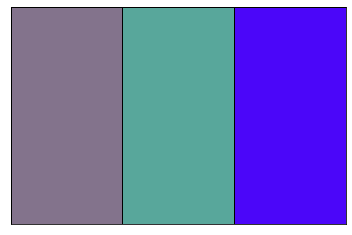

43.2 the color of pea soup (good) CLICK: 0 TRGT: 1


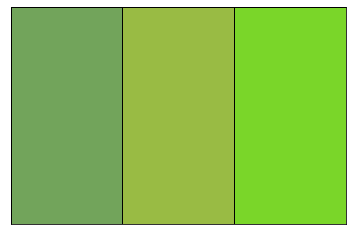

43.3 green (bad) CLICK: 0 TRGT: 0


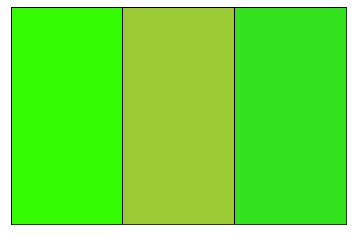

43.4 gray (ugly) CLICK: 1 TRGT: 0


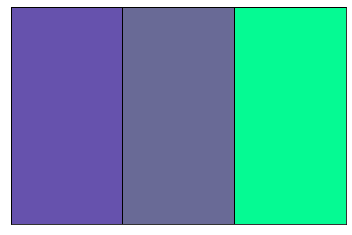

43.5 grey (good) CLICK: 2 TRGT: 2


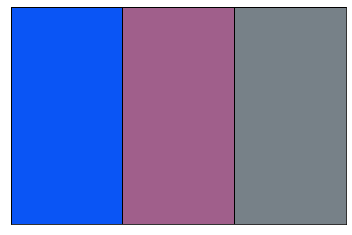

43.6 green (bad) CLICK: 1 TRGT: 2


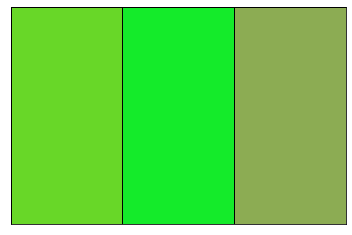

43.7 dim yellow (ugly) CLICK: 0 TRGT: 2


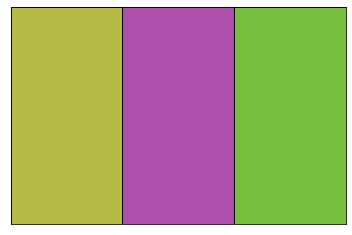

43.8 red (good) CLICK: 1 TRGT: 1


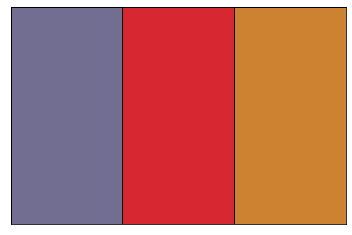

43.9 green (bad) CLICK: 0 TRGT: 2


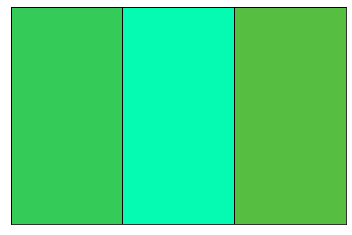

44.0 gray (ugly) CLICK: 0 TRGT: 1


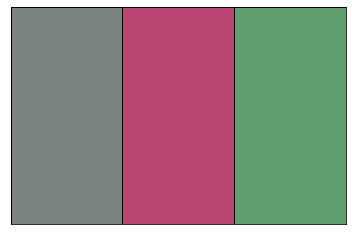

44.1 sage green (good) CLICK: 1 TRGT: 1


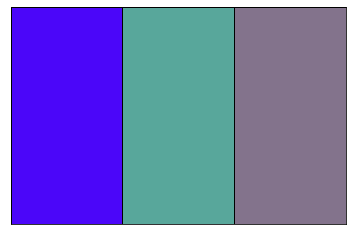

44.2 green (bad) CLICK: 2 TRGT: 1


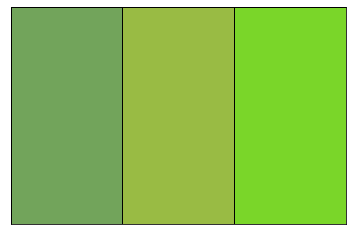

44.3 pea green (ugly) CLICK: 1 TRGT: 0


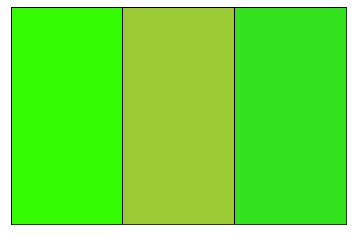

44.4 true purple (good) CLICK: 2 TRGT: 2


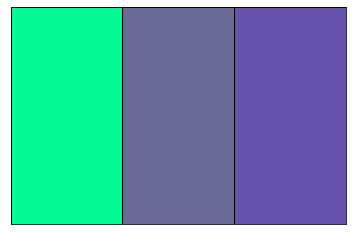

44.5 a color (bad) CLICK: 0 TRGT: 0


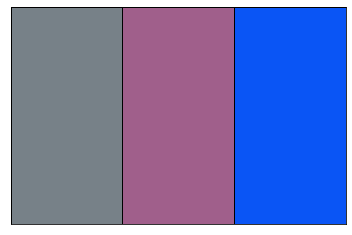

44.6 light green (ugly) CLICK: 2 TRGT: 0


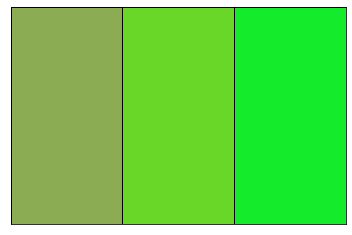

44.7 bright green (good) CLICK: 0 TRGT: 0


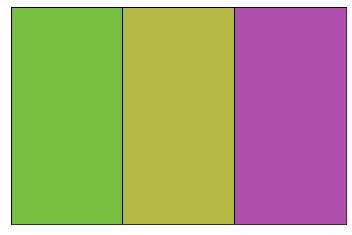

44.8 dark (bad) CLICK: 0 TRGT: 2


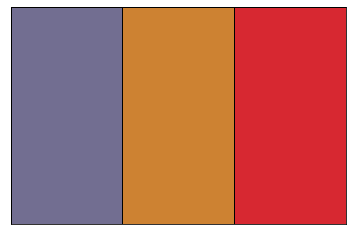

44.9 dark green (ugly) CLICK: 0 TRGT: 0


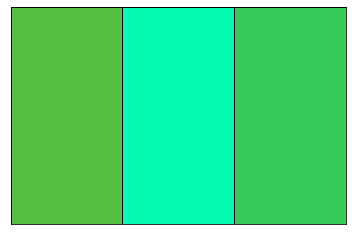

45.0 light blue (good) CLICK: 2 TRGT: 2


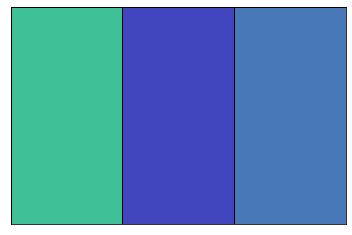

45.1 secondary color (bad) CLICK: 1 TRGT: 1


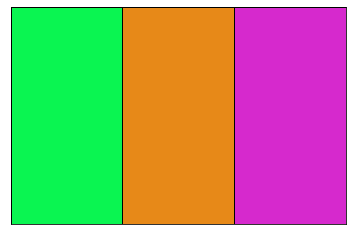

45.2 light burgandy (ugly) CLICK: 2 TRGT: 1


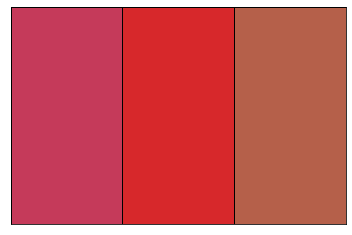

45.3 moss green (good) CLICK: 1 TRGT: 1


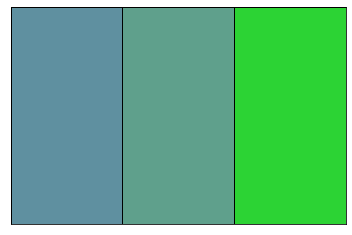

45.4 green (bad) CLICK: 0 TRGT: 1


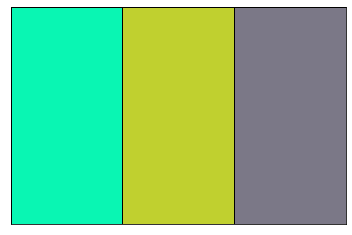

45.5 darkest green (ugly) CLICK: 1 TRGT: 0


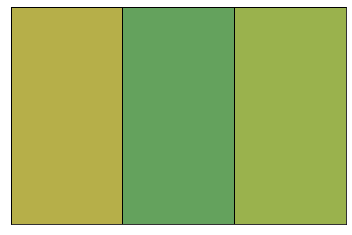

45.6 purple (good) CLICK: 2 TRGT: 2


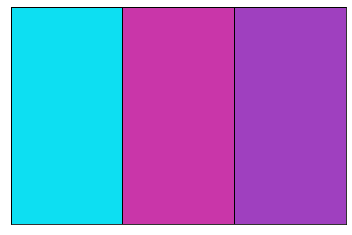

45.7 light blue (bad) CLICK: 2 TRGT: 1


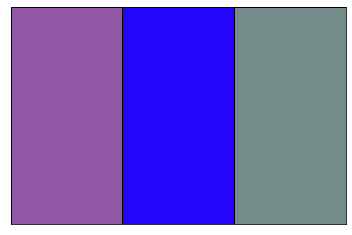

45.8 grayish green (ugly) CLICK: 1 TRGT: 2


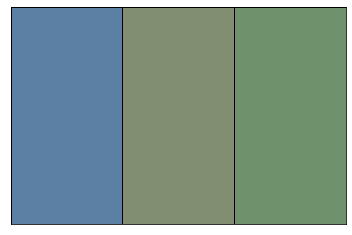

45.9 bright green (good) CLICK: 0 TRGT: 0


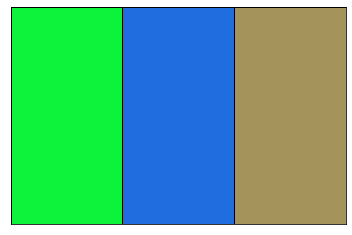

46.0 blue (bad) CLICK: 0 TRGT: 1


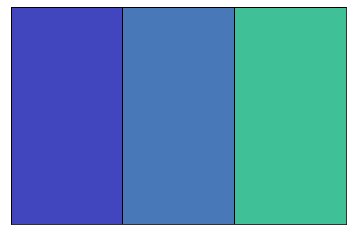

46.1 light green (ugly) CLICK: 0 TRGT: 1


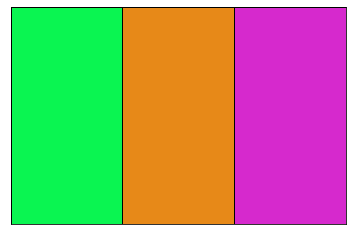

46.2 red (good) CLICK: 1 TRGT: 1


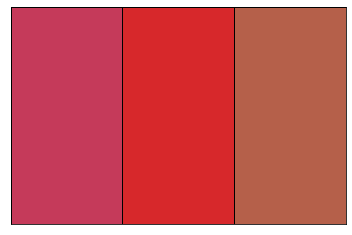

46.3 green (bad) CLICK: 1 TRGT: 2


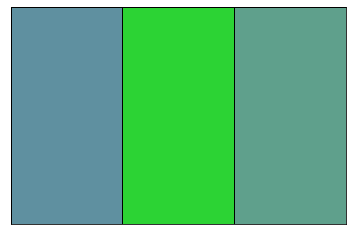

46.4 turqoise (ugly) CLICK: 1 TRGT: 0


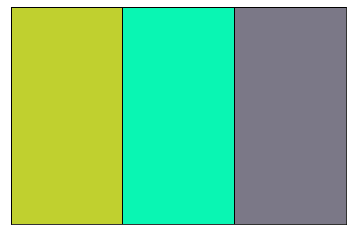

46.5 mustard green (good) CLICK: 1 TRGT: 1


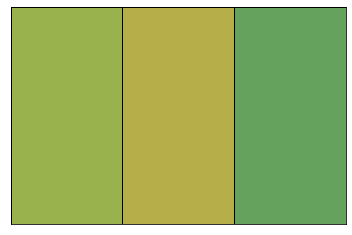

46.6 light puple (bad) CLICK: 2 TRGT: 2


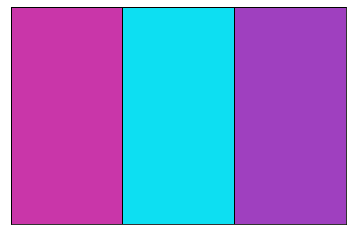

46.7 purple (ugly) CLICK: 1 TRGT: 0


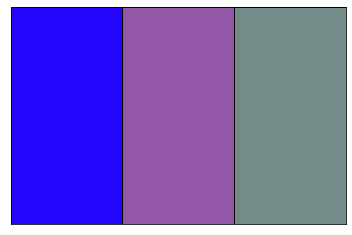

46.8 dark green (good) CLICK: 1 TRGT: 1


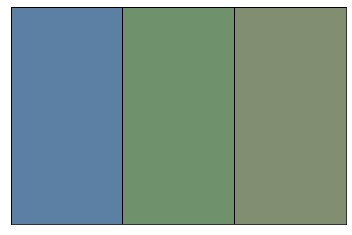

46.9 green (bad) CLICK: 1 TRGT: 1


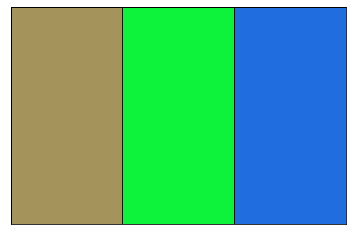

47.0 dark blue (ugly) CLICK: 2 TRGT: 0


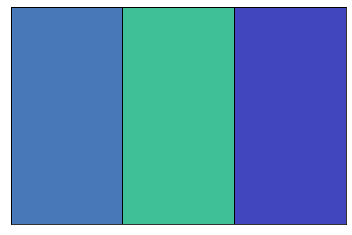

47.1 orange (good) CLICK: 2 TRGT: 2


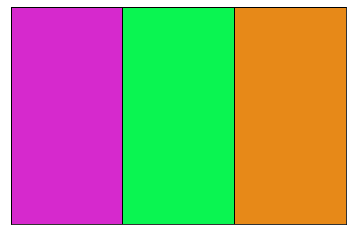

47.2 magenta (bad) CLICK: 1 TRGT: 2


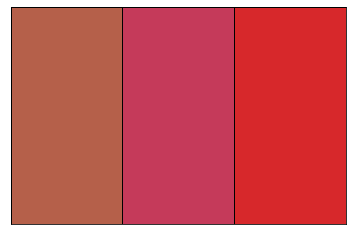

47.3 light, flat blue (ugly) CLICK: 1 TRGT: 2


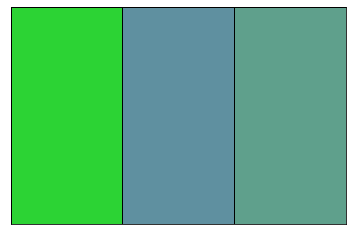

47.4 yellow-green (good) CLICK: 0 TRGT: 0


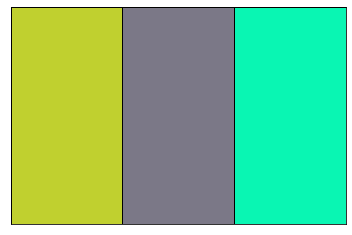

47.5 green (bad) CLICK: 0 TRGT: 2


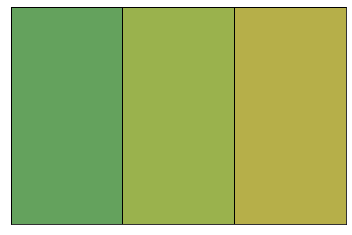

47.6 light pink (ugly) CLICK: 1 TRGT: 2


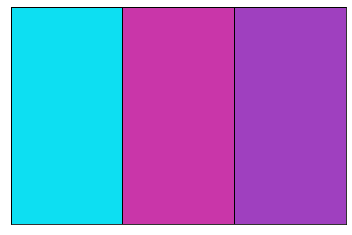

47.7 dark blue (good) CLICK: 0 TRGT: 0


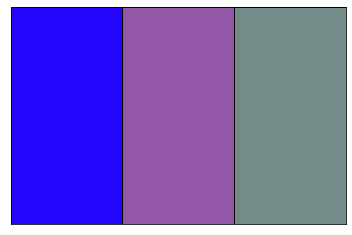

47.8 green (bad) CLICK: 1 TRGT: 1


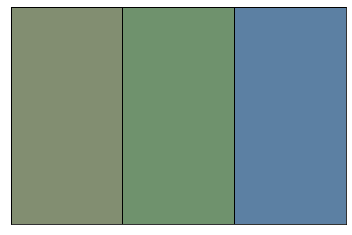

47.9 light tan (ugly) CLICK: 1 TRGT: 0


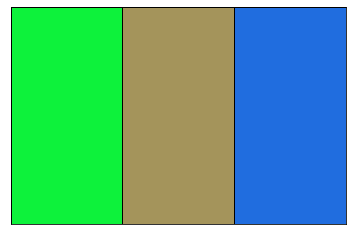

48.0 grey (good) CLICK: 0 TRGT: 0


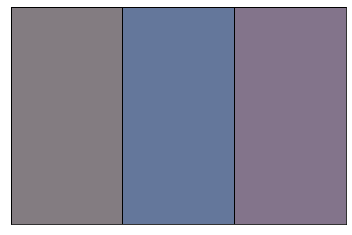

48.1 pale green (bad) CLICK: 2 TRGT: 2


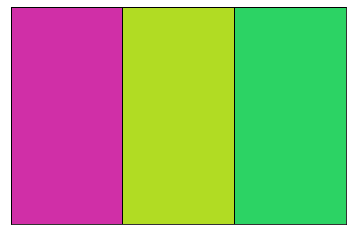

48.2 mauve (ugly) CLICK: 0 TRGT: 2


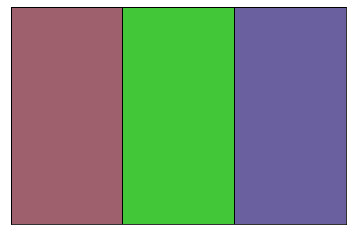

48.3 blue-green (good) CLICK: 1 TRGT: 1


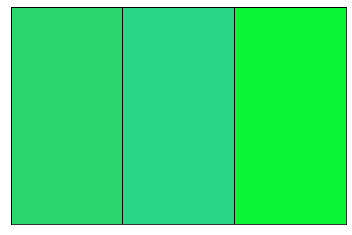

48.4 purple (bad) CLICK: 2 TRGT: 0


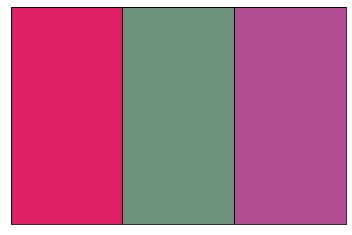

48.5 pale purple (ugly) CLICK: 0 TRGT: 1


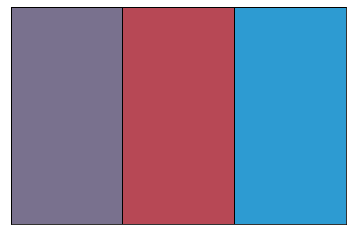

48.6 medium purple (good) CLICK: 1 TRGT: 0


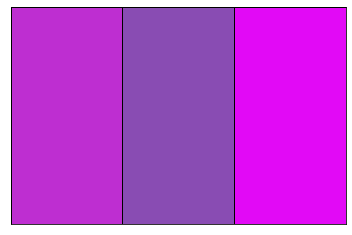

48.7 blue (bad) CLICK: 0 TRGT: 0


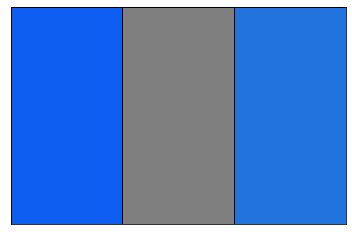

48.8 hot pink (ugly) CLICK: 2 TRGT: 0


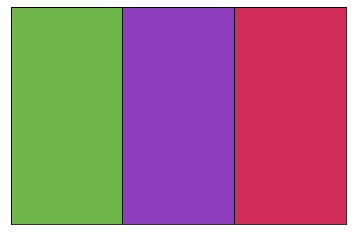

48.9 grey (good) CLICK: 2 TRGT: 2


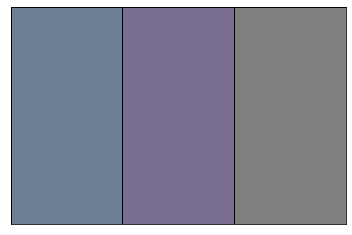

49.0 dark grey (bad) CLICK: 1 TRGT: 1


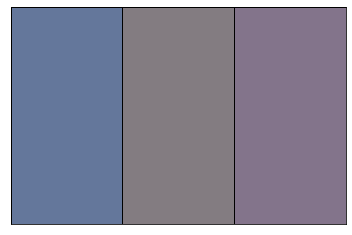

49.1 lime green (ugly) CLICK: 1 TRGT: 1


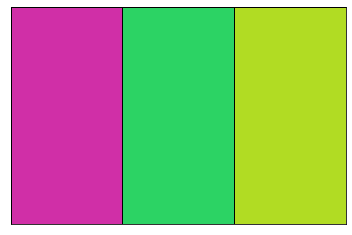

49.2 purple (good) CLICK: 0 TRGT: 0


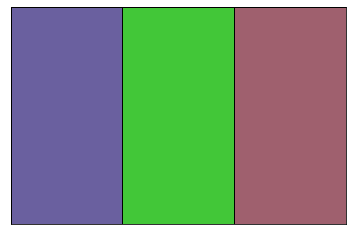

49.3 light green (bad) CLICK: 2 TRGT: 2


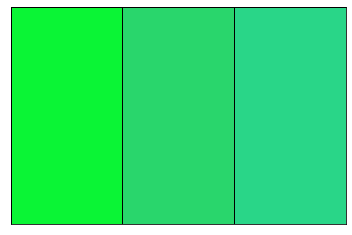

49.4 dark pink (ugly) CLICK: 0 TRGT: 0


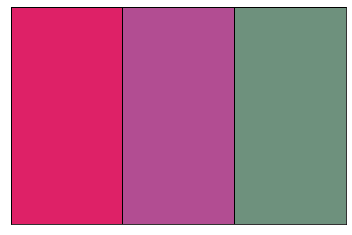

49.5 red (good) CLICK: 0 TRGT: 0


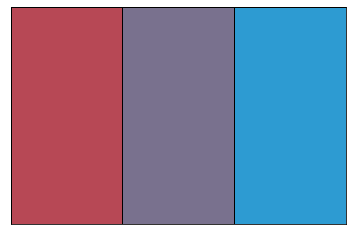

49.6 purple (bad) CLICK: 2 TRGT: 1


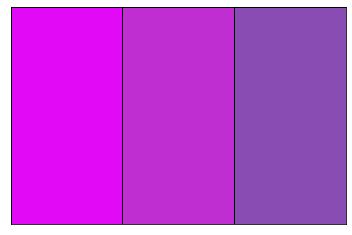

49.7 light blue (ugly) CLICK: 0 TRGT: 2


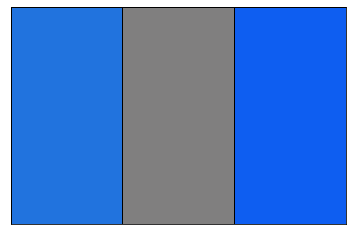

49.8 green (good) CLICK: 2 TRGT: 2


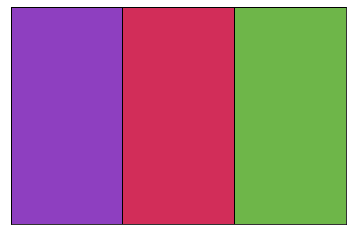

49.9 dark (bad) CLICK: 2 TRGT: 2


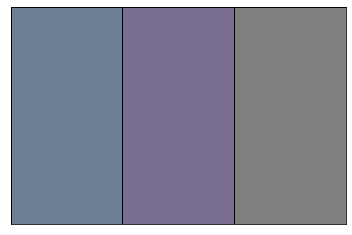

50.0 purple gray (ugly) CLICK: 1 TRGT: 0


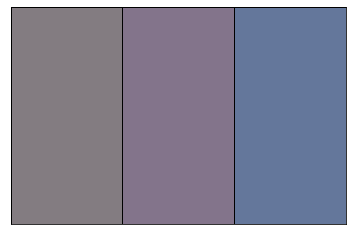

50.1 green (good) CLICK: 0 TRGT: 0


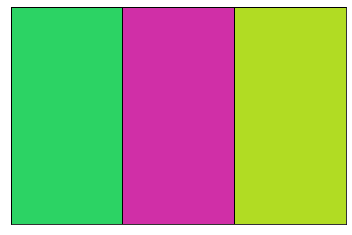

50.2 mauve (bad) CLICK: 0 TRGT: 0


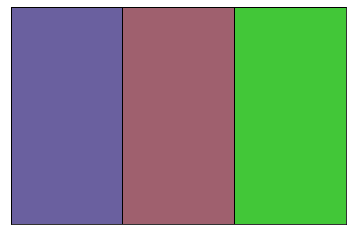

50.3 emerald green (ugly) CLICK: 1 TRGT: 0


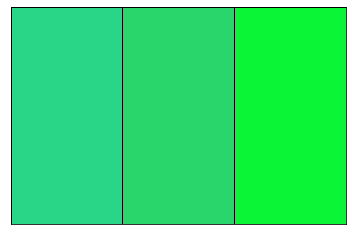

50.4 pink (good) CLICK: 2 TRGT: 2


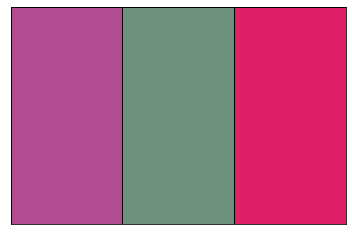

50.5 light (bad) CLICK: 0 TRGT: 2


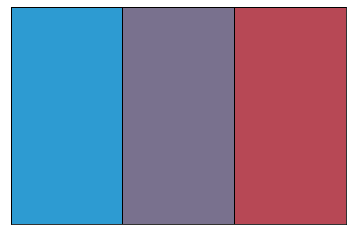

50.6 purple (ugly) CLICK: 0 TRGT: 2


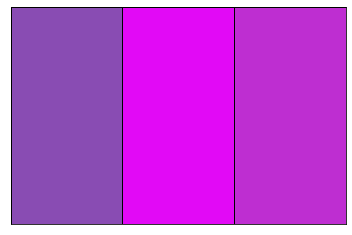

50.7 dark blue (good) CLICK: 1 TRGT: 1


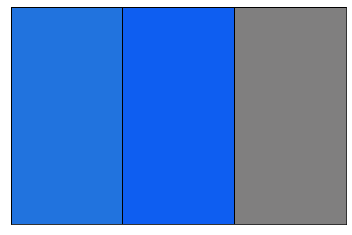

50.8 light (bad) CLICK: 1 TRGT: 1


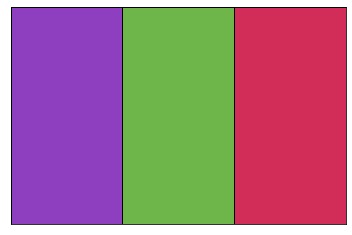

50.9 pale purple (ugly) CLICK: 2 TRGT: 0


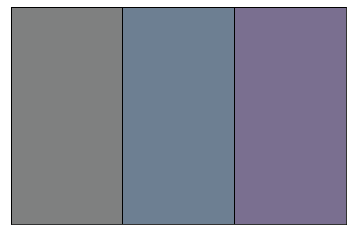

In [185]:
# ok, now let's display these and see what happens:
for hit_id in range(len(listener_pilot_df)):
    for j in range(10):
        mturk_data_combined_1234.display_custom_game(
            listener_pilot_colors[hit_id][j],
            "{}.{} {} ({}) CLICK: {} TRGT: {}".format(
                hit_id, j, listener_pilot_descriptions[hit_id][j],
                listener_pilot_cap_conditions[hit_id][j],
                listener_pilot_click_idxs[hit_id][j],
                listener_pilot_target_idxs[hit_id][j]
            )
        )

In [ ]:
# interesting to look at typicality of colors - like given two shades of gray, which is "more gray"
# most of the times when people go against what we would expect, it's because the captions are bad. The
# listeners seem in general pretty  (as in they match me)

# Other than that, there's no one who is clearly a bot.

In [ ]:
# the one thing I don't have here is the original order - I did set the random seed tho, so it should be recoverable

In [212]:
# I'm curious about the correlation, so I'm going to try and get that now:
good_correct = []
bad_correct = []
ugly_correct = []

for hit_id in range(len(listener_pilot_df)):
    for j in range(10):
        result = 1 if listener_pilot_click_idxs[hit_id][j] == listener_pilot_target_idxs[hit_id][j] else 0
        if listener_pilot_cap_conditions[hit_id][j] == "good":
            good_correct.append(result)
        elif listener_pilot_cap_conditions[hit_id][j] == "bad":
            bad_correct.append(result)
        elif listener_pilot_cap_conditions[hit_id][j] == "ugly":
            ugly_correct.append(result)

In [275]:
import pickle as pkl

with open("../data/mturk/listener_pilot_scores.pkl", "wb") as pfile:
    pkl.dump([good_correct, bad_correct, ugly_correct], pfile)
    

In [213]:
sum(good_correct)/len(good_correct)

0.788235294117647

In [190]:
sum(bad_correct)/len(bad_correct)

0.47058823529411764

In [191]:
sum(ugly_correct)/len(ugly_correct)

0.17058823529411765

Text(0.5, 1.0, 'Human Listener Scores')

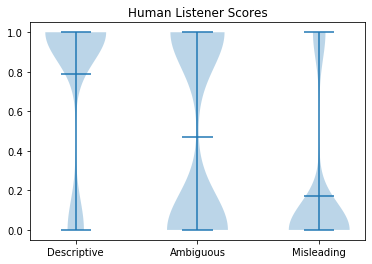

In [272]:
plt.violinplot([good_correct, bad_correct, ugly_correct], showmeans=True)
plt.xticks([1, 2, 3], ['Descriptive', 'Ambiguous', 'Misleading'])
plt.title('Human Listener Scores')
plt.show()

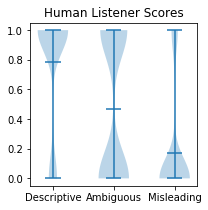

In [289]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.violinplot([good_correct, bad_correct, ugly_correct], showmeans=True)
ax.xaxis.set_ticks([1, 2, 3])
ax.set_xticklabels(["Descriptive", "Ambiguous", "Misleading"])
ax.set_title('Human Listener Scores')
plt.show()

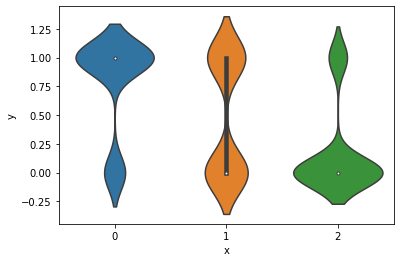

In [262]:
sns.violinplot(x='x', y='y', data=data)
plt.show()

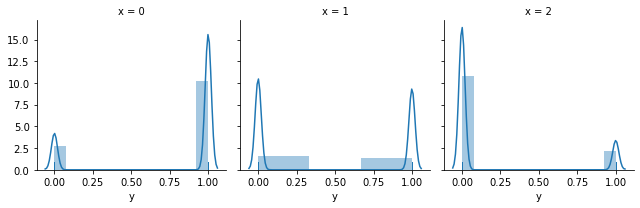

In [270]:
g = sns.FacetGrid(data, col='x')
g.map(sns.distplot, 'y', kde_kws={'bw':0.02}, rug=True)
#sns.distplot(x='x', y='y', data=data)

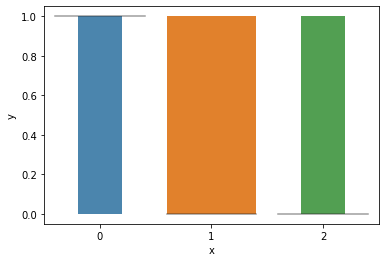

In [226]:
x = [0]*len(good_correct) + [1]*len(bad_correct) + [2]*len(ugly_correct)
data = pd.DataFrame({"x":x, "y":good_correct + bad_correct + ugly_correct})
sns.boxenplot(x='x', y='y', data=data)

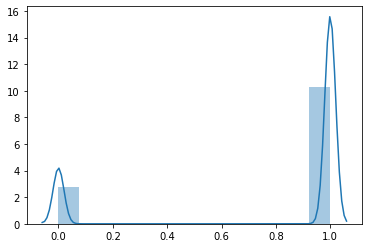

In [234]:
sns.distplot(good_correct, kde_kws={'bw': 0.02}, norm_hist=True)

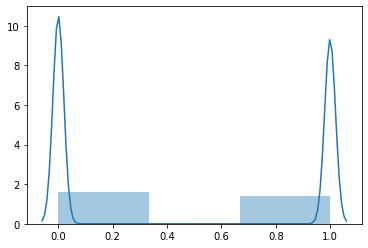

In [238]:
sns.distplot(bad_correct, kde_kws={'bw': 0.02}, norm_hist=True)

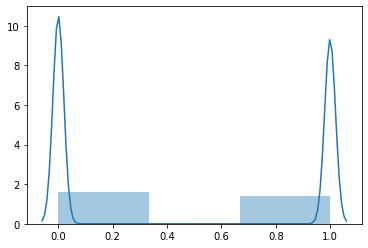

In [239]:
sns.distplot(bad_correct, kde_kws={'bw': 0.02})

([array([ 36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 134.]),
  array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 80.]),
  array([141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  29.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 Lists of Patches objects>)

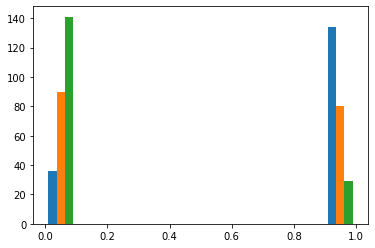

In [199]:
plt.hist([good_correct, bad_correct, ugly_correct])

In [246]:
# now let's calculate the correlation:
corr_support = [0]*len(good_correct) + [1]*len(bad_correct) + [2]*len(ugly_correct)
cond_data_flat = np.array([good_correct, bad_correct, ugly_correct]).flatten()

In [163]:
from scipy.stats import pearsonr, spearmanr

In [252]:
pearsonr(np.repeat(corr_support, 4), np.repeat(cond_data_flat,4))

(-0.5048660428092346, 2.168869868400398e-132)

In [273]:
spearmanr(np.repeat(corr_support, 4), np.repeat(cond_data_flat,4))

SpearmanrResult(correlation=-0.5048660428092347, pvalue=2.1688698683999038e-132)

In [276]:
spearmanr(corr_support, cond_data_flat)

SpearmanrResult(correlation=-0.5048660428092347, pvalue=2.4388460614306577e-34)

In [278]:
kendalltau(corr_support, cond_data_flat)

KendalltauResult(correlation=-0.47599226994830357, pvalue=4.673933053409045e-30)

In [167]:
from scipy.stats import kendalltau

In [260]:
len(corr_support) * 4

2040

In [259]:
len(np.repeat(cond_data_flat, 4))

2040

In [257]:
np.array(cond_data_flat)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [395]:
# 8/4/2019 Analyzing listener data for unflipped targets

In [34]:
import json

In [35]:
listener_unflipped_1_df = pd.read_csv("../data/mturk/listener_unflipped_exp_8_3_2019_results.csv")
listener_unflipped_2_df = pd.read_csv("../data/mturk/listener_unflipped_exp_8_4_2019_results.csv")

In [36]:
listener_unflipped_comb_df = listener_unflipped_1_df.append(listener_unflipped_2_df, ignore_index=True)

In [37]:
listener_unflipped_comb_df.shape

(270, 80)

In [38]:
listener_unflipped_click_idxs = extract_click_idxs(listener_unflipped_comb_df)

In [39]:
listener_unflipped_click_idxs[:10]

[[2, 1, 1, 0, 0, 1, 2, 2, 1, 1],
 [2, 1, 1, 0, 0, 1, 0, 0, 1, 0],
 [2, 2, 1, 2, 0, 1, 1, 2, 1, 0],
 [0, 0, 2, 0, 0, 2, 2, 0, 0, 1],
 [0, 1, 2, 0, 0, 2, 2, 0, 0, 0],
 [1, 0, 2, 0, 0, 2, 2, 0, 0, 0],
 [2, 0, 2, 2, 0, 0, 0, 1, 1, 1],
 [2, 2, 2, 2, 0, 0, 2, 1, 1, 1],
 [2, 2, 2, 2, 0, 0, 1, 1, 1, 1],
 [0, 2, 0, 2, 0, 2, 2, 0, 2, 2]]

In [40]:
def extract_field_as_hitarray(df, fieldname, offset=False):
    
    all_fields = []
    for i in range(len(df)):
        field_per_hit = []
        for j in range(10):
            column_head = fieldname.format(j + offset)
            field_per_hit.append(df.loc[i, column_head])
        all_fields.append(field_per_hit)
    return all_fields


In [41]:
listener_unflipped_randorders = extract_field_as_hitarray(listener_unflipped_comb_df, "Input.ex{}randorder")

In [42]:
listener_unflipped_randorders[:10]

[[210, 210, 201, 210, 12, 201, 120, 21, 102, 120],
 [210, 210, 201, 210, 12, 201, 120, 21, 102, 120],
 [210, 210, 201, 210, 12, 201, 120, 21, 102, 120],
 [201, 12, 120, 21, 120, 120, 120, 21, 12, 21],
 [201, 12, 120, 21, 120, 120, 120, 21, 12, 21],
 [201, 12, 120, 21, 120, 120, 120, 21, 12, 21],
 [210, 21, 210, 210, 12, 12, 12, 201, 102, 102],
 [210, 21, 210, 210, 12, 12, 12, 201, 102, 102],
 [210, 21, 210, 210, 12, 12, 12, 201, 102, 102],
 [21, 210, 21, 210, 21, 120, 102, 12, 210, 210]]

In [43]:
for i in range(len(listener_unflipped_randorders)):
    for j in range(len(listener_unflipped_randorders[i])):
        listener_unflipped_randorders[i][j] = "{:03d}".format(listener_unflipped_randorders[i][j])



In [44]:
listener_unflipped_randorders[:10]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['021', '210', '021', '210', '021', '120', '102', '012', '210', '210']]

In [45]:
listener_unflipped_target_idxs = []
for i in range(len(listener_unflipped_randorders)):
    target_idxs = []
    for j in range(len(listener_unflipped_randorders[i])):
        target_idxs.append(listener_unflipped_randorders[i][j].index('0'))
    listener_unflipped_target_idxs.append(target_idxs)

In [46]:
x = np.where(np.array(listener_unflipped_target_idxs) == np.array(listener_unflipped_click_idxs))

In [47]:
# what percentage did people get right?
len(x[0])/(10*len(listener_unflipped_target_idxs))

0.784074074074074

In [48]:
# what percentage did majority (at lest 2/3) get right? - these are the ones we care aboout
listener_unflipped_maj_correct = []
for i in range(0, len(listener_unflipped_comb_df), 3):
    maj_correct = []
    for j in range(10):
        num_correct = 0
        for k in range(3):
            # this min thing gives the last guy two votes
            if listener_unflipped_click_idxs[min(i + k, len(listener_unflipped_comb_df)-1)][j] == listener_unflipped_target_idxs[i][j]:
                num_correct += 1
        maj_correct.append(num_correct >= 2)
    listener_unflipped_maj_correct.append(maj_correct)

In [49]:
x = np.where(np.array(listener_unflipped_maj_correct))

In [50]:
len(x[0])/(len(listener_unflipped_maj_correct)*10) # that's low! 77%

0.8077777777777778

In [51]:
# what percentage did at least 2/3 agree?
listener_unflipped_maj_agree = []
for i in range(0, len(listener_unflipped_comb_df), 3):
    maj_agree = []
    for j in range(10):
        click_idxs = set()
        for k in range(3):
            click_idxs.add(listener_unflipped_click_idxs[min(i + k, len(listener_unflipped_comb_df)-1)][j])
        maj_agree.append(len(click_idxs) <= 2)
    listener_unflipped_maj_agree.append(maj_agree)

In [52]:
x = np.where(np.array(listener_unflipped_maj_agree))

In [53]:
len(x[0])/len(listener_unflipped_maj_agree * 10) # ok, so in most cases when the majority was wrong, they still all clicked the same things

0.9822222222222222

In [54]:
# now I have to go through the data and remove any spammers...
# so first let's get the colors and descriptions:
def extract_colors_and_descriptions(df):  
    all_colors = []
    all_descriptions = []
    for i in range(len(df)):
        hit_cols = []
        hit_descs = []
        for j in range(10): # contexts per hit
            colors = []
            for ci in range(3): # number of colors
                column_header = "Input.ex{}c{}".format(j, ci+1)
                color_hex = df.loc[i, column_header]
                colors.append(hex_to_color(color_hex))
                
            hit_cols.append(colors)
            column_header = "Input.ex{}desc".format(j)
            hit_descs.append(df.loc[i, column_header])

        all_colors.append(hit_cols)
        all_descriptions.append(hit_descs)
        
    return all_colors, all_descriptions


In [57]:
listener_unflipped_colors, listener_unflipped_descriptions = extract_colors_and_descriptions(listener_unflipped_comb_df)

In [473]:
listener_unflipped_descriptions[:10]

[['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  'bluish purple'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  'bluish purple'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  '

In [498]:
len(listener_unflipped_colors[0])

10

0.0 bright pink CLICK: 2 TRGT: 2


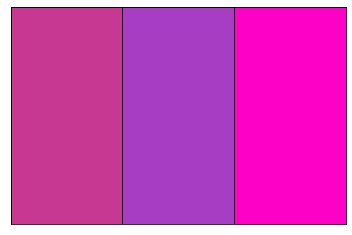

0.1 dark grey CLICK: 1 TRGT: 2


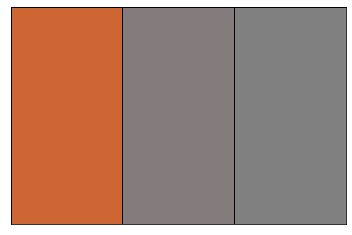

0.2 lime green CLICK: 1 TRGT: 1


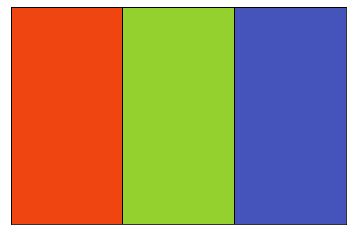

0.3 purple grey CLICK: 0 TRGT: 2


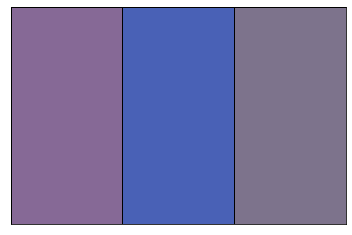

0.4 bright green CLICK: 0 TRGT: 0


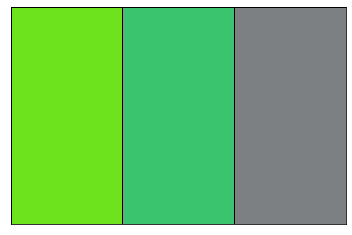

0.5 brown CLICK: 1 TRGT: 1


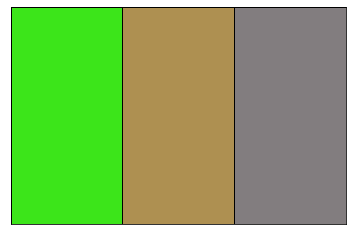

0.6 indigo CLICK: 2 TRGT: 2


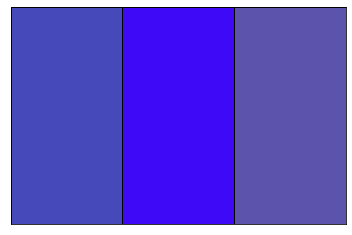

0.7 purple CLICK: 2 TRGT: 0


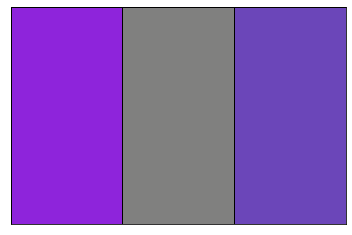

0.8 light blue CLICK: 1 TRGT: 1


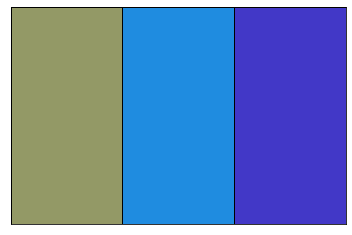

0.9 light violet CLICK: 1 TRGT: 2


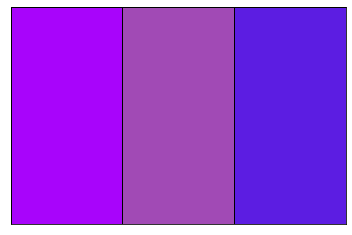

3.0 medium violet red CLICK: 0 TRGT: 1


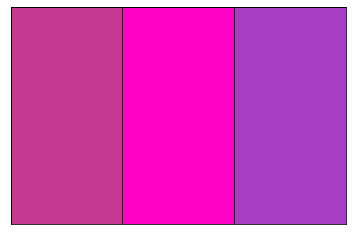

3.1 dim gray CLICK: 0 TRGT: 0


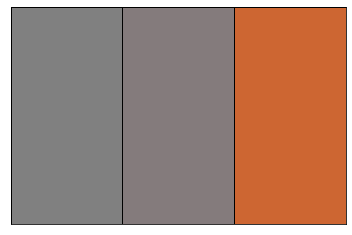

3.2 yellow green CLICK: 2 TRGT: 2


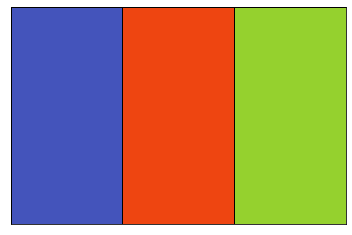

3.3 slate gray CLICK: 0 TRGT: 0


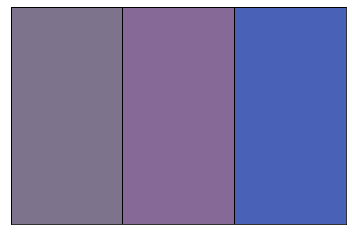

3.4 lawn green CLICK: 0 TRGT: 2


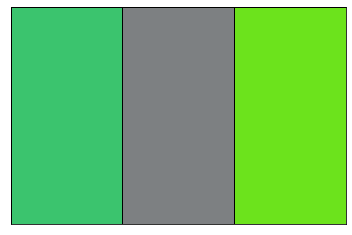

3.5 light brown CLICK: 2 TRGT: 2


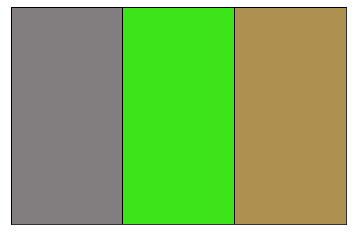

3.6 more purple than blue CLICK: 2 TRGT: 2


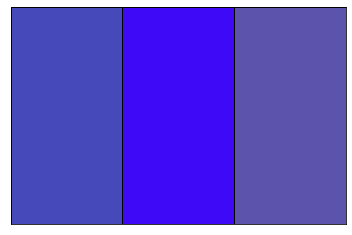

3.7 bright purple CLICK: 0 TRGT: 0


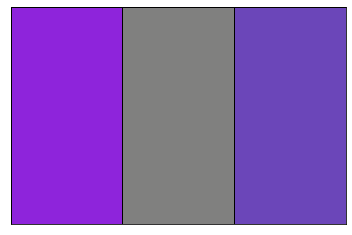

3.8 light blue CLICK: 0 TRGT: 0


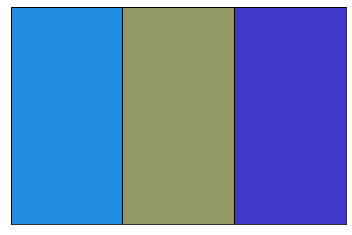

3.9 bluish purple CLICK: 1 TRGT: 0


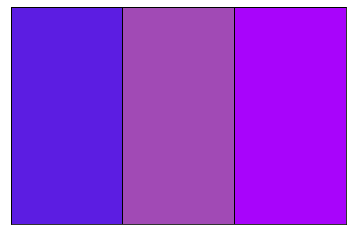

6.0 light pink CLICK: 2 TRGT: 2


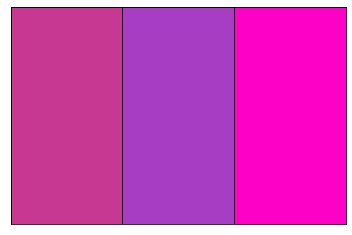

6.1 dark grey CLICK: 0 TRGT: 0


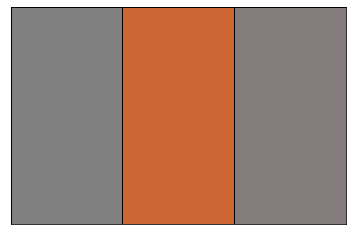

6.2 green CLICK: 2 TRGT: 2


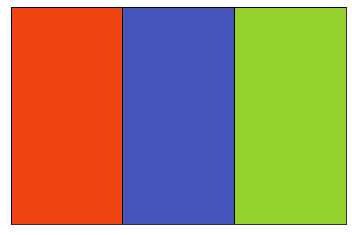

6.3 dark grey CLICK: 2 TRGT: 2


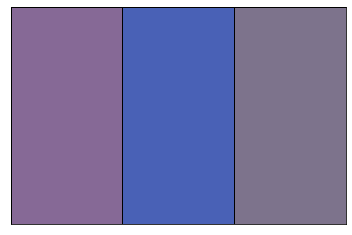

6.4 light green CLICK: 0 TRGT: 0


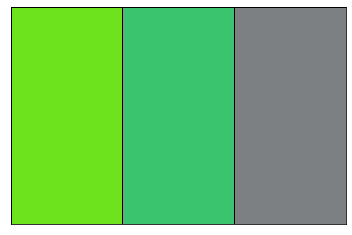

6.5 light brown CLICK: 0 TRGT: 0


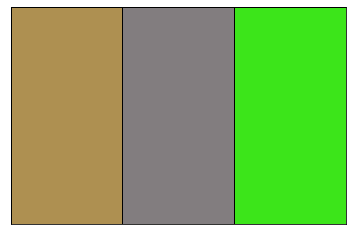

6.6 light blue CLICK: 0 TRGT: 0


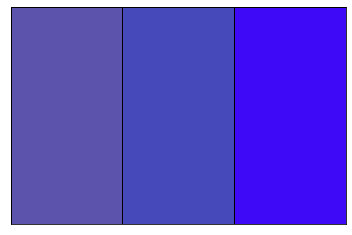

6.7 purple CLICK: 1 TRGT: 1


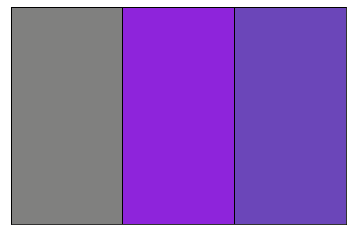

6.8 light blue CLICK: 1 TRGT: 1


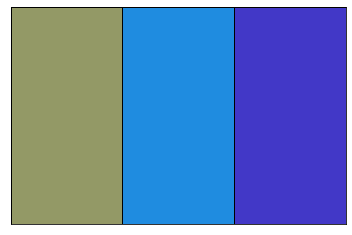

6.9 dark blue CLICK: 1 TRGT: 1


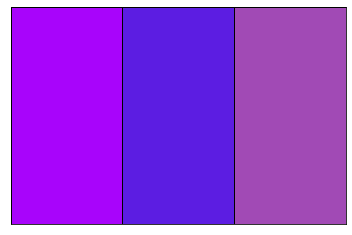

9.0 bright pink CLICK: 0 TRGT: 0


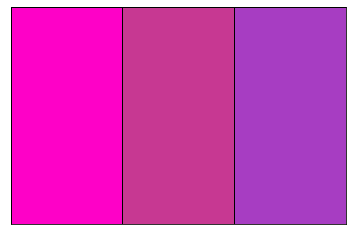

9.1 neutral gray CLICK: 2 TRGT: 2


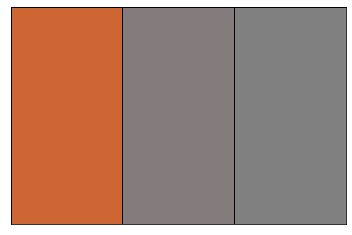

9.2 dark lime green CLICK: 0 TRGT: 0


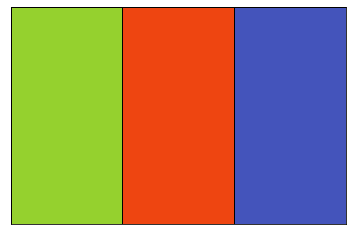

9.3 blue-ish gray CLICK: 2 TRGT: 2


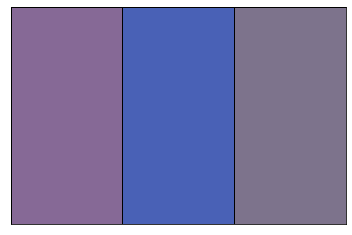

9.4 bright green CLICK: 0 TRGT: 0


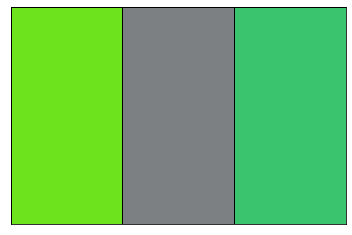

9.5 tan CLICK: 2 TRGT: 2


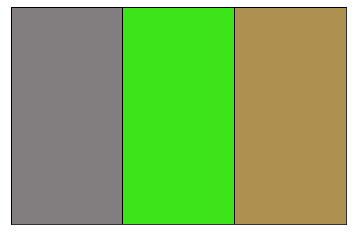

9.6 purple CLICK: 2 TRGT: 1


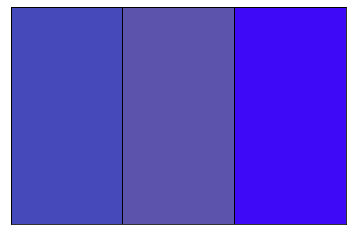

9.7 bright violet CLICK: 0 TRGT: 0


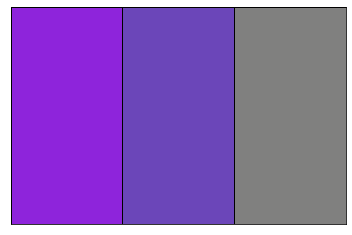

9.8 cerulean blue CLICK: 2 TRGT: 2


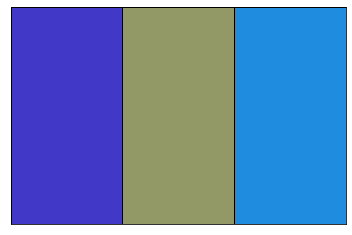

9.9 indigo CLICK: 2 TRGT: 2


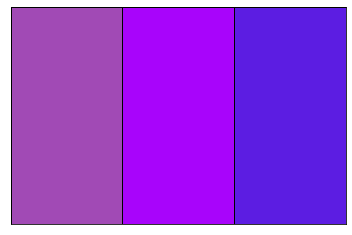

12.0 bright purple CLICK: 1 TRGT: 1


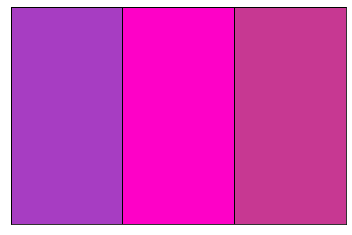

12.1 lighter gray CLICK: 0 TRGT: 0


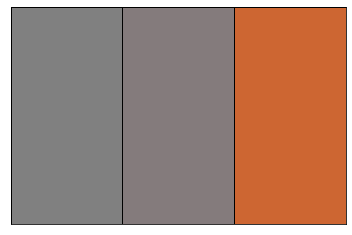

12.2 bright green CLICK: 1 TRGT: 1


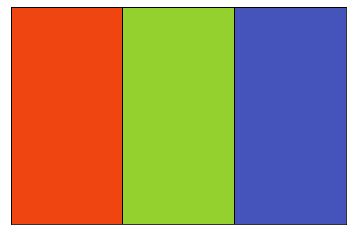

12.3 greyish purple CLICK: 2 TRGT: 0


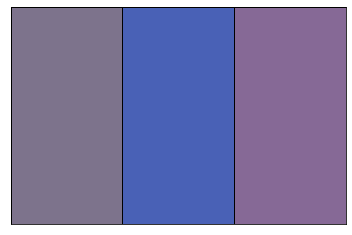

12.4 bright green CLICK: 2 TRGT: 2


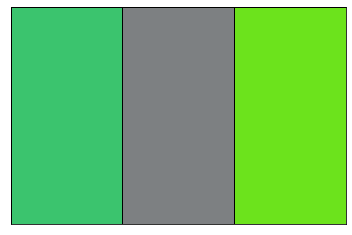

12.5 light brown CLICK: 0 TRGT: 0


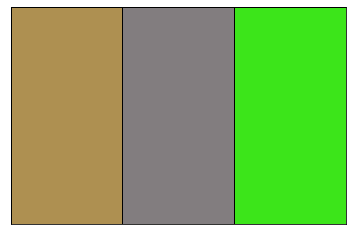

12.6 light purple and dark blue mixed CLICK: 2 TRGT: 0


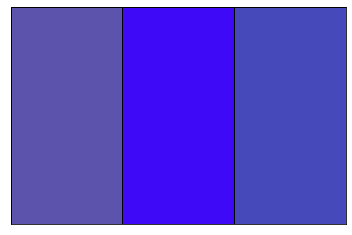

12.7 bright purple CLICK: 2 TRGT: 2


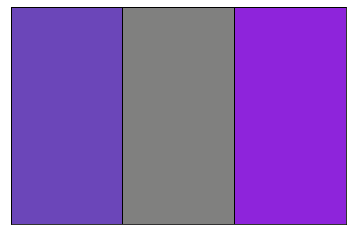

12.8 light blue CLICK: 0 TRGT: 2


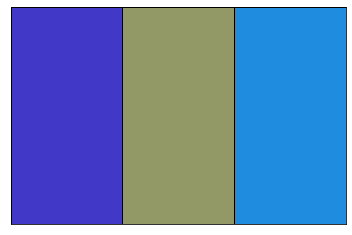

12.9 light deep purple CLICK: 0 TRGT: 2


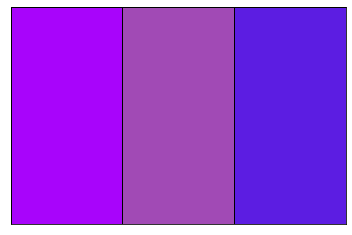

15.0 light green CLICK: 0 TRGT: 0


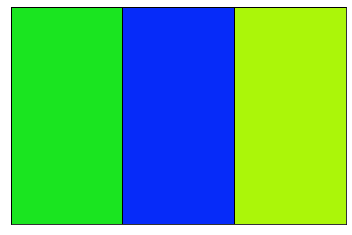

15.1 light purple CLICK: 0 TRGT: 0


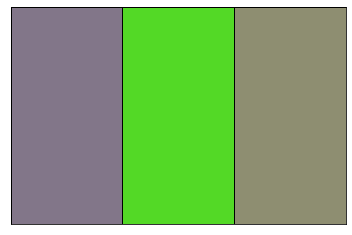

15.2 grey CLICK: 1 TRGT: 0


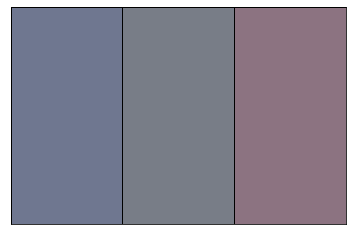

15.3 blue CLICK: 2 TRGT: 2


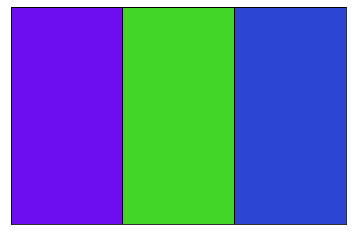

15.4 grey CLICK: 1 TRGT: 1


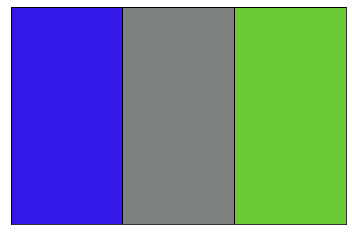

15.5 forest green CLICK: 1 TRGT: 0


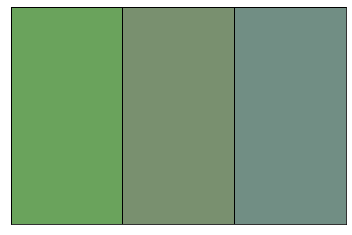

15.6 deep blue CLICK: 2 TRGT: 1


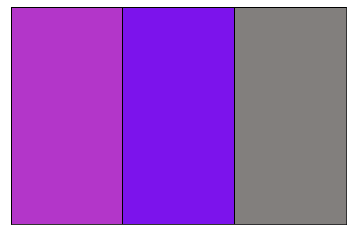

15.7 purple CLICK: 2 TRGT: 2


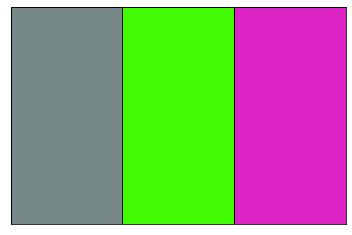

15.8 bright purple CLICK: 2 TRGT: 2


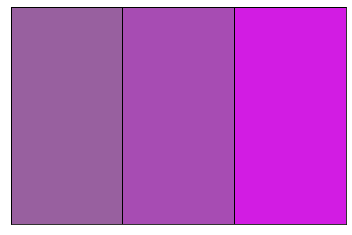

15.9 dull green CLICK: 2 TRGT: 2


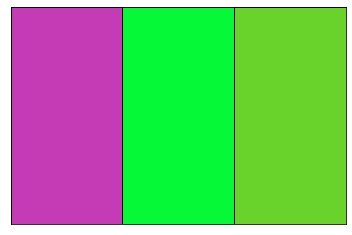

18.0 dark green CLICK: 2 TRGT: 2


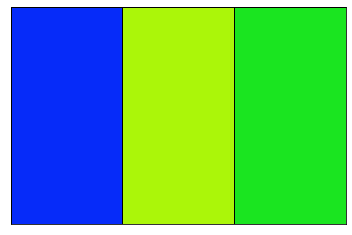

18.1 blue grey CLICK: 0 TRGT: 0


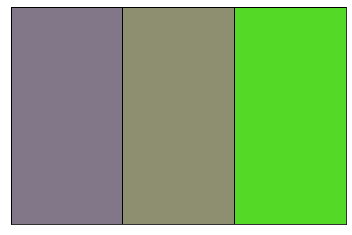

18.2 bright blue grey CLICK: 1 TRGT: 2


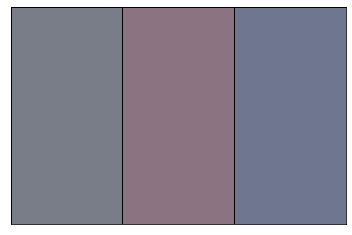

18.3 dark blue CLICK: 0 TRGT: 0


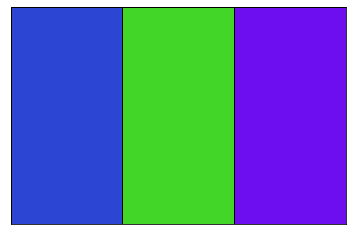

18.4 grey CLICK: 2 TRGT: 2


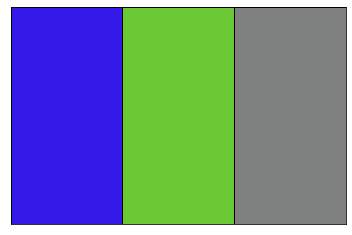

18.5 bright green CLICK: 1 TRGT: 1


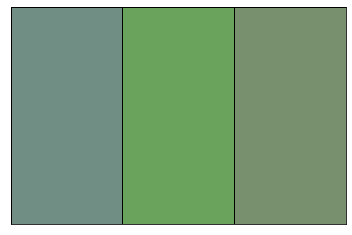

18.6 dark purple CLICK: 1 TRGT: 1


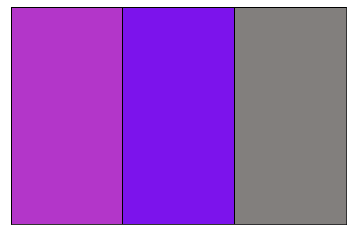

18.7 pink CLICK: 1 TRGT: 1


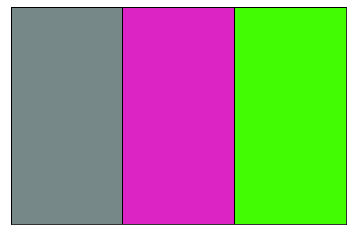

18.8 bright purple CLICK: 1 TRGT: 1


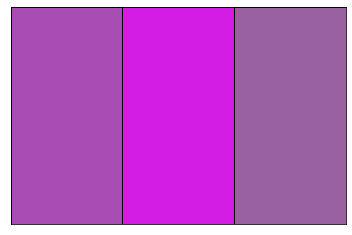

18.9 dark green CLICK: 1 TRGT: 1


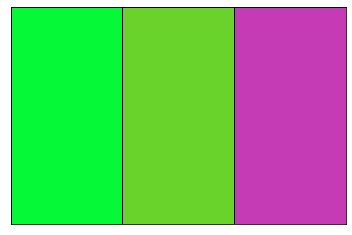

In [58]:
# ok, now let's display these and see what happens: - they look right
for hit_id in range(0,20,3):
    for j in range(10):
        mturk_data_combined_1234.display_custom_game(
            listener_unflipped_colors[hit_id][j],
            "{}.{} {} CLICK: {} TRGT: {}".format(
                hit_id, j, listener_unflipped_descriptions[hit_id][j],
                listener_unflipped_click_idxs[hit_id][j],
                listener_unflipped_target_idxs[hit_id][j]
            )
        )

In [557]:
# These are the things we care about
x = np.where(np.array(listener_unflipped_maj_correct))

In [558]:
listener_unflipped_maj_correct[:5]

[[True, False, True, False, True, True, False, False, True, False],
 [False, True, True, True, False, True, True, True, True, True],
 [True, False, True, True, True, True, False, True, True, True],
 [True, True, True, True, True, True, True, True, True, True],
 [True, True, True, False, True, True, True, True, True, False]]

In [559]:
len(listener_unflipped_maj_correct)

90

In [560]:
# list of all the captions

In [561]:
len(ctx_good_unflipped_comb1234)

900

In [562]:
np.array(listener_unflipped_maj_correct)[5:10, 0]

array([ True,  True,  True,  True, False])

In [59]:
listener_unflipped_maj_correct_reshaped = []
for i in range(0, len(listener_unflipped_maj_correct), 5):
    for j in range(10):
        listener_unflipped_maj_correct_reshaped.extend(np.array(listener_unflipped_maj_correct)[i: i+5, j])

In [60]:
len(listener_unflipped_maj_correct_reshaped)

900

In [61]:
listener_unflipped_maj_correct_reshaped[15:20]

[False, True, True, True, False]

In [62]:
len(np.array(ctx_good_unflipped_comb1234)[listener_unflipped_maj_correct_reshaped])

727

In [63]:
ctx_good_unflipped_approved = []
for i in range(0, len(listener_unflipped_maj_correct_reshaped), 5):
    approved_ctxts = []
    for j in range(5):
        if listener_unflipped_maj_correct_reshaped[i + j]:
            approved_ctxts.append(ctx_good_unflipped_comb1234[i+j])
    ctx_good_unflipped_approved.append(approved_ctxts)

In [64]:
len(ctx_good_unflipped_approved)

180

In [65]:
ctx_good_unflipped_approved[:10]
# THESE ARE WHAT WE NEED. The next step is to include them in our stuff. Filter out bad utterances that are
# also in this list, Add in the monroe data, then run all the metrics on these contexts. 

[[bright pink, Light pink, Bright pink, bright purple],
 [DIM GRAY, Neutral gray, lighter gray],
 [lime green, YELLOW GREEN, Green, Dark lime green, bright green],
 [SLATE GRAY, Dark grey, Blue-ish gray],
 [bright green, Light green, Bright green, bright green],
 [Brown, light brown, light brown, tan, Light brown],
 [more purple than blue, purple, Light purple and dark blue mixed],
 [bright purple, purple, bright violet, Bright purple],
 [Light Blue, light blue, light blue, cerulean blue, Light blue],
 [bluish purple, dark blue, indigo]]

In [66]:
# ok, now we have the other listeners too, so let's do this
# todo tonight: check all of the things people did and then filter out the bad ones
# and put them in a separate csv.
listener_flipped_comb_df = pd.read_csv("../data/mturk/listener_flipped_exp_8_5_2019_results.csv")

In [67]:
listener_flipped_click_idxs = extract_click_idxs(listener_flipped_comb_df)

In [68]:
listener_flipped_click_idxs[:10]

[[0, 2, 1, 2, 0, 0, 1, 2, 1, 1],
 [0, 2, 1, 2, 0, 0, 1, 2, 1, 0],
 [2, 2, 1, 2, 1, 0, 2, 2, 1, 1],
 [1, 1, 2, 0, 2, 0, 2, 0, 0, 0],
 [1, 1, 2, 0, 2, 0, 1, 0, 0, 0],
 [2, 1, 2, 0, 2, 0, 1, 0, 0, 1],
 [0, 2, 2, 0, 1, 0, 0, 1, 1, 1],
 [2, 0, 0, 2, 1, 2, 0, 1, 1, 1],
 [2, 2, 2, 0, 1, 0, 0, 1, 1, 2],
 [0, 2, 0, 2, 0, 2, 2, 0, 2, 2]]

In [69]:
listener_flipped_randorders = extract_field_as_hitarray(listener_flipped_comb_df, "Input.ex{}randorder")
for i in range(len(listener_flipped_randorders)):
    for j in range(len(listener_flipped_randorders[i])):
        listener_flipped_randorders[i][j] = "{:03d}".format(listener_flipped_randorders[i][j])


In [56]:
listener_flipped_randorders[:10]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['021', '210', '021', '210', '021', '120', '102', '012', '210', '210']]

In [70]:
listener_flipped_target_idxs = []
for i in range(len(listener_flipped_randorders)):
    target_idxs = []
    for j in range(len(listener_flipped_randorders[i])):
        target_idxs.append(listener_flipped_randorders[i][j].index('0'))
    listener_flipped_target_idxs.append(target_idxs)

In [71]:
x = np.where(np.array(listener_flipped_target_idxs) == np.array(listener_flipped_click_idxs))

In [72]:
len(x[0])/len(listener_flipped_target_idxs)/10

0.7755555555555556

In [73]:
# what percentage did majority (at lest 2/3) get right? - these are the ones we care aboout
listener_flipped_maj_correct = []
for i in range(0, len(listener_flipped_comb_df), 3):
    maj_correct = []
    for j in range(10):
        num_correct = 0
        for k in range(3):
            # this min thing gives the last guy two votes
            if listener_flipped_click_idxs[min(i + k, len(listener_flipped_comb_df)-1)][j] == listener_flipped_target_idxs[i][j]:
                num_correct += 1
        maj_correct.append(num_correct >= 2)
    listener_flipped_maj_correct.append(maj_correct)

In [74]:
len(np.where(listener_flipped_maj_correct)[0])/len(listener_flipped_maj_correct)

8.044444444444444

In [75]:
# what percentage did at least 2/3 agree?
listener_flipped_maj_agree = []
for i in range(0, len(listener_flipped_comb_df), 3):
    maj_agree = []
    for j in range(10):
        click_idxs = set()
        for k in range(3):
            click_idxs.add(listener_flipped_click_idxs[min(i + k, len(listener_flipped_comb_df)-1)][j])
        maj_agree.append(len(click_idxs) <= 2)
    listener_flipped_maj_agree.append(maj_agree)

In [76]:
len(np.where(listener_flipped_maj_agree)[0])/len(listener_flipped_maj_correct)

9.922222222222222

In [77]:
listener_flipped_maj_correct_reshaped = []
for i in range(0, len(listener_flipped_maj_correct), 5):
    for j in range(10):
        listener_flipped_maj_correct_reshaped.extend(np.array(listener_flipped_maj_correct)[i: i+5, j])

In [78]:
ctx_good_flipped_approved = []
for i in range(0, len(listener_flipped_maj_correct_reshaped), 5):
    approved_ctxts = []
    for j in range(5):
        if listener_flipped_maj_correct_reshaped[i + j]:
            approved_ctxts.append(ctx_good_flipped_comb1234[i+j])
    ctx_good_flipped_approved.append(approved_ctxts)

In [67]:
ctx_good_flipped_approved[:10]

[[violate, light Purple, purple, dark purple],
 [foghat gray, brown gray, dark grey],
 [sky blue, blue, dark violet, navy blue, blue],
 [sky blue, light blue, navy blue, blue],
 [light green, dark green, Christmas green, dark green],
 [Dark Grey, gray, grey],
 [Dark Blue, dark blue],
 [dark purple, Dark Purple, Dusty grape],
 [khaki, olive green, Light Brown, Olive, light grey],
 [bright pink, Light Purple, Bright purple]]

In [79]:
# let's take a look at these:
listener_flipped_colors, listener_flipped_descriptions = extract_colors_and_descriptions(listener_flipped_comb_df)

In [929]:
listener_flipped_descriptions[:6]

[['pale purple',
  'foghat gray',
  'sky blue',
  'sky blue',
  'light green',
  'green',
  'dark blue',
  'violet',
  'khaki',
  'violet'],
 ['pale purple',
  'foghat gray',
  'sky blue',
  'sky blue',
  'light green',
  'green',
  'dark blue',
  'violet',
  'khaki',
  'violet'],
 ['pale purple',
  'foghat gray',
  'sky blue',
  'sky blue',
  'light green',
  'green',
  'dark blue',
  'violet',
  'khaki',
  'violet'],
 ['violate',
  'gray',
  'blue',
  'light blue',
  'dark green',
  'light brown',
  'dark blue',
  'dark purple',
  'olive green',
  'bright pink'],
 ['violate',
  'gray',
  'blue',
  'light blue',
  'dark green',
  'light brown',
  'dark blue',
  'dark purple',
  'olive green',
  'bright pink'],
 ['violate',
  'gray',
  'blue',
  'light blue',
  'dark green',
  'light brown',
  'dark blue',
  'dark purple',
  'olive green',
  'bright pink']]

In [592]:
# let's prepare the bad ones for tommorrow assuming we have no scammers
len(ctx_bad_flipped_comb1234)

900

In [80]:
ctx_bad_unflipped_approved = []
for i in range(len(ctx_good_unflipped_approved)):
    good_caps = [de.caption for de in ctx_good_unflipped_approved[i]]
    bad_ctx_app = []
    for j in range(5):
        if ctx_bad_unflipped_comb1234[5*i + j].caption not in good_caps:
            bad_ctx_app.append(ctx_bad_unflipped_comb1234[5*i + j])
    ctx_bad_unflipped_approved.append(bad_ctx_app)

In [81]:
# track which contexts we kept and which we 
ctx_bad_unflipped_approved_bool = []
for i in range(len(ctx_good_unflipped_approved)):
    good_caps = [de.caption for de in ctx_good_unflipped_approved[i]] # note these should be normalized (8/20/2019)
    bad_ctx_app = []
    for j in range(5):
        bad_ctx_app.append(ctx_bad_unflipped_comb1234[5*i + j].caption not in good_caps) # note these should be normalized(8/20/2019)
    ctx_bad_unflipped_approved_bool.append(bad_ctx_app)

In [82]:
ctx_bad_flipped_approved = []
for i in range(len(ctx_good_flipped_approved)):
    good_caps = [de.caption for de in ctx_good_flipped_approved[i]]
    bad_ctx_app = []
    for j in range(5):
        if ctx_bad_flipped_comb1234[5*i + j].caption not in good_caps:
            bad_ctx_app.append(ctx_bad_flipped_comb1234[5*i + j])
    ctx_bad_flipped_approved.append(bad_ctx_app)

In [83]:
ctx_bad_flipped_approved_bool = []
for i in range(len(ctx_good_flipped_approved)):
    # note these should be normalized (8/20/2019)
    good_caps = [de.caption for de in ctx_good_flipped_approved[i]]
    bad_ctx_app = []
    for j in range(5):
        bad_ctx_app.append(ctx_bad_flipped_comb1234[5*i + j].caption not in good_caps)

    ctx_bad_flipped_approved_bool.append(bad_ctx_app)

In [84]:
ctx_bad_unflipped_approved_bool[:10]

[[False, True, True, True, True],
 [True, True, True, True, True],
 [False, True, True, False, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [False, True, False, True, False],
 [True, False, True, True, True],
 [True, False, False, False, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [85]:
ctx_bad_flipped_approved_bool[:10]

[[True, False, False, False, True],
 [True, True, True, True, True],
 [True, False, True, True, True],
 [True, False, True, True, True],
 [True, False, True, True, True],
 [True, True, True, True, False],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [86]:
normalize(ctx_bad_unflipped_approved[:10][0][0].caption)

'violet'

In [87]:
sum([len(bc) for bc in ctx_bad_unflipped_approved])

774

In [88]:
sum([len(bc) for bc in ctx_bad_flipped_approved])

738

In [89]:
def bad_ctxs_to_csv_datasets(bad_ctxs):
    # we can (and will) convert the other way by using bad_ctxs to get the shape
    # and reading off the contexts one at a time
    num_ctxs = sum([len(bc) for bc in bad_ctxs])
    num_hits = num_ctxs // 10 + 1
    csv_datasets = [[] for _ in range(num_hits)]
    csv_counter = 0
    for same_ctx in bad_ctxs:
        for ctx in same_ctx:
            csv_datasets[csv_counter % num_hits].append(ctx)
            csv_counter += 1
    return csv_datasets



In [90]:
ctx_bad_unflipped_datasets = bad_ctxs_to_csv_datasets(ctx_bad_unflipped_approved)

In [91]:
ctx_bad_unflipped_datasets[:10]

[[VIOLET, green, brown, Brown, green, green, drab, Bright, green, light green],
 [Pink, Green, gray, lime, bright, sage, gray, bright, green, green],
 [Pink,
  it means go,
  Gray,
  Yellow,
  Green,
  Dark Grey (This is ambiguous because it describes the both the light green target and the dark blue color.),
  blue,
  violet,
  green,
  green],
 [purple, Green, Gray, yellow, green, Blue, gray, Purple, Green, green],
 [dark grey, Green, Gray, yellowish, lemon, blue, Grey, dark, green, green],
 [GRAY,
  Midnight Blue,
  gray,
  Yellow,
  pastel,
  bright,
  gray,
  grey,
  green,
  puke green],
 [Grey,
  dark,
  grey,
  shade of blue,
  greenish,
  berry,
  reddish,
  Dark,
  blue,
  green],
 [Grey,
  cool color,
  Cool,
  bright blue,
  Turquoise,
  Blue (This is ambiguous because it describes the both the Dark purple target and the Brown color.),
  red,
  green,
  blue,
  green],
 [grey, Blue., Gray, Blue, light color, purple, red, Bright, blue, green],
 [YELLOW,
  light green,
  Purp

In [92]:
for i in range(1, 7):
    ctx_bad_unflipped_datasets[-i].append(ctx_bad_unflipped_datasets[0][0])

In [93]:
ctx_bad_flipped_datasets = bad_ctxs_to_csv_datasets(ctx_bad_flipped_approved)

In [94]:
for i in range(1, 3):
    ctx_bad_flipped_datasets[-i].append(ctx_bad_flipped_datasets[0][0])

In [95]:
bad_unflipped_csvs = contexts_to_csv_rows(ctx_bad_unflipped_datasets)
bad_flipped_csvs = contexts_to_csv_rows(ctx_bad_flipped_datasets)

NameError: name 'contexts_to_csv_rows' is not defined

dark grey


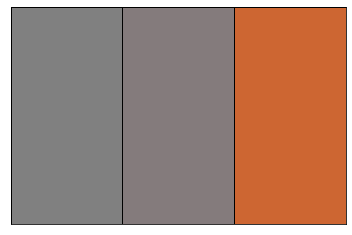

In [635]:
mturk_data_combined_1234.display_custom_game(ctx_bad_unflipped_datasets[4][0].colors, ctx_bad_unflipped_datasets[4][0].caption)


In [640]:
152*3*0.2

91.2

In [641]:
with open("../data/mturk/listener_bad_unflipped_exp_8_6_2019.csv", "w") as lcsv:
    lcsv.write("\n".join([listener_validation_header_str] + bad_unflipped_csvs))
    
with open("../data/mturk/listener_bad_flipped_exp_8_7_2019.csv", "w") as lcsv:
    lcsv.write("\n".join([listener_validation_header_str] + bad_flipped_csvs))
    

In [624]:
max([len(cb) for cb in ctx_bad_flipped_datasets])

10

# Analysis starts here

In [603]:
ctx_bad_flipped_approved[:10]

[[pink, lilac],
 [gray, dark gray, grey, gray, ash],
 [bright, violet, color in the rainbow, royal],
 [pale, violet, color in the rainbow, navy],
 [green, green, green, green],
 [Green, brown, Grey, Neutral],
 [Blue, blue, Blue, Blue, blue],
 [violet, purple, Purple, Purple, purple],
 [blue, green, Brown, Murky, greyish],
 [violet, pink, Purple, purple, pinkish]]

In [13]:
# write a thing to add the listener data to the dataframe
mturk_data_combined_1234_df = copy.deepcopy(mturk_data_combined_1234.data)

In [14]:
# ok, there's actually a bug in the dataframe, I mispelled a (relatively unimportant) column name, so an extra
# column was added.
mturk_data_combined_1234_df['alt2LocL'] = mturk_data_combined_1234_df['alt12LocL']

KeyError: 'alt12LocL'

In [650]:
mturk_data_combined_1234_df = mturk_data_combined_1234_df.drop(columns=['alt12LocL'])

In [652]:
mturk_data_combined_1234_df.to_csv("../data/csv/mturk_augmented_data_exp1234.csv", index=False)

In [ ]:
# ok, now let's actually add the listener data to the dataframe
[0, 2, 4, 6, 8], [20, 22, 24, 26, 28]

In [664]:
# 0 -> 0
# 2 -> 1
# ...
# 10 -> 0
# 12 -> 1
for i in range(0, 60, 2):
    print(5 * (i//20) + (i % 10)//2)

0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
5
6
7
8
9
10
11
12
13
14
10
11
12
13
14


array([ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  5,  6,
        7,  8,  9, 10])

In [74]:
for i in range(0, len(mturk_data_combined_1234_df), 2):
    # this is a bit of a crazy expression, but:
    # i // 20 - how many color contexts we've passed (flipped/unflipped) - each of these represents 5
    # items in the listener_[un]flipped_maj_correct_reshaped_list, which gives us
    # 5 (i // 20)
    # and then we have the offset into the list which recurrs every 10 dataframe items, and because
    # we only care about the good ones, and are counting by 2's, we have to divide by 2 to get to
    # the listener index:
    # ( i % 10) // 2
    #
    # the listner indexes are equivalent to iterating over this np array
    # np.repeat(np.arange(900).reshape(-1, 5), 2, axis=0).flatten()
    listener_idx = 5 * (i // 20) + (i % 10) // 2
    if i % 20 < 10: # unflipped
        mturk_data_combined_1234_df.loc[i, "outcome"] = listener_unflipped_maj_correct_reshaped[listener_idx]
    else: # flipped
        mturk_data_combined_1234_df.loc[i, "outcome"] = listener_flipped_maj_correct_reshaped[listener_idx]

In [674]:
mturk_data_combined_1234_df.to_csv("../data/csv/mturk_augmented_data_exp1234_filtered.csv", index=False)

In [75]:
listener_unflipped_maj_correct_reshaped[:10]

[True, False, True, True, True, False, True, False, True, True]

In [657]:
ctx_good_unflipped_comb1234[:10]

[bright pink,
 MEDIUM VIOLET RED,
 Light pink,
 Bright pink,
 bright purple,
 dark grey,
 DIM GRAY,
 Dark grey,
 Neutral gray,
 lighter gray]

In [658]:
len(mturk_data_combined_1234_df)

3600

In [660]:
len(listener_unflipped_maj_correct_reshaped) * 4

3600

In [673]:
mturk_data_combined_1234_df.head().T

,0,1,2,3,4
gameid,1.1-good-unflipped,1.1-bad-unflipped,1.2-good-unflipped,1.2-bad-unflipped,1.3-good-unflipped
clkTime,NaN,NaN,NaN,NaN,NaN
roundNum,NaN,NaN,NaN,NaN,NaN
condition,close,close,close,close,close
clickStatus,target,target,target,target,target
clickColH,313,313,313,313,313
clickColS,99,99,99,99,99
clickColL,50,50,50,50,50
clickLocS,0,0,0,0,0
clickLocL,0,0,0,0,0


In [19]:
# now let's make sure we have no scammers
import json

In [96]:
# now we read in the ambiguous caption results:
listener_bad_unflipped_df = pd.read_csv("../data/mturk/listener_bad_unflipped_exp_8_6_2019_results.csv")
listener_bad_flipped_df = pd.read_csv("../data/mturk/listener_bad_flipped_exp_8_7_2019_results.csv")

In [97]:
listener_bad_unflipped_click_idxs = extract_click_idxs(listener_bad_unflipped_df)
listener_bad_flipped_click_idxs = extract_click_idxs(listener_bad_flipped_df)

In [98]:
listener_bad_unflipped_click_idxs[:3]

[[2, 2, 1, 2, 1, 2, 0, 0, 1, 0],
 [1, 1, 1, 2, 1, 2, 0, 0, 1, 1],
 [1, 1, 1, 2, 1, 2, 0, 0, 1, 1]]

In [99]:
listener_bad_unflipped_randorders = extract_field_as_hitarray(listener_bad_unflipped_df, "Input.ex{}randorder")
for i in range(len(listener_bad_unflipped_randorders)):
    for j in range(len(listener_bad_unflipped_randorders[i])):
        listener_bad_unflipped_randorders[i][j] = "{:03d}".format(listener_bad_unflipped_randorders[i][j])

listener_bad_flipped_randorders = extract_field_as_hitarray(listener_bad_flipped_df, "Input.ex{}randorder")
for i in range(len(listener_bad_flipped_randorders)):
    for j in range(len(listener_bad_flipped_randorders[i])):
        listener_bad_flipped_randorders[i][j] = "{:03d}".format(listener_bad_flipped_randorders[i][j])


In [100]:
listener_bad_unflipped_randorders[:2]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120']]

In [101]:
listener_bad_unflipped_target_idxs = []
for i in range(len(listener_bad_unflipped_randorders)):
    target_idxs = []
    for j in range(len(listener_bad_unflipped_randorders[i])):
        target_idxs.append(listener_bad_unflipped_randorders[i][j].index('0'))
    listener_bad_unflipped_target_idxs.append(target_idxs)
    
listener_bad_flipped_target_idxs = []
for i in range(len(listener_bad_flipped_randorders)):
    target_idxs = []
    for j in range(len(listener_bad_flipped_randorders[i])):
        target_idxs.append(listener_bad_flipped_randorders[i][j].index('0'))
    listener_bad_flipped_target_idxs.append(target_idxs)

In [102]:
listener_bad_unflipped_target_idxs[:4]

[[2, 2, 1, 2, 0, 1, 2, 0, 1, 2],
 [2, 2, 1, 2, 0, 1, 2, 0, 1, 2],
 [2, 2, 1, 2, 0, 1, 2, 0, 1, 2],
 [1, 0, 2, 0, 2, 2, 2, 0, 0, 0]]

In [103]:
listener_bad_unflipped_randorders[:10]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['210', '021', '210', '210', '012', '012', '012', '201', '102', '102'],
 ['021', '210', '021', '210', '021', '120', '102', '012', '210', '210']]

In [104]:
bad_unflipped_target_idx_reshaped = [[] for _ in range(len(ctx_bad_unflipped_approved))]
bad_unflipped_click_idx_reshaped = [[] for _ in range(len(ctx_bad_unflipped_approved))]
bad_unflipped_randorders_reshaped = [[] for _ in range(len(ctx_bad_unflipped_approved))]

a = 0
for i in range(10):
    for j in range(0, len(listener_bad_unflipped_target_idxs), 3):
        bad_unflipped_target_idx_reshaped[a].append(listener_bad_unflipped_target_idxs[j][i])
        bad_unflipped_randorders_reshaped[a].append(listener_bad_unflipped_randorders[j][i])
        click_idxs = []
        for k in range(3):
            click_idxs.append(listener_bad_unflipped_click_idxs[j+k][i])
        bad_unflipped_click_idx_reshaped[a].append(click_idxs)
        if len(bad_unflipped_target_idx_reshaped[a]) >= len(ctx_bad_unflipped_approved[a]):
            a += 1


IndexError: list index out of range

In [105]:
ctx_bad_unflipped_approved[:5]

[[VIOLET, Pink, Pink, purple],
 [dark grey, GRAY, Grey, Grey, grey],
 [YELLOW, Dark color, green],
 [purple grey, GRAY, Grey, Gray, purple],
 [lime green, GREEN, Green, Green, green]]

In [106]:
bad_unflipped_click_idx_reshaped[:10]

[[[2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]],
 [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]],
 [[0, 2, 2], [0, 0, 2], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
 [[2, 2, 2], [0, 1, 0], [2, 2, 2], [0, 0, 0], [1, 1, 2]],
 [[0, 0, 2], [1, 1, 1]],
 [[2, 1, 1], [0, 0, 0], [0, 1, 0], [2, 2, 0]],
 [[0, 0, 0], [2, 2, 2]],
 [[2, 1, 2], [1, 1, 1], [0, 0, 0], [0, 0, 1], [2, 1, 1]],
 [[0, 0, 0], [2, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0]]]

In [107]:
bad_unflipped_target_idx_reshaped[:10]

[[2, 1, 2, 0],
 [1, 0, 2, 0, 1],
 [2, 1, 1],
 [2, 0, 0, 1, 0],
 [2, 0, 1, 1, 2],
 [0, 1],
 [1, 2, 1, 2],
 [0, 2],
 [1, 0, 0, 1, 2],
 [2, 2, 1, 2, 2]]

In [239]:
bad_unflipped_randorders_reshaped[:10]

[['210', '201', '210', '021'],
 ['102', '021', '210', '012', '201'],
 ['210', '102', '201'],
 ['210', '012', '021', '201', '012'],
 ['120', '012', '201', '102', '210'],
 ['021', '201'],
 ['201', '210', '102', '120'],
 ['021', '210'],
 ['102', '021', '021', '201', '120'],
 ['120', '210', '102', '210', '120']]

In [206]:
len(listener_bad_unflipped_target_idxs)

234

In [108]:
bad_flipped_target_idx_reshaped = [[] for _ in range(len(ctx_bad_flipped_approved))]
bad_flipped_click_idx_reshaped = [[] for _ in range(len(ctx_bad_flipped_approved))]
bad_flipped_randorders_reshaped = [[] for _ in range(len(ctx_bad_flipped_approved))]

a = 0
for i in range(10):
    for j in range(0, len(listener_bad_flipped_target_idxs), 3):
        bad_flipped_target_idx_reshaped[a].append(listener_bad_flipped_target_idxs[j][i])
        bad_flipped_randorders_reshaped[a].append(listener_bad_flipped_randorders[j][i])
        click_idxs = []
        for k in range(3):
            click_idxs.append(listener_bad_flipped_click_idxs[j+k][i])
        bad_flipped_click_idx_reshaped[a].append(click_idxs)
        if len(bad_flipped_target_idx_reshaped[a]) >= len(ctx_bad_flipped_approved[a]):
            a += 1



IndexError: list index out of range

In [243]:
bad_flipped_click_idx_reshaped[:5]

[[[1, 1, 1], [1, 1, 1]],
 [[1, 1, 2], [0, 2, 2], [1, 0, 0], [2, 2, 2], [1, 1, 1]],
 [[2, 1, 1], [1, 1, 1], [2, 0, 2], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0]],
 [[2, 1, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]

In [242]:
bad_flipped_randorders_reshaped[:5]

[['210', '201'],
 ['210', '021', '102', '021', '210'],
 ['012', '201', '210', '102'],
 ['201', '210', '012', '021'],
 ['201', '012', '120', '012']]

In [109]:
sum(len(x) for x in bad_flipped_click_idx_reshaped)

738

In [110]:
sum(len(x) for x in ctx_bad_flipped_approved)

738

In [111]:
from collections import defaultdict
import pickle as pkl

with open("../data/metric_comparison_indices/all_augmented_dev_indices", "rb") as pfile:
    dev_data_indices = pkl.load(pfile)

with open("../data/metric_comparison_indices/dev_evaluation_indices.pkl", "rb") as pfile:
     dev_eval_indices = pkl.load(pfile)
        
dev_eval_triples = np.array(dev_eval_indices) - 15665

ctx_good_unflipped_monroe = defaultdict(set) # to use our listener/speaker metrics, we just have to put the values into a list
ctx_good_flipped_monroe = defaultdict(set)

for triple in dev_eval_triples:
    # triple = [ref, bad, good]
    ref_id, bad_id, good_id = triple
    if ref_id in dev_data_indices: # we gave the reference to turkers for augmentation
        ctx_good_unflipped_monroe[ref_id].add(ref_id)
        ctx_good_unflipped_monroe[ref_id].add(good_id)
        ctx_good_flipped_monroe[ref_id].add(bad_id)

In [112]:
def combine_ours_monroe(ctx_ours, ctx_monroe, maj_correct):
    
    ctx_grouped = []

    for i, dev_idx in enumerate(dev_data_indices[:len(mturk_data_combined_1234)//20]): # explaination of 20 above
        # access i's references in the newly collected data, don't worry about filtering because all of the good
        # samples are there. We can just append to reference captions and then do the filtering again I guess

        # at the beginning, before filtering, ref captions has 5 repeated captions
        
        reference_ctxs = (copy.deepcopy([ctx_ours[5*i + j] for j in range(5) if maj_correct[5*i + j]]) +
                            [copy.deepcopy(dev_data[ci]) for ci in ctx_monroe[dev_idx]])
        ctx_grouped.append(reference_ctxs)
        
    return ctx_grouped

In [113]:
ctx_good_unflipped_1234monroe = combine_ours_monroe(ctx_good_unflipped_comb1234, ctx_good_unflipped_monroe, listener_unflipped_maj_correct_reshaped)
ctx_good_flipped_1234monroe = combine_ours_monroe(ctx_good_flipped_comb1234, ctx_good_flipped_monroe, listener_flipped_maj_correct_reshaped)

In [114]:
sum(len(x) for x in ctx_good_unflipped_1234monroe)

971

In [115]:
counter = 0
for i in range(0, len(ctx_bad_flipped_comb1234), 5):
    refs = [normalize(c.caption) for c in ctx_good_flipped_1234monroe[i//5]]
    for j in range(5): # len(ctx_bad_unflipped_comb1234[i])):
        if normalize(ctx_bad_flipped_comb1234[i + j].caption) in refs:
            continue
        else:
            counter += 1

In [118]:
len(ctx_bad_flipped_comb1234)

900

In [117]:
counter

659

In [218]:
bad_unflipped_click_idx_reshaped[:5]

[[[2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]],
 [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]],
 [[0, 2, 2], [0, 0, 2], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
 [[2, 2, 2], [0, 1, 0], [2, 2, 2], [0, 0, 0], [1, 1, 2]]]

In [116]:
bad_unflipped_monroe_filter = []
for i, ctxs in enumerate(ctx_bad_unflipped_approved):
    refs = [normalize(c.caption) for c in ctx_good_unflipped_1234monroe[i]]
    filt = []
    for j in range(len(ctx_bad_unflipped_approved[i])):
        filt.append(not normalize(ctx_bad_unflipped_approved[i][j].caption) in refs)
    bad_unflipped_monroe_filter.append(filt)
    
bad_flipped_monroe_filter = []
for i, ctxs in enumerate(ctx_bad_flipped_approved):
    refs = [normalize(c.caption) for c in ctx_good_flipped_1234monroe[i]]
    filt = []
    for j in range(len(ctx_bad_flipped_approved[i])):
        filt.append(not normalize(ctx_bad_flipped_approved[i][j].caption) in refs)
    bad_flipped_monroe_filter.append(filt)

In [149]:
ctx_bad_unflipped_approved[:3]

[[VIOLET, Pink, Pink, purple],
 [dark grey, GRAY, Grey, Grey, grey],
 [YELLOW, Dark color, green]]

In [150]:
bad_unflipped_monroe_filter[:4]

[[True, True, True, True],
 [True, True, True, True, True],
 [True, True, False],
 [True, True, True, True, True]]

In [165]:
bad_unflipped_ctx_human_mf = []
for i in range(len(ctx_bad_unflipped_approved)):
    for j in range(len(ctx_bad_unflipped_approved[i])):
        if bad_unflipped_monroe_filter[i][j]:
            for k in range(3):
                ctx = copy.deepcopy(ctx_bad_unflipped_approved[i][j])
                ctx.outcome = int(bad_unflipped_target_idx_reshaped[i][j] == bad_unflipped_click_idx_reshaped[i][j][k])
                bad_unflipped_ctx_human_mf.append(ctx)


bad_flipped_ctx_human_mf = []
for i in range(len(ctx_bad_flipped_approved)):
    for j in range(len(ctx_bad_flipped_approved[i])):
        if bad_flipped_monroe_filter[i][j]:
            for k in range(3):
                ctx = copy.deepcopy(ctx_bad_flipped_approved[i][j])
                ctx.outcome = int(bad_flipped_target_idx_reshaped[i][j] == bad_flipped_click_idx_reshaped[i][j][k])
                bad_flipped_ctx_human_mf.append(ctx)




In [166]:
len(bad_flipped_ctx_human_mf)

1977

In [170]:
bad_flipped_ctx_human_mf[3:6]

[lilac, lilac, lilac]

In [177]:
bad_flipped_click_idx_reshaped[0][1]

[1, 1, 1]

In [178]:
bad_flipped_target_idx_reshaped[0][1]

1

In [171]:
[c.outcome for c in bad_flipped_ctx_human_mf[3:6]]

[1, 1, 1]

In [118]:
# now just calculate the scores directly:
bad_unflipped_scores_human_mf = []

for i in range(len(bad_unflipped_monroe_filter)):
    for j in range(len(bad_unflipped_monroe_filter[i])):
        if bad_unflipped_monroe_filter[i][j]:
            for k in range(3):
                bad_unflipped_scores_human_mf.append(
                    int(bad_unflipped_target_idx_reshaped[i][j] == bad_unflipped_click_idx_reshaped[i][j][k])
                )
            

bad_flipped_scores_human_mf = []

for i in range(len(bad_flipped_monroe_filter)):
    for j in range(len(bad_flipped_monroe_filter[i])):
        if bad_flipped_monroe_filter[i][j]:
            for k in range(3):
                bad_flipped_scores_human_mf.append(
                    int(bad_flipped_target_idx_reshaped[i][j] == bad_flipped_click_idx_reshaped[i][j][k])
                )
            

In [169]:
bad_flipped_scores_human_mf[3:6]

[1, 1, 1]

In [119]:
np.mean(bad_flipped_scores_human_mf)

0.45472938796155793

In [124]:
bad_unflipped_click_idx_reshaped[:4]

[[[2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]],
 [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]],
 [[0, 2, 2], [0, 0, 2], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]]]

In [125]:
counter

659

In [862]:
659 + 684

1343

In [837]:
counter

90

In [120]:
counter = 0
for i, ctxs in enumerate(ctx_bad_flipped_approved):
    refs = [normalize(c.caption) for c in ctx_good_flipped_1234monroe[i]]
    for j in range(len(ctx_bad_flipped_approved[i])):
        if normalize(ctx_bad_flipped_approved[i][j].caption) in refs:
            counter += 1

In [121]:
counter

79

In [128]:
ctx_bad_unflipped_approved[:3]

[[VIOLET, Pink, Pink, purple],
 [dark grey, GRAY, Grey, Grey, grey],
 [YELLOW, Dark color, green]]

In [842]:
ctx_good_unflipped_1234monroe[:3]

[[bright pink,
  Light pink,
  Bright pink,
  bright purple,
  brightest color,
  Lightest shade],
 [DIM GRAY,
  Neutral gray,
  lighter gray,
  grey. looks less purple than the other one.,
  grey grey],
 [lime green,
  YELLOW GREEN,
  Green,
  Dark lime green,
  bright green,
  the green,
  green]]

In [129]:
len(ctx_good_unflipped_1234monroe)

180

In [130]:
len(ctx_bad_unflipped_approved)

180

In [131]:
sum(len(x) for x in ctx_good_unflipped_1234monroe)

971

In [132]:
sum(len(x) for x in ctx_good_flipped_1234monroe)

941

In [122]:
x = np.where(np.array(listener_bad_unflipped_target_idxs) == np.array(listener_bad_unflipped_click_idxs))
len(x[0])/len(listener_bad_unflipped_target_idxs)/10

0.47948717948717945

In [123]:
x = np.where(np.array(listener_bad_flipped_target_idxs) == np.array(listener_bad_flipped_click_idxs))
len(x[0])/len(listener_bad_flipped_target_idxs)/10

0.4873873873873874

In [124]:
# what percentage did majority (at lest 2/3) get right? - these are the ones we care aboout
listener_bad_unflipped_maj_correct = []
for i in range(0, len(listener_bad_unflipped_df), 3):
    maj_correct = []
    for j in range(10):
        num_correct = 0
        for k in range(3):
            # this min thing gives the last guy two votes
            if listener_bad_unflipped_click_idxs[i + k][j] == listener_bad_unflipped_target_idxs[i][j]:
                num_correct += 1
        maj_correct.append(num_correct >= 2)
    listener_bad_unflipped_maj_correct.append(maj_correct)
    
len(np.where(listener_bad_unflipped_maj_correct)[0])/(10*len(listener_bad_unflipped_maj_correct))

0.4705128205128205

In [125]:
# what percentage did majority (at lest 2/3) get right? - these are the ones we care aboout
listener_bad_flipped_maj_correct = []
for i in range(0, len(listener_bad_flipped_df), 3):
    maj_correct = []
    for j in range(10):
        num_correct = 0
        for k in range(3):
            # this min thing gives the last guy two votes
            if listener_bad_flipped_click_idxs[i + k][j] == listener_bad_flipped_target_idxs[i][j]:
                num_correct += 1
        maj_correct.append(num_correct >= 2)
    listener_bad_flipped_maj_correct.append(maj_correct)
    
len(np.where(listener_bad_flipped_maj_correct)[0])/(10*len(listener_bad_flipped_maj_correct))

0.4905405405405405

In [126]:
# what percentage did at least 2/3 agree?
listener_bad_unflipped_maj_agree = []
for i in range(0, len(listener_bad_unflipped_df), 3):
    maj_agree = []
    for j in range(10):
        click_idxs = set()
        for k in range(3):
            click_idxs.add(listener_bad_unflipped_click_idxs[i + k][j])
        maj_agree.append(len(click_idxs) <= 2)
    listener_bad_unflipped_maj_agree.append(maj_agree)
    
len(np.where(listener_bad_unflipped_maj_agree)[0])/len(listener_bad_unflipped_maj_agree)

9.846153846153847

In [127]:
# what percentage did at least 2/3 agree?
listener_bad_flipped_maj_agree = []
for i in range(0, len(listener_bad_flipped_df), 3):
    maj_agree = []
    for j in range(10):
        click_idxs = set()
        for k in range(3):
            click_idxs.add(listener_bad_flipped_click_idxs[i + k][j])
        maj_agree.append(len(click_idxs) <= 2)
    listener_bad_flipped_maj_agree.append(maj_agree)
    
len(np.where(listener_bad_flipped_maj_agree)[0])/len(listener_bad_flipped_maj_agree)

9.824324324324325

In [ ]:
# This is a level of agreement MUCH higher than I would have expectexted... I guess that aligns with the
# hypothesis that the amgiguous descriptions themselves don't tend to lead to multiple interpretations, but
# instead they lead to the same interpretation which is only correct about half the time...

In [139]:
np.repeat(np.array(listener_unflipped_maj_correct), 3, axis=0).shape

(270, 10)

In [140]:
np.array(listener_unflipped_click_idxs).shape

(270, 10)

In [699]:
np.repeat(listener_unflipped_maj_correct_reshaped, 3)[:6]

array([ True,  True,  True, False, False, False])

In [128]:
listener_unflipped_click_idxs_flat = np.array(listener_unflipped_click_idxs)[np.repeat(np.array(listener_unflipped_maj_correct), 3, axis=0)]
listener_unflipped_target_idxs_flat = np.array(listener_unflipped_target_idxs)[np.repeat(np.array(listener_unflipped_maj_correct), 3, axis=0)]
listener_unflipped_scores_human = listener_unflipped_target_idxs_flat == listener_unflipped_click_idxs_flat

In [129]:
listener_flipped_click_idxs_flat = np.array(listener_flipped_click_idxs)[np.repeat(np.array(listener_flipped_maj_correct), 3, axis=0)]
listener_flipped_target_idxs_flat = np.array(listener_flipped_target_idxs)[np.repeat(np.array(listener_flipped_maj_correct), 3, axis=0)]
listener_flipped_scores_human = listener_flipped_target_idxs_flat == listener_flipped_click_idxs_flat

In [130]:
listener_unflipped_scores_human = [1 if s else 0 for s in listener_unflipped_scores_human]
listener_flipped_scores_human = [1 if s else 0 for s in listener_flipped_scores_human]

In [131]:
# for bad, we just keep everything: - note that we're not considering Monroe data here, so there are actually
# more ambiguous candidates than when we do include it (because bad candidates that overlap with monroe captions are
# removed)
bad_unflipped_scores_human = np.array(listener_bad_unflipped_target_idxs) == np.array(listener_bad_unflipped_click_idxs)
bad_unflipped_scores_human = [1 if s else 0 for s in bad_unflipped_scores_human.flatten()]
bad_flipped_scores_human = np.array(listener_bad_flipped_target_idxs) == np.array(listener_bad_flipped_click_idxs)
bad_flipped_scores_human = [1 if s else 0 for s in bad_flipped_scores_human.flatten()]

In [132]:
good_scores_comb1234_human_hf = np.array(listener_unflipped_scores_human + listener_flipped_scores_human)#.reshape(-1, 3).mean(axis=1).flatten()
bad_scores_comb1234_human_hf = np.concatenate((bad_unflipped_scores_human, bad_flipped_scores_human))#.reshape(-1, 3).mean(axis=1).flatten()
bad_scores_1234monroe_human_hf = np.array(bad_unflipped_scores_human_mf + bad_flipped_scores_human_mf)
ugly_scores_comb1234_human_hf = 1 - good_scores_comb1234_human_hf

In [133]:
len(good_scores_comb1234_human_hf)

4353

In [134]:
len(bad_flipped_scores_comb1234_human_hf)

NameError: name 'bad_flipped_scores_comb1234_human_hf' is not defined

In [135]:
(len(bad_flipped_scores_human)+len(bad_unflipped_scores_human))/3

1520.0

In [136]:
len(bad_unflipped_scores_human)/3

780.0

In [137]:
len(bad_flipped_scores_human)/3

740.0

In [138]:
sum(listener_unflipped_maj_correct_reshaped) + sum(listener_flipped_maj_correct_reshaped)

1451

In [139]:
len(listener_flipped_scores_human)

2172

In [140]:
(2172 + 2181)/3

1451.0

In [141]:
2019/2181

0.9257221458046767

In [142]:
2181/3

727.0

In [715]:
sum([len(x) for x in ctx_good_unflipped_approved])

727

In [167]:
i = 4
bad_scores_1234monroe_human_hf[i*len(bad_scores_1234monroe_human_hf)//8:(i+1)*len(bad_scores_1234monroe_human_hf)//8]

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a2f333c18>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a2f333b38>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a2f340208>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a2f340630>}

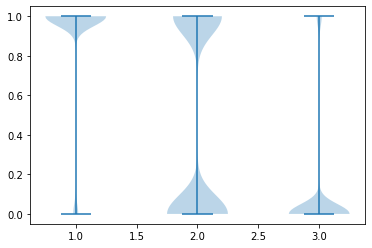

In [168]:
plt.violinplot([good_scores_comb1234_human_hf,
                bad_scores_1234monroe_human_hf,
                ugly_scores_comb1234_human_hf])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a2f1ef320>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a358cf4a8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a2f1efa58>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a2f1ef5f8>}

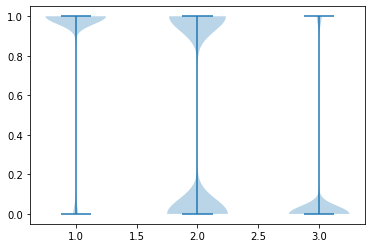

In [795]:
plt.violinplot([good_scores_comb1234_human_hf,
                bad_scores_comb1234_human_hf,
                ugly_scores_comb1234_human_hf], bw_method=0.2)

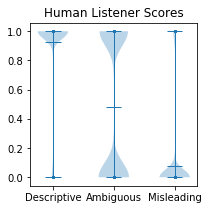

In [1048]:
fig, ax = plt.subplots(figsize=(3, 3))
plot_data = [good_scores_comb1234_human_hf, bad_scores_comb1234_human_hf, ugly_scores_comb1234_human_hf] # [score[metric][1] for score in scores]
vpdata = ax.violinplot(plot_data, showmeans=True, bw_method=0.2)
vpdata["cbars"].set(linewidths=1)
vpdata["cmeans"].set(linewidths=1)
vpdata["cmins"].set(linewidths=1)
vpdata["cmaxes"].set(linewidths=1)

point_data = [np.repeat(i+1, len(s)) for i, s in enumerate(plot_data)]

scatter_data_x = []
scatter_data_y = []
for k in range(3):
    scatter_data_x.extend(point_data[k])
    scatter_data_y.extend(plot_data[k])
ax.scatter(scatter_data_x, scatter_data_y, alpha=0.01, s=5)

ax.xaxis.set_ticks([1, 2, 3])
ax.set_xticklabels(["Descriptive", "Ambiguous", "Misleading"])
ax.set_title('Human Listener Scores')
plt.show()

In [158]:
corr_support = ([1]*len(good_scores_comb1234_human_hf) +
 [2]*len(bad_scores_1234monroe_human_hf) +
 [3]*len(ugly_scores_comb1234_human_hf)
)

In [159]:
len(ugly_scores_comb1234_human_hf)

4353

In [160]:
len(bad_scores_1234monroe_human_hf)

4029

In [161]:
sum(bad_scores_1234monroe_human_hf)

1794

In [162]:
(4029-1794)/3 # 598 1's, 745 0's

745.0

In [164]:
pearsonr(corr_support, np.concatenate((good_scores_comb1234_human_hf,
                                       bad_scores_1234monroe_human_hf,
                                       ugly_scores_comb1234_human_hf)))

(-0.701496949195766, 0.0)

In [165]:
spearmanr(corr_support, np.concatenate((good_scores_comb1234_human_hf,
                                       bad_scores_1234monroe_human_hf, # this actually usees the same
                                       ugly_scores_comb1234_human_hf)))

SpearmanrResult(correlation=-0.7014969491957659, pvalue=0.0)

In [168]:
kendalltau(corr_support, np.concatenate((good_scores_comb1234_human_hf,
                                       bad_scores_1234monroe_human_hf,
                                       ugly_scores_comb1234_human_hf)))

KendalltauResult(correlation=-0.6614325731027193, pvalue=0.0)

In [ ]:
# Next, I'm going to make the human listener plots:
np.array(ctx_good_unflipped_comb1234)[listener_unflipped_maj_correct_reshaped]
np.array(ctx_good_unflipped_comb1234)[listener_unflipped_maj_correct_reshaped]

# Making open data
So, now I'm going to try to put all of this data into a single CSV that can be read in by a MonroeData object. This will include all of the collected speaker data, as well as the monroe data we use. There will be different columns
from the monroe data, but there shouldn't be too many changes

In [907]:
mturk_data_combined_1234_df.columns

Index(['gameid', 'clkTime', 'roundNum', 'condition', 'clickStatus',
       'clickColH', 'clickColS', 'clickColL', 'clickLocS', 'clickLocL',
       'alt1Status', 'alt1ColH', 'alt1ColS', 'alt1ColL', 'alt1LocS',
       'alt1LocL', 'alt2Status', 'alt2ColH', 'alt2ColS', 'alt2ColL',
       'alt2LocS', 'alt2LocL', 'targetD1Diff', 'targetD2Diff', 'D1D2Diff',
       'outcome', 'msgTime', 'role', 'contents', 'workerid_uniq', 'numOutcome',
       'numRawWords', 'numRawChars', 'numCleanChars', 'numCleanWords',
       'source'],
      dtype='object')

In [235]:
# we don't need: clkTime, msgTime, role, numRawWords, numRawChars, source
# we do need:    quality, flipped/unflipped
od_columns = ['contextId', 'contextNum', 'condition', 'clickStatus', 'quality',
              'clickColH', 'clickColS', 'clickColL', 'clickLocS', 'clickLocL',
              'alt1Status', 'alt1ColH', 'alt1ColS', 'alt1ColL', 'alt1LocS',
              'alt1LocL', 'alt2Status', 'alt2ColH', 'alt2ColS', 'alt2ColL',
              'alt2LocS', 'alt2LocL', 'targetD1Diff', 'targetD2Diff', 'D1D2Diff',
              'outcome', 'contents']

In [909]:
mturk_data_combined_1234_df.head().T

,0,1,2,3,4
gameid,1.1-good-unflipped,1.1-bad-unflipped,1.2-good-unflipped,1.2-bad-unflipped,1.3-good-unflipped
clkTime,NaN,NaN,NaN,NaN,NaN
roundNum,NaN,NaN,NaN,NaN,NaN
condition,close,close,close,close,close
clickStatus,target,target,target,target,target
clickColH,313,313,313,313,313
clickColS,99,99,99,99,99
clickColL,50,50,50,50,50
clickLocS,0,0,0,0,0
clickLocL,0,0,0,0,0


In [180]:
from evaluation import delta_e_dist

In [181]:
listener_unflipped_randorders[:5]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021']]

In [169]:
listener_unflipped_click_idxs[:5]

[[2, 1, 1, 0, 0, 1, 2, 2, 1, 1],
 [2, 1, 1, 0, 0, 1, 0, 0, 1, 0],
 [2, 2, 1, 2, 0, 1, 1, 2, 1, 0],
 [0, 0, 2, 0, 0, 2, 2, 0, 0, 1],
 [0, 1, 2, 0, 0, 2, 2, 0, 0, 0]]

In [175]:
listener_bad_flipped_click_idxs[:5]

[[1, 1, 0, 1, 0, 1, 1, 1, 1, 2],
 [1, 2, 0, 1, 0, 1, 1, 2, 1, 2],
 [1, 2, 0, 1, 0, 1, 0, 2, 1, 2],
 [1, 1, 2, 1, 0, 1, 2, 0, 0, 2],
 [1, 0, 2, 1, 2, 2, 2, 1, 0, 0]]

In [172]:
listener_bad_flipped_randorders[:5]

[['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['210', '210', '201', '210', '012', '201', '120', '021', '102', '120'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021'],
 ['201', '012', '120', '021', '120', '120', '120', '021', '012', '021']]

In [182]:
# good, unflipped
listener_unflipped_click_idxs_reshaped = []
listener_unflipped_randorders_reshaped = []
for i in range(0, len(listener_unflipped_click_idxs), 15): # 3 listeners by 5 ctxts.
    for j in range(10): # size of game        
        listener_unflipped_click_idxs_reshaped.extend(np.array(listener_unflipped_click_idxs)[i: i+15, j])
        listener_unflipped_randorders_reshaped.extend(np.array(listener_unflipped_randorders)[i: i+15 : 3, j])

In [183]:
# good, flipped
listener_flipped_click_idxs_reshaped = []
listener_flipped_randorders_reshaped = []
for i in range(0, len(listener_flipped_click_idxs), 15): # 3 listeners by 5 ctxts.
    for j in range(10): # size of game        
        listener_flipped_click_idxs_reshaped.extend(np.array(listener_flipped_click_idxs)[i: i+15, j])
        listener_flipped_randorders_reshaped.extend(np.array(listener_flipped_randorders)[i: i+15 : 3, j])

In [184]:
# bad, unflipped
listener_bad_unflipped_click_idxs_reshaped = []
listener_bad_unflipped_randorders_reshaped = []
for i in range(0, len(listener_bad_unflipped_click_idxs), 15): # 3 listeners by 5 ctxts.
    for j in range(10): # size of game        
        listener_bad_unflipped_click_idxs_reshaped.extend(np.array(listener_bad_unflipped_click_idxs)[i: i+15, j])
        listener_bad_unflipped_randorders_reshaped.extend(np.array(listener_bad_unflipped_randorders)[i: i+15 : 3, j])

In [185]:
# bad, flipped
listener_bad_flipped_click_idxs_reshaped = []
listener_bad_flipped_randorders_reshaped = []
for i in range(0, len(listener_bad_flipped_click_idxs), 15): # 3 listeners by 5 ctxts.
    for j in range(10): # size of game        
        listener_bad_flipped_click_idxs_reshaped.extend(np.array(listener_bad_flipped_click_idxs)[i: i+15, j])
        listener_bad_flipped_randorders_reshaped.extend(np.array(listener_bad_flipped_randorders)[i: i+15 : 3, j])

In [186]:
ctx_bad_unflipped_approved_bool[:10]

[[False, True, True, True, True],
 [True, True, True, True, True],
 [False, True, True, False, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [False, True, False, True, False],
 [True, False, True, True, True],
 [True, False, False, False, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [187]:
bad_unflipped_click_idx_reshaped_full = []
bad_unflipped_randorders_reshaped_full = []
for i, game in enumerate(ctx_bad_unflipped_approved_bool):
    temp_click_idx = []
    temp_randorder = []
    j = 0
    for included in game:
        
        if included:
            temp_click_idx.append(bad_unflipped_click_idx_reshaped[i][j])
            temp_randorder.append(bad_unflipped_randorders_reshaped[i][j])
            if i < 5:
                print(i, j, bad_unflipped_click_idx_reshaped[i][j])
            j += 1
            
        else:
            temp_click_idx.append([np.nan for _ in range(3)])
            temp_randorder.append("")
    if i < 5:
        print(">", temp_click_idx)
    bad_unflipped_click_idx_reshaped_full.append(temp_click_idx)
    bad_unflipped_randorders_reshaped_full.append(temp_randorder)

0 0 [2, 1, 1]
0 1 [1, 1, 0]
0 2 [2, 2, 2]
0 3 [2, 2, 2]
> [[nan, nan, nan], [2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]]
1 0 [1, 1, 0]
1 1 [0, 0, 0]
1 2 [2, 2, 2]
1 3 [0, 0, 0]
1 4 [1, 1, 1]
> [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]]
2 0 [0, 2, 2]
2 1 [0, 0, 2]
2 2 [1, 1, 1]
> [[nan, nan, nan], [0, 2, 2], [0, 0, 2], [nan, nan, nan], [1, 1, 1]]
3 0 [2, 2, 0]
3 1 [0, 0, 0]
3 2 [0, 0, 0]
3 3 [1, 1, 1]
3 4 [2, 2, 2]
> [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]]
4 0 [2, 2, 2]
4 1 [0, 1, 0]
4 2 [2, 2, 2]
4 3 [0, 0, 0]
4 4 [1, 1, 2]
> [[2, 2, 2], [0, 1, 0], [2, 2, 2], [0, 0, 0], [1, 1, 2]]


In [220]:
bad_flipped_click_idx_reshaped_full = []
bad_flipped_randorders_reshaped_full = []
for i, game in enumerate(ctx_bad_flipped_approved_bool):
    temp_click_idx = []
    temp_randorder = []
    j = 0
    for included in game:
        if included:
            temp_click_idx.append(bad_flipped_click_idx_reshaped[i][j])
            temp_randorder.append(bad_flipped_randorders_reshaped[i][j])
            j += 1
        else:
            temp_click_idx.append([np.nan for _ in range(3)])
            temp_randorder.append("")
            
    bad_flipped_click_idx_reshaped_full.append(copy.deepcopy(temp_click_idx))
    bad_flipped_randorders_reshaped_full.append(copy.deepcopy(temp_randorder))

In [189]:
len(bad_unflipped_click_idx_reshaped)

180

In [190]:
bad_unflipped_click_idx_reshaped[0][0]

[2, 1, 1]

In [191]:
bad_unflipped_click_idx_reshaped[:10]

[[[2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]],
 [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]],
 [[0, 2, 2], [0, 0, 2], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
 [[2, 2, 2], [0, 1, 0], [2, 2, 2], [0, 0, 0], [1, 1, 2]],
 [[0, 0, 2], [1, 1, 1]],
 [[2, 1, 1], [0, 0, 0], [0, 1, 0], [2, 2, 0]],
 [[0, 0, 0], [2, 2, 2]],
 [[2, 1, 2], [1, 1, 1], [0, 0, 0], [0, 0, 1], [2, 1, 1]],
 [[0, 0, 0], [2, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0]]]

In [324]:
bad_unflipped_randorders_reshaped[:10]

[['210', '201', '210', '021'],
 ['102', '021', '210', '012', '201'],
 ['210', '102', '201'],
 ['210', '012', '021', '201', '012'],
 ['120', '012', '201', '102', '210'],
 ['021', '201'],
 ['201', '210', '102', '120'],
 ['021', '210'],
 ['102', '021', '021', '201', '120'],
 ['120', '210', '102', '210', '120']]

In [212]:
bad_flipped_randorders_reshaped[:10]

[['210', '201'],
 ['210', '021', '102', '021', '210'],
 ['012', '201', '210', '102'],
 ['201', '210', '012', '021'],
 ['201', '012', '120', '012'],
 ['201', '102', '210', '021'],
 ['201', '201', '210', '102', '120'],
 ['021', '210', '102', '021', '021'],
 ['201', '120', '120', '210', '102'],
 ['210', '120', '210', '201', '021']]

In [337]:
bad_unflipped_click_idx_reshaped_full[:10]

[[[nan, nan, nan], [2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]],
 [[1, 1, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1]],
 [[nan, nan, nan], [0, 2, 2], [0, 0, 2], [nan, nan, nan], [1, 1, 1]],
 [[2, 2, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
 [[2, 2, 2], [0, 1, 0], [2, 2, 2], [0, 0, 0], [1, 1, 2]],
 [[nan, nan, nan], [0, 0, 2], [nan, nan, nan], [1, 1, 1], [nan, nan, nan]],
 [[2, 1, 1], [nan, nan, nan], [0, 0, 0], [0, 1, 0], [2, 2, 0]],
 [[0, 0, 0], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [2, 2, 2]],
 [[2, 1, 2], [1, 1, 1], [0, 0, 0], [0, 0, 1], [2, 1, 1]],
 [[0, 0, 0], [2, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0]]]

In [259]:
bad_unflipped_randorders_reshaped_full[:10]

[['', '210', '210', '210', '210'],
 ['102', '102', '102', '102', '102'],
 ['', '210', '210', '', '210'],
 ['210', '210', '210', '210', '210'],
 ['120', '120', '120', '120', '120'],
 ['', '021', '', '021', ''],
 ['201', '', '201', '201', '201'],
 ['021', '', '', '', '021'],
 ['102', '102', '102', '102', '102'],
 ['120', '120', '120', '120', '120']]

In [192]:
bad_flipped_click_idx_reshaped_full[:10]

[[[1, 1, 1], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [1, 1, 1]],
 [[1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2]],
 [[2, 1, 1], [nan, nan, nan], [2, 1, 1], [2, 1, 1], [2, 1, 1]],
 [[2, 2, 0], [nan, nan, nan], [2, 2, 0], [2, 2, 0], [2, 2, 0]],
 [[2, 1, 2], [nan, nan, nan], [2, 1, 2], [2, 1, 2], [2, 1, 2]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [nan, nan, nan]],
 [[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]],
 [[2, 0, 2], [2, 0, 2], [2, 0, 2], [2, 0, 2], [2, 0, 2]],
 [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]],
 [[2, 0, 2], [2, 0, 2], [2, 0, 2], [2, 0, 2], [2, 0, 2]]]

In [221]:
bad_flipped_randorders_reshaped_full[:10]

[['210', '', '', '', '201'],
 ['210', '021', '102', '021', '210'],
 ['012', '', '201', '210', '102'],
 ['201', '', '210', '012', '021'],
 ['201', '', '012', '120', '012'],
 ['201', '102', '210', '021', ''],
 ['201', '201', '210', '102', '120'],
 ['021', '210', '102', '021', '021'],
 ['201', '120', '120', '210', '102'],
 ['210', '120', '210', '201', '021']]

In [198]:
mturk_data_combined_1234_df.iloc[10:20].T

,10,11,12,13,14,15,16,17,18,19
gameid,1.1-good-flipped,1.1-bad-flipped,1.2-good-flipped,1.2-bad-flipped,1.3-good-flipped,1.3-bad-flipped,1.4-good-flipped,1.4-bad-flipped,1.5-good-flipped,1.5-bad-flipped
clkTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roundNum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,close,close,close,close,close,close,close,close,close,close
clickStatus,target,target,target,target,target,target,target,target,target,target
clickColH,288,288,288,288,288,288,288,288,288,288
clickColS,52,52,52,52,52,52,52,52,52,52
clickColL,50,50,50,50,50,50,50,50,50,50
clickLocS,0,0,0,0,0,0,0,0,0,0
clickLocL,0,0,0,0,0,0,0,0,0,0


In [222]:
listener_bad_unflipped_click_idxs_reshaped_df = np.array(bad_unflipped_click_idx_reshaped_full).flatten().astype(np.int)#reshape(-1, 3)
listener_bad_unflipped_randorders_reshaped_df = np.array(bad_unflipped_randorders_reshaped_full).flatten()


In [223]:
listener_bad_flipped_click_idxs_reshaped_df = np.array(bad_flipped_click_idx_reshaped_full).flatten().astype(np.int)
listener_bad_flipped_randorders_reshaped_df = np.array(bad_flipped_randorders_reshaped_full).flatten()

In [224]:
bad_flipped_randorders_reshaped_full[:10]

[['210', '', '', '', '201'],
 ['210', '021', '102', '021', '210'],
 ['012', '', '201', '210', '102'],
 ['201', '', '210', '012', '021'],
 ['201', '', '012', '120', '012'],
 ['201', '102', '210', '021', ''],
 ['201', '201', '210', '102', '120'],
 ['021', '210', '102', '021', '021'],
 ['201', '120', '120', '210', '102'],
 ['210', '120', '210', '201', '021']]

In [340]:
len(listener_bad_flipped_click_idxs_reshaped_df)

2700

In [348]:
listener_bad_unflipped_click_idxs_reshaped_df[:10]

array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
                          2,                    1,                    1,
                          1,                    1,                    0,
                          2])

In [268]:
listener_bad_unflipped_randorders_reshaped_df[:10]

array(['', '210', '210', '210', '210', '102', '102', '102', '102', '102'],
      dtype='<U3')

In [269]:
len(listener_bad_unflipped_randorders_reshaped_df)

900

In [270]:
len(mturk_data_combined_1234_df)

3600

In [214]:
len(listener_bad_flipped_click_idxs_reshaped)//30

74

In [209]:
len(listener_unflipped_click_idxs_reshaped)//30

90

In [199]:
len(listener_bad_unflipped_randorders)//3

78

In [961]:
np.any(np.all((np.array(listener_flipped_click_idxs) == (np.array(listener_flipped_click_idxs)[:, 0]).reshape(-1, 1)).T, axis=0))

False

In [926]:
listener_unflipped_descriptions[:10]

[['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['bright pink',
  'dark grey',
  'lime green',
  'purple grey',
  'bright green',
  'brown',
  'indigo',
  'purple',
  'light blue',
  'light violet'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  'bluish purple'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  'bluish purple'],
 ['medium violet red',
  'dim gray',
  'yellow green',
  'slate gray',
  'lawn green',
  'light brown',
  'more purple than blue',
  'bright purple',
  'light blue',
  '

In [284]:
listener_flipped_click_idxs_reshaped

[0,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [207]:
listener_bad_flipped_click_idxs_reshaped_df[12:15]

array([1, 1, 1])

In [210]:
listener_bad_flipped_randorders_reshaped_df[:15]

array(['210', '', '', '', '210', '210', '210', '210', '210', '210', '012',
       '', '012', '012', '012'], dtype='<U3')

In [225]:
# As of 8/6, this works for "descriptive" captions
# As of 8/20, this works for "descriptive" and "ambiguous" captions

idx2status = {
    0 : "target",
    1 : "distr1",
    2 : "distr2"
}

od_data = []
for ri, row in mturk_data_combined_1234_df.iterrows():
    row_vals = {}
    if ri % 10 == 0:
        ctx_count = 0
    
    row_vals["contextId"] = f"ci{(ri//20)}"
    
    row_vals["condition"] = row["condition"]
    row_vals["contents"] = row["contents"]
    
    # find listener data that matches:
    if ri % 2 == 0:
        row_vals['quality'] = 'descriptive' # "descriptive"
        listener_idx = 5 * (ri // 20) + (ri % 10) // 2
    else:
        row_vals['quality'] = 'ambiguous'
        listener_idx = 5 * (ri // 20) + (ri % 10) // 2
        #pass # "ambiguous"
    
    if ri % 20 < 10:
        # unflipped
        row_vals["contextId"] += ".0"
        if row_vals['quality'] == "descriptive":
            listener_click_idx = listener_unflipped_click_idxs_reshaped
            listener_randorders = listener_unflipped_randorders_reshaped
        else: # ambiguous
            listener_click_idx = listener_bad_unflipped_click_idxs_reshaped_df
            listener_randorders = listener_bad_unflipped_randorders_reshaped_df
    else:
        # flipped
        row_vals["contextId"] += ".1"
        if row_vals['quality'] == "descriptive":
            listener_click_idx = listener_flipped_click_idxs_reshaped
            listener_randorders = listener_flipped_randorders_reshaped
        else: # ambiguous
            listener_click_idx = listener_bad_flipped_click_idxs_reshaped_df
            listener_randorders = listener_bad_flipped_randorders_reshaped_df
    
    # color differences - actual colors below:
    target_color = np.array(mturk_data_combined_1234[ri].colors[0].rgb_norm)
    d1_color = np.array(mturk_data_combined_1234[ri].colors[1].rgb_norm)
    d2_color = np.array(mturk_data_combined_1234[ri].colors[2].rgb_norm)
    
    row_vals['targetD1Diff'] = int(delta_e_dist(target_color, d1_color))
    row_vals['targetD2Diff'] = int(delta_e_dist(target_color, d2_color))
    row_vals['D1D2Diff'] = int(delta_e_dist(d1_color, d2_color))
        
    for j in range(3): # number of listeners:
        lsi = 3*listener_idx + j
        randorder = listener_randorders[listener_idx]
        if len(randorder) == 0: # we didn't show this one to humans
            row_vals["clickLocL"] = np.nan
            row_vals["clickLocS"] = 0
        else:
            # get click information
            # print(listener_click_idx[lsi])
            row_vals["clickLocL"] = listener_click_idx[lsi]
            row_vals["clickLocS"] = int(randorder[row_vals["clickLocL"]])
        
        row_vals["clickColH"] = mturk_data_combined_1234[ri].colors[row_vals["clickLocS"]].hsl[0]
        row_vals["clickColS"] = mturk_data_combined_1234[ri].colors[row_vals["clickLocS"]].hsl[1]
        row_vals["clickColL"] = mturk_data_combined_1234[ri].colors[row_vals["clickLocS"]].hsl[2]
        row_vals["clickStatus"] = idx2status[row_vals["clickLocS"]]
        
        
        # get alternative information
        remaining_cols = [0, 1, 2]
        remaining_cols.remove(row_vals["clickLocS"])
        for ci, col_id in enumerate(remaining_cols):
            row_vals[f"alt{ci + 1}LocS"] = col_id
            if len(randorder) == 0:  
                row_vals[f"alt{ci + 1}LocL"] = np.nan
            else:
                row_vals[f"alt{ci + 1}LocL"] = randorder.index(f"{col_id}")
            row_vals[f"alt{ci + 1}ColH"] = mturk_data_combined_1234[ri].colors[col_id].hsl[0]
            row_vals[f"alt{ci + 1}ColS"] = mturk_data_combined_1234[ri].colors[col_id].hsl[1]
            row_vals[f"alt{ci + 1}ColL"] = mturk_data_combined_1234[ri].colors[col_id].hsl[2]
            row_vals[f"alt{ci + 1}Status"] = idx2status[col_id]
        
        # outcome
        if len(randorder) == 0:
            row_vals["outcome"] = False
        else:
            row_vals["outcome"] = row_vals["clickLocS"] == 0
        row_vals["contextNum"] = ctx_count
        
        # add to data list
        od_data.append(copy.copy(row_vals))
    ctx_count += 1
        
        

In [226]:
len(od_data)

10800

In [227]:
len(mturk_data_combined_1234_df)

3600

In [228]:
[d['clickLocL'] for d in od_data] 

[2,
 2,
 2,
 nan,
 nan,
 nan,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 nan,
 nan,
 nan,
 0,
 2,
 2,
 nan,
 nan,
 nan,
 0,
 0,
 0,
 nan,
 nan,
 nan,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 nan,
 nan,
 nan,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 nan,
 nan,
 nan,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 nan,
 nan,
 nan,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 nan,
 nan,
 nan,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [229]:
od_data[0]

{'contextId': 'ci0.0',
 'condition': 'close',
 'contents': 'bright pink',
 'quality': 'descriptive',
 'targetD1Diff': 15,
 'targetD2Diff': 11,
 'D1D2Diff': 12,
 'clickLocL': 2,
 'clickLocS': 0,
 'clickColH': 313.0,
 'clickColS': 99.0,
 'clickColL': 50.0,
 'clickStatus': 'target',
 'alt1LocS': 1,
 'alt1LocL': 1,
 'alt1ColH': 288.0,
 'alt1ColS': 52.0,
 'alt1ColL': 50.0,
 'alt1Status': 'distr1',
 'alt2LocS': 2,
 'alt2LocL': 0,
 'alt2ColH': 322.0,
 'alt2ColS': 56.0,
 'alt2ColL': 50.0,
 'alt2Status': 'distr2',
 'outcome': True,
 'contextNum': 0}

In [378]:
for i, (o, o2, o3, o4) in enumerate([(d['contents'], d['outcome'], d['clickLocL'], d['contextNum']) for d in od_data[:120]]):
    if i%3 == 0:
        print(f"--{i//3}--")
    print(f"{i%3})", o, o2, o3, o4)

--0--
0) bright pink True 2 0
1) bright pink True 2 1
2) bright pink True 2 2
--1--
0) bright purple False nan 3
1) bright purple False nan 4
2) bright purple False nan 5
--2--
0) MEDIUM VIOLET RED False 0 6
1) MEDIUM VIOLET RED False 0 7
2) MEDIUM VIOLET RED True 1 8
--3--
0) VIOLET True 2 9
1) VIOLET False 1 10
2) VIOLET False 1 11
--4--
0) Light pink True 2 12
1) Light pink True 2 13
2) Light pink True 2 14
--5--
0) Pink True 1 15
1) Pink True 1 16
2) Pink False 0 17
--6--
0) Bright pink True 0 18
1) Bright pink True 0 19
2) Bright pink True 0 20
--7--
0) Pink True 2 21
1) Pink True 2 22
2) Pink True 2 23
--8--
0) bright purple True 1 24
1) bright purple False 0 25
2) bright purple True 1 26
--9--
0) purple False 2 27
1) purple False 2 28
2) purple False 2 29
--10--
0) pale purple False 0 0
1) pale purple False 0 1
2) pale purple True 2 2
--11--
0) pink False 1 3
1) pink False 1 4
2) pink False 1 5
--12--
0) violate True 1 6
1) violate True 1 7
2) violate False 2 8
--13--
0) violate

In [446]:
print([de.caption for de in ctx_good_unflipped_approved[0]])
print([de.caption for de in ctx_bad_unflipped_approved[0]])
print([de.caption for de in ctx_good_flipped_approved[0]])
print([de.caption for de in ctx_bad_flipped_approved[0]])

['DIM GRAY', 'Neutral gray', 'lighter gray']
['VIOLET', 'Pink', 'Pink', 'purple']
['foghat gray', 'brown gray', 'dark grey']
['pink', 'lilac']


In [447]:
print([de.caption for de in ctx_good_unflipped_comb1234[:5]])
print([de.caption for de in ctx_bad_unflipped_comb1234[:5]])
print([de.caption for de in ctx_good_flipped_comb1234[:5]])
print([de.caption for de in ctx_bad_flipped_comb1234[:5]])

['bright pink', 'MEDIUM VIOLET RED', 'Light pink', 'Bright pink', 'bright purple']
['bright purple', 'VIOLET', 'Pink', 'Pink', 'purple']
['pale purple', 'violate', 'light Purple', 'purple', 'dark purple']
['pink', 'violate', 'purple', 'purple', 'lilac']


In [456]:
ctx_good_unflipped_approved[:10]

[[bright pink, Light pink, Bright pink, bright purple],
 [DIM GRAY, Neutral gray, lighter gray],
 [lime green, YELLOW GREEN, Green, Dark lime green, bright green],
 [SLATE GRAY, Dark grey, Blue-ish gray],
 [bright green, Light green, Bright green, bright green],
 [Brown, light brown, light brown, tan, Light brown],
 [more purple than blue, purple, Light purple and dark blue mixed],
 [bright purple, purple, bright violet, Bright purple],
 [Light Blue, light blue, light blue, cerulean blue, Light blue],
 [bluish purple, dark blue, indigo]]

In [414]:
od_data[:120]

[{'D1D2Diff': 12,
  'alt1ColH': 288.0,
  'alt1ColL': 50.0,
  'alt1ColS': 52.0,
  'alt1LocL': 1,
  'alt1LocS': 1,
  'alt1Status': 'distr1',
  'alt2ColH': 322.0,
  'alt2ColL': 50.0,
  'alt2ColS': 56.0,
  'alt2LocL': 0,
  'alt2LocS': 2,
  'alt2Status': 'distr2',
  'clickColH': 313.0,
  'clickColL': 50.0,
  'clickColS': 99.0,
  'clickLocL': 2,
  'clickLocS': 0,
  'clickStatus': 'target',
  'condition': 'close',
  'contents': 'bright pink',
  'contextId': '0.0',
  'contextNum': 0,
  'outcome': True,
  'quality': 'descriptive',
  'targetD1Diff': 15,
  'targetD2Diff': 11},
 {'D1D2Diff': 12,
  'alt1ColH': 288.0,
  'alt1ColL': 50.0,
  'alt1ColS': 52.0,
  'alt1LocL': 1,
  'alt1LocS': 1,
  'alt1Status': 'distr1',
  'alt2ColH': 322.0,
  'alt2ColL': 50.0,
  'alt2ColS': 56.0,
  'alt2LocL': 0,
  'alt2LocS': 2,
  'alt2Status': 'distr2',
  'clickColH': 313.0,
  'clickColL': 50.0,
  'clickColS': 99.0,
  'clickLocL': 2,
  'clickLocS': 0,
  'clickStatus': 'target',
  'condition': 'close',
  'contents': 'b

In [355]:
bad_unflipped_click_idx_reshaped_full[0]

[[nan, nan, nan], [2, 1, 1], [1, 1, 0], [2, 2, 2], [2, 2, 2]]

In [356]:
bad_flipped_click_idx_reshaped_full[0]

[[1, 1, 1], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [1, 1, 1]]

In [ ]:
good_caps = [de.caption for de in ctx_good_unflipped_approved[i]] # note these should be normalized (8/20/2019)
bad_ctx_app = []
for j in range(5):
    bad_ctx_app.append(ctx_bad_unflipped_comb1234[5*i + j].caption not in good_caps) # note these should be normalized(8/20/2019)
ctx_bad_unflipped_approved_bool.append(bad_ctx_app)

In [1039]:
for i, o in enumerate([d['clickColH'] for d in od_data[:30]]):
    if i%3 == 0:
        print(f"--{i//3}--")
    print(f"{i%3})", o)

--0--
0) 313.0
1) 313.0
2) 313.0
--1--
0) 322.0
1) 322.0
2) 313.0
--2--
0) 313.0
1) 313.0
2) 313.0
--3--
0) 313.0
1) 313.0
2) 313.0
--4--
0) 313.0
1) 288.0
2) 313.0
--5--
0) 322.0
1) 322.0
2) 288.0
--6--
0) 288.0
1) 288.0
2) 313.0
--7--
0) 322.0
1) 288.0
2) 288.0
--8--
0) 288.0
1) 288.0
2) 288.0
--9--
0) 322.0
1) 288.0
2) 288.0


In [230]:
# finally, let's add in the monroe data:
def generate_monroe_od_entries(ctx_monroe_unflipped, ctx_monroe_flipped):
    
    ctx_grouped = []

    for i, dev_idx in enumerate(dev_data_indices[:len(mturk_data_combined_1234)//20]): # 20 = 5 reps * 2 bad/good * 2 flipped/unflipped
          
        #print(dev_idx)
        for flipped in range(2): # cycle thru 0 and 1
            row_vals = {}
            if flipped:
                monroe_ctxs = [dev_data[ci] for ci in ctx_monroe_flipped[dev_idx]]
            else:
                monroe_ctxs = [dev_data[ci] for ci in ctx_monroe_unflipped[dev_idx]]
            for j, ctx in enumerate(monroe_ctxs):
                row_vals["contextId"] = f"ci{(i)}.{1 if flipped else 0}"
                row_vals["condition"] = ctx.condition
                row_vals["contents"] = ctx.caption
                row_vals["quality"] = "descriptive"
                row_vals["outcome"] = True # by design

                row_vals["clickLocL"] = 0
                row_vals["clickLocS"] = 0

                # color differences - actual colors below:
                target_color = np.array(ctx.colors[0].rgb_norm)
                d1_color = np.array(ctx.colors[1].rgb_norm)
                d2_color = np.array(ctx.colors[2].rgb_norm)

                row_vals['targetD1Diff'] = int(delta_e_dist(target_color, d1_color))
                row_vals['targetD2Diff'] = int(delta_e_dist(target_color, d2_color))
                row_vals['D1D2Diff'] = int(delta_e_dist(d1_color, d2_color))
                
                # Actual colors
                row_vals["clickColH"] = ctx.colors[row_vals["clickLocS"]].hsl[0]
                row_vals["clickColS"] = ctx.colors[row_vals["clickLocS"]].hsl[1]
                row_vals["clickColL"] = ctx.colors[row_vals["clickLocS"]].hsl[2]
                row_vals["clickStatus"] = idx2status[row_vals["clickLocS"]]

                # get alternative information
                remaining_cols = [1, 2]
                for ci, col_id in enumerate(remaining_cols):
                    row_vals[f"alt{ci + 1}LocS"] = col_id
                    row_vals[f"alt{ci + 1}LocL"] = col_id
                    row_vals[f"alt{ci + 1}ColH"] = ctx.colors[col_id].hsl[0]
                    row_vals[f"alt{ci + 1}ColS"] = ctx.colors[col_id].hsl[1]
                    row_vals[f"alt{ci + 1}ColL"] = ctx.colors[col_id].hsl[2]
                    row_vals[f"alt{ci + 1}Status"] = idx2status[col_id]

                #print(j)
                row_vals["contextNum"] = 10 + j
                # at the beginning, before filtering, ref captions has 5 repeated captions
                ctx_grouped.append(copy.copy(row_vals))
        
    return ctx_grouped

In [231]:
res = generate_monroe_od_entries(ctx_good_unflipped_monroe, ctx_good_flipped_monroe)
#res_flipped = generate_monroe_od_entries(ctx_good_flipped_monroe, True)

In [429]:
res[4:10]

[{'alt1ColH': 310,
  'alt1ColL': 50,
  'alt1ColS': 86,
  'alt1LocL': 1,
  'alt1LocS': 1,
  'alt1Status': 'distr1',
  'alt2ColH': 292,
  'alt2ColL': 50,
  'alt2ColS': 52,
  'alt2LocL': 2,
  'alt2LocS': 2,
  'alt2Status': 'distr2',
  'clickColH': 325,
  'clickColL': 50,
  'clickColS': 44,
  'clickLocL': 0,
  'clickLocS': 0,
  'clickStatus': 'target',
  'condition': 'close',
  'contents': 'pink brown',
  'contextId': 'ci0.1',
  'contextNum': 12,
  'outcome': True,
  'quality': 'descriptive'},
 {'alt1ColH': 309,
  'alt1ColL': 50,
  'alt1ColS': 92,
  'alt1LocL': 1,
  'alt1LocS': 1,
  'alt1Status': 'distr1',
  'alt2ColH': 320,
  'alt2ColL': 50,
  'alt2ColS': 66,
  'alt2LocL': 2,
  'alt2LocS': 2,
  'alt2Status': 'distr2',
  'clickColH': 289,
  'clickColL': 50,
  'clickColS': 44,
  'clickLocL': 0,
  'clickLocS': 0,
  'clickStatus': 'target',
  'condition': 'close',
  'contents': 'purple',
  'contextId': 'ci0.1',
  'contextNum': 13,
  'outcome': True,
  'quality': 'descriptive'},
 {'alt1ColH': 

In [232]:
res[0:25]

[{'contextId': 'ci0.0',
  'condition': 'close',
  'contents': 'brightest color',
  'quality': 'descriptive',
  'outcome': True,
  'clickLocL': 0,
  'clickLocS': 0,
  'targetD1Diff': 15,
  'targetD2Diff': 11,
  'D1D2Diff': 12,
  'clickColH': 313,
  'clickColS': 99,
  'clickColL': 50,
  'clickStatus': 'target',
  'alt1LocS': 1,
  'alt1LocL': 1,
  'alt1ColH': 288,
  'alt1ColS': 52,
  'alt1ColL': 50,
  'alt1Status': 'distr1',
  'alt2LocS': 2,
  'alt2LocL': 2,
  'alt2ColH': 322,
  'alt2ColS': 56,
  'alt2ColL': 50,
  'alt2Status': 'distr2',
  'contextNum': 10},
 {'contextId': 'ci0.0',
  'condition': 'close',
  'contents': 'Lightest shade',
  'quality': 'descriptive',
  'outcome': True,
  'clickLocL': 0,
  'clickLocS': 0,
  'targetD1Diff': 12,
  'targetD2Diff': 14,
  'D1D2Diff': 12,
  'clickColH': 310,
  'clickColS': 96,
  'clickColL': 50,
  'clickStatus': 'target',
  'alt1LocS': 1,
  'alt1LocL': 1,
  'alt1ColH': 294,
  'alt1ColS': 43,
  'alt1ColL': 50,
  'alt1Status': 'distr1',
  'alt2LocS':

In [233]:
od_data_monroecomb = od_data + res

In [439]:
len(od_data_monroecomb) - 217 - 244

10800

In [236]:
od_df = pd.DataFrame(od_data_monroecomb)
od_df = od_df[od_columns]

In [238]:
od_df[od_df['contextId'] == 'ci0.1']

,contextId,contextNum,condition,clickStatus,quality,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,alt2ColH,alt2ColS,alt2ColL,alt2LocS,alt2LocL,targetD1Diff,targetD2Diff,D1D2Diff,outcome,contents
30,ci0.1,0,close,distr2,descriptive,322.0,56.0,50.0,2,0.0,...,313.0,99.0,50.0,1,1.0,15,12,11,False,pale purple
31,ci0.1,0,close,distr2,descriptive,322.0,56.0,50.0,2,0.0,...,313.0,99.0,50.0,1,1.0,15,12,11,False,pale purple
32,ci0.1,0,close,target,descriptive,288.0,52.0,50.0,0,2.0,...,322.0,56.0,50.0,2,0.0,15,12,11,True,pale purple
33,ci0.1,1,close,distr1,ambiguous,313.0,99.0,50.0,1,1.0,...,322.0,56.0,50.0,2,0.0,15,12,11,False,pink
34,ci0.1,1,close,distr1,ambiguous,313.0,99.0,50.0,1,1.0,...,322.0,56.0,50.0,2,0.0,15,12,11,False,pink
35,ci0.1,1,close,distr1,ambiguous,313.0,99.0,50.0,1,1.0,...,322.0,56.0,50.0,2,0.0,15,12,11,False,pink
36,ci0.1,2,close,target,descriptive,288.0,52.0,50.0,0,1.0,...,322.0,56.0,50.0,2,0.0,15,12,11,True,violate
37,ci0.1,2,close,target,descriptive,288.0,52.0,50.0,0,1.0,...,322.0,56.0,50.0,2,0.0,15,12,11,True,violate
38,ci0.1,2,close,distr1,descriptive,313.0,99.0,50.0,1,2.0,...,322.0,56.0,50.0,2,0.0,15,12,11,False,violate
39,ci0.1,3,close,target,ambiguous,288.0,52.0,50.0,0,NaN,...,322.0,56.0,50.0,2,NaN,15,12,11,False,violate


In [239]:
od_df.to_csv("../data/csv/clean_data.csv", index=False, header=True)